In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from textwrap import wrap
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
df = pd.read_excel("customer_retention_dataset.xlsx")
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [6]:
(pd.DataFrame(df.isnull().sum()).transpose())

1Gender of respondent  2 How old are you?   \
0                      0                    0   

   3 Which city do you shop online from?  \
0                                      0   

   4 What is the Pin Code of where you shop online from?  \
0                                                  0       

   5 Since How Long You are Shopping Online ?  \
0                                           0   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  0                       

   7 How do you access the internet while shopping on-line?  \
0                                                  0          

   8 Which device do you use to access the online shopping?  \
0                                                  0          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  0                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  0                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  0                                                                                  

   12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                                  0                                                                                                                

   13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                                  0                                                                            

   14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                                  0                                                                                                           

   15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                                                  0                                                                                                                                    

   16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                     \
0                                                  0                                                                                                                               

   17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                         \
0                                                  0                                                                                                                                                                     

   18 The content on the website must be easy to read and understand  \
0                                                  0                   

   19 Information on similar product to the one highlighted  is important for product comparison  \
0                                                  0                                               

   20 Complete information on listed seller and product b

In [7]:
d={'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Easy to use website or application':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Visual appealing web-page layout': {'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0}, 
   'Wild variety of product on offer':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Complete, relevant description information of products':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Fast loading website speed of website and application':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Reliability of the website or application':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Quickness to complete purchase':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Availability of several payment options':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Speedy order delivery ':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Privacy of customers’ information':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Security of customer financial information':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Perceived Trustworthiness':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Presence of online assistance through multi-channel':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Longer time to get logged in (promotion, sales period)':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Longer time in displaying graphics and photos (promotion, sales period)':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Late declaration of price (promotion, sales period)':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Longer page loading time (promotion, sales period)':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Limited mode of payment on most products (promotion, sales period)':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Longer delivery period':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Change in website/Application design':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Frequent disruption when moving from one page to another':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Website is as efficient as before':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0},
   'Which of the Indian online retailer would you recommend to a friend?':{'Amazon.in':0, 'Paytm.com':0, 'Flipkart.com':0, 'Snapdeal.com':0, 'Myntra.com':0}}

In [8]:
for col_name in d:
    for ind in range(len(df)):
        temp = df.loc[ind,col_name]
        for k in temp.split(','):
            ik = k.strip()
            if ik in d[col_name]:
                d[col_name][ik]+=1
            else:
                d[col_name][ik]=1
d

{'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ': {'Amazon.in': 269,
  'Paytm.com': 150,
  'Flipkart.com': 221,
  'Snapdeal.com': 182,
  'Myntra.com': 146},
 'Easy to use website or application': {'Amazon.in': 249,
  'Paytm.com': 125,
  'Flipkart.com': 201,
  'Snapdeal.com': 130,
  'Myntra.com': 147},
 'Visual appealing web-page layout': {'Amazon.in': 227,
  'Paytm.com': 67,
  'Flipkart.com': 175,
  'Snapdeal.com': 61,
  'Myntra.com': 115},
 'Wild variety of product on offer': {'Amazon.in': 220,
  'Paytm.com': 20,
  'Flipkart.com': 184,
  'Snapdeal.com': 14,
  'Myntra.com': 64},
 'Complete, relevant description information of products': {'Amazon.in': 238,
  'Paytm.com': 59,
  'Flipkart.com': 194,
  'Snapdeal.com': 59,
  'Myntra.com': 64},
 'Fast loading website speed of website and application': {'Amazon.in': 249,
  'Paytm.com': 99,
  'Flipkart.com': 162,
  'Snapdeal.com': 

### UNIVARIATE ANALYSIS

In [9]:
col = list(df.columns)
col.pop(3)
col_c = col.copy()
for i in range(len(col_c)):
    col_c[i] = col_c[i].strip('0123456789\t ')
col_c

['Gender of respondent',
 'How old are you?',
 'Which city do you shop online from?',
 'Since How Long You are Shopping Online ?',
 'How many times you have made an online purchase in the past 1 year?',
 'How do you access the internet while shopping on-line?',
 'Which device do you use to access the online shopping?',
 'What is the screen size of your mobile device?',
 'What is the operating system (OS) of your device?',
 'What browser do you run on your device to access the website?',
 'Which channel did you follow to arrive at your favorite online store for the first time?',
 'After first visit, how do you reach the online retail store?',
 'How much time do you explore the e- retail store before making a purchase decision?',
 'What is your preferred payment Option?',
 'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
 'Why did you abandon the “Bag”, “Shopping Cart”?',
 'The content on the website must be easy to read and und

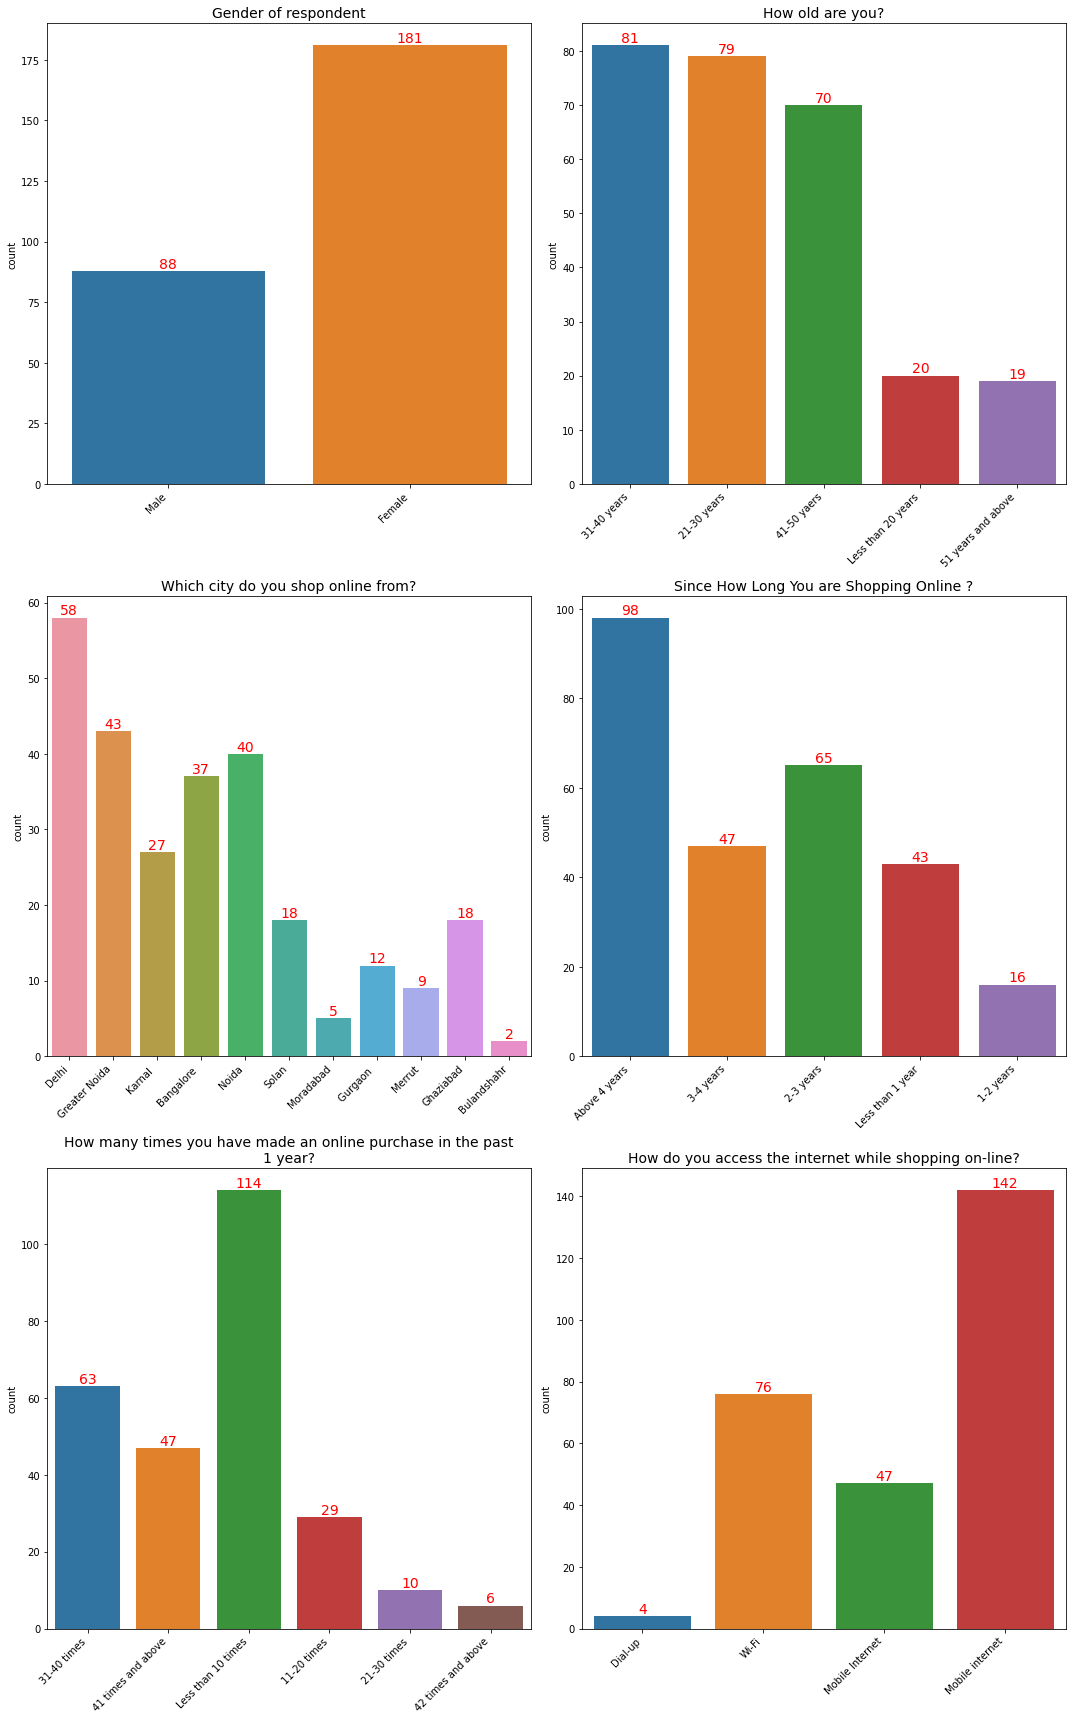

In [10]:
plt.figure(figsize=(15,24))
j=1
for i in col[:6]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

In [11]:
df[col[5]].replace('Mobile Internet', 'Mobile internet', inplace = True)
df[col[5]].value_counts()
# ?df.replace

Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

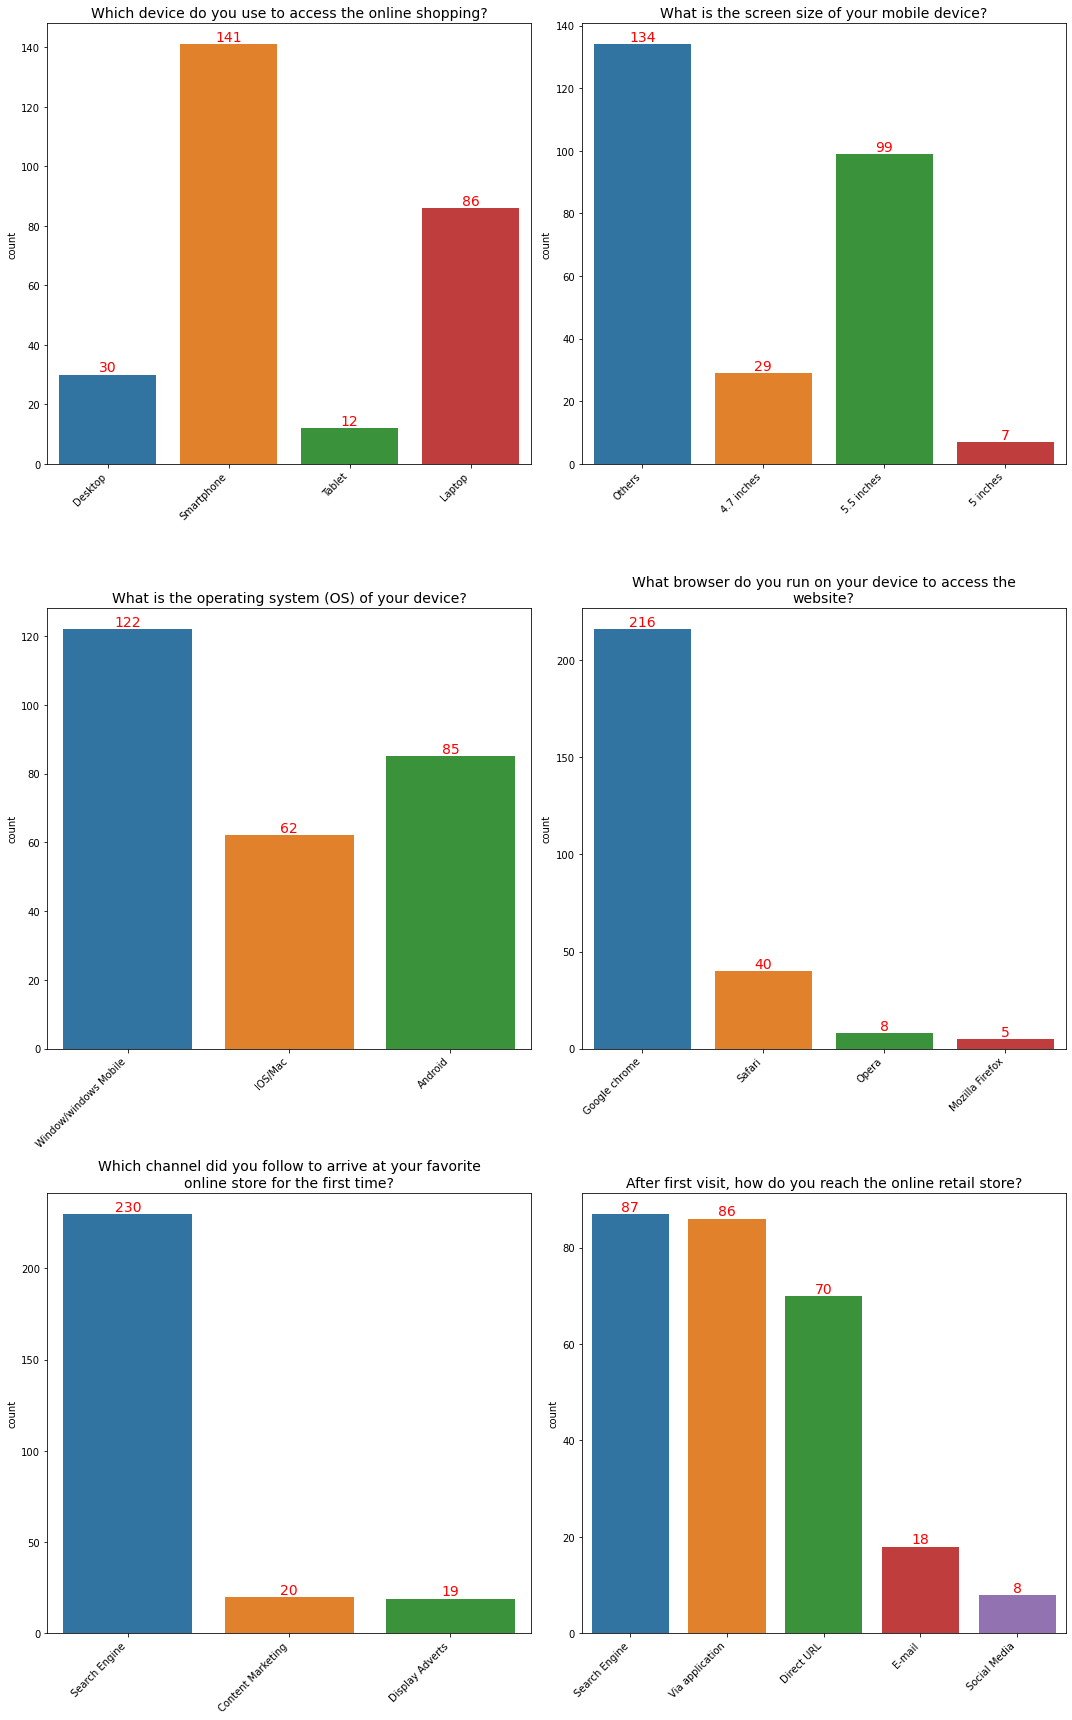

In [12]:
plt.figure(figsize=(15,24))
j=1
for i in col[6:12]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()    

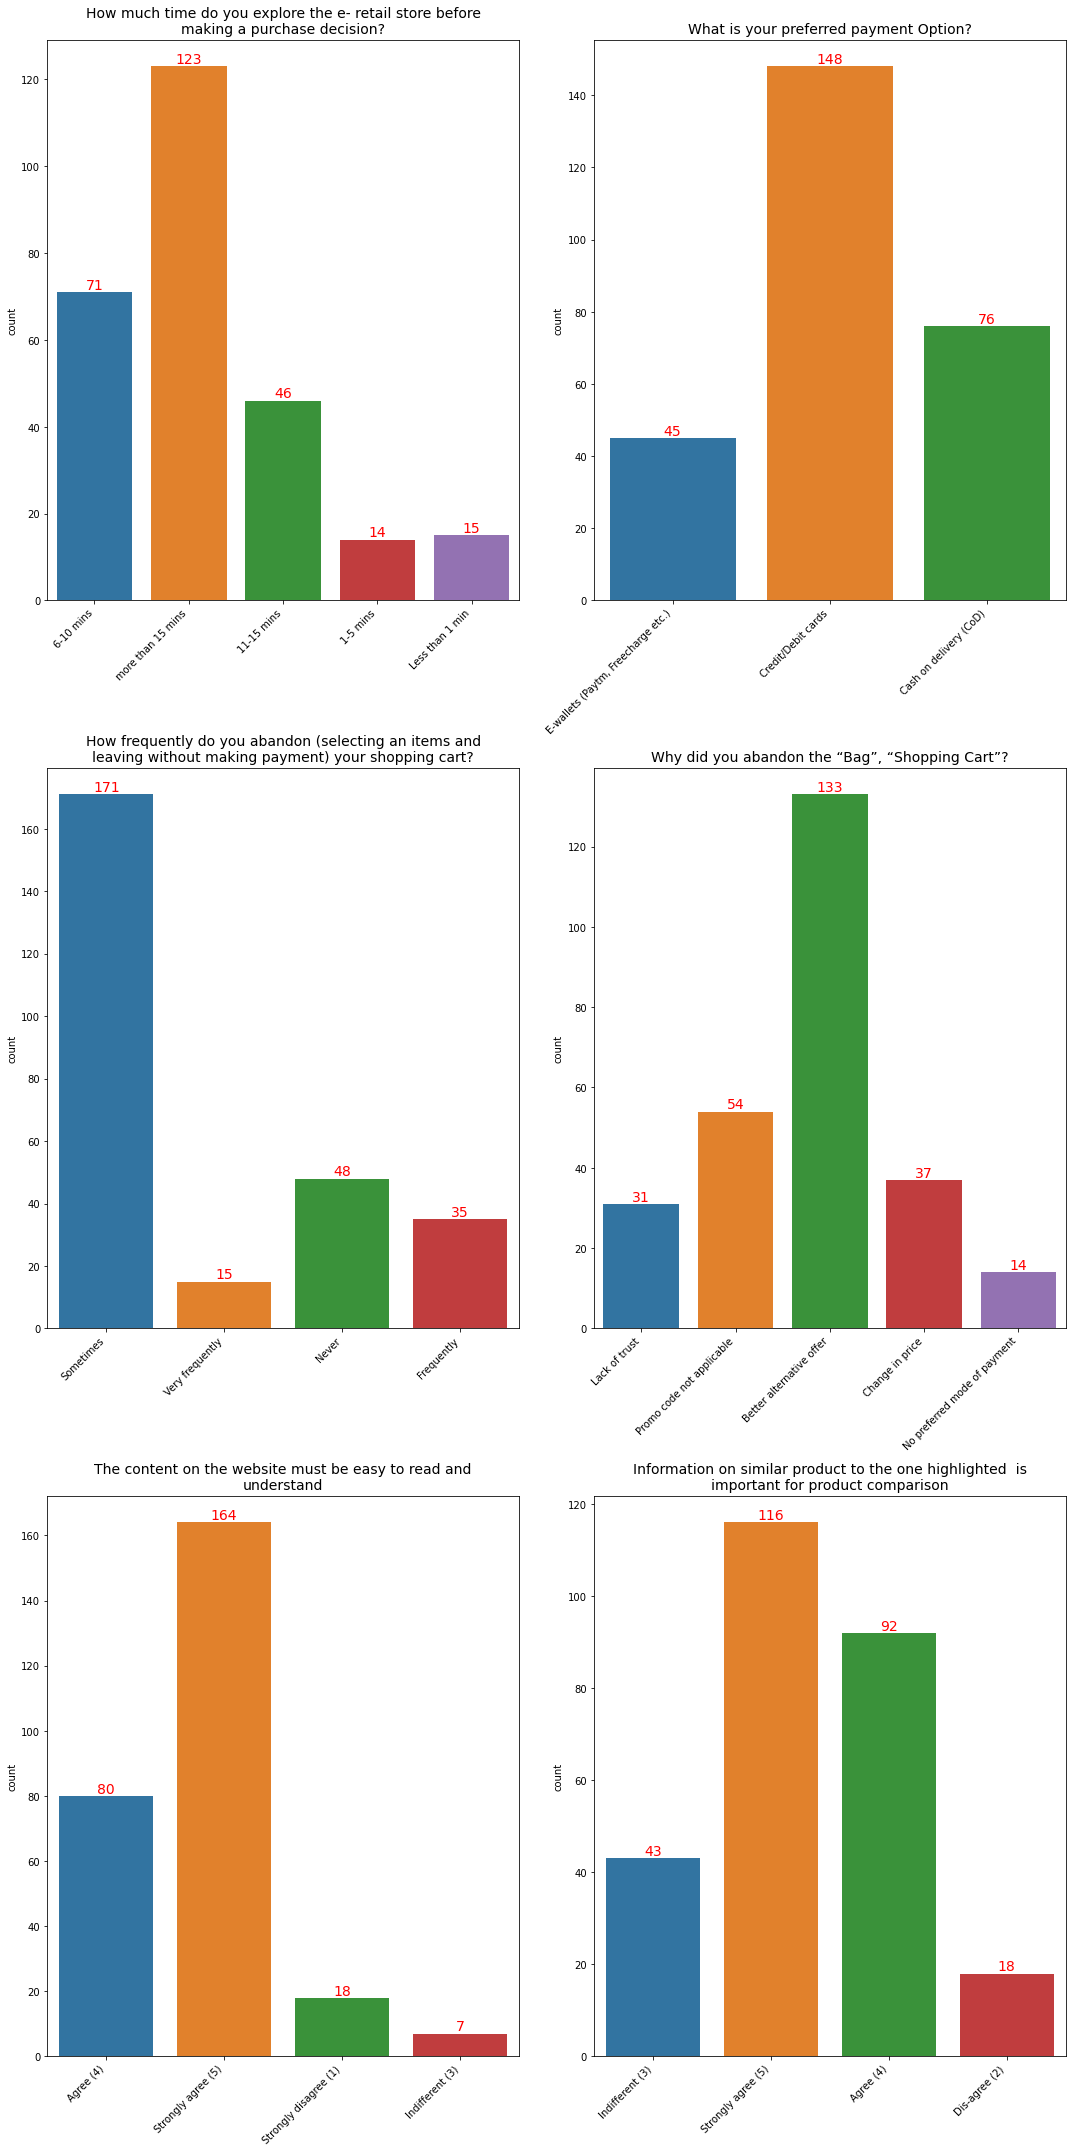

In [13]:
plt.figure(figsize=(15,30))
j=1
for i in col[12:18]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

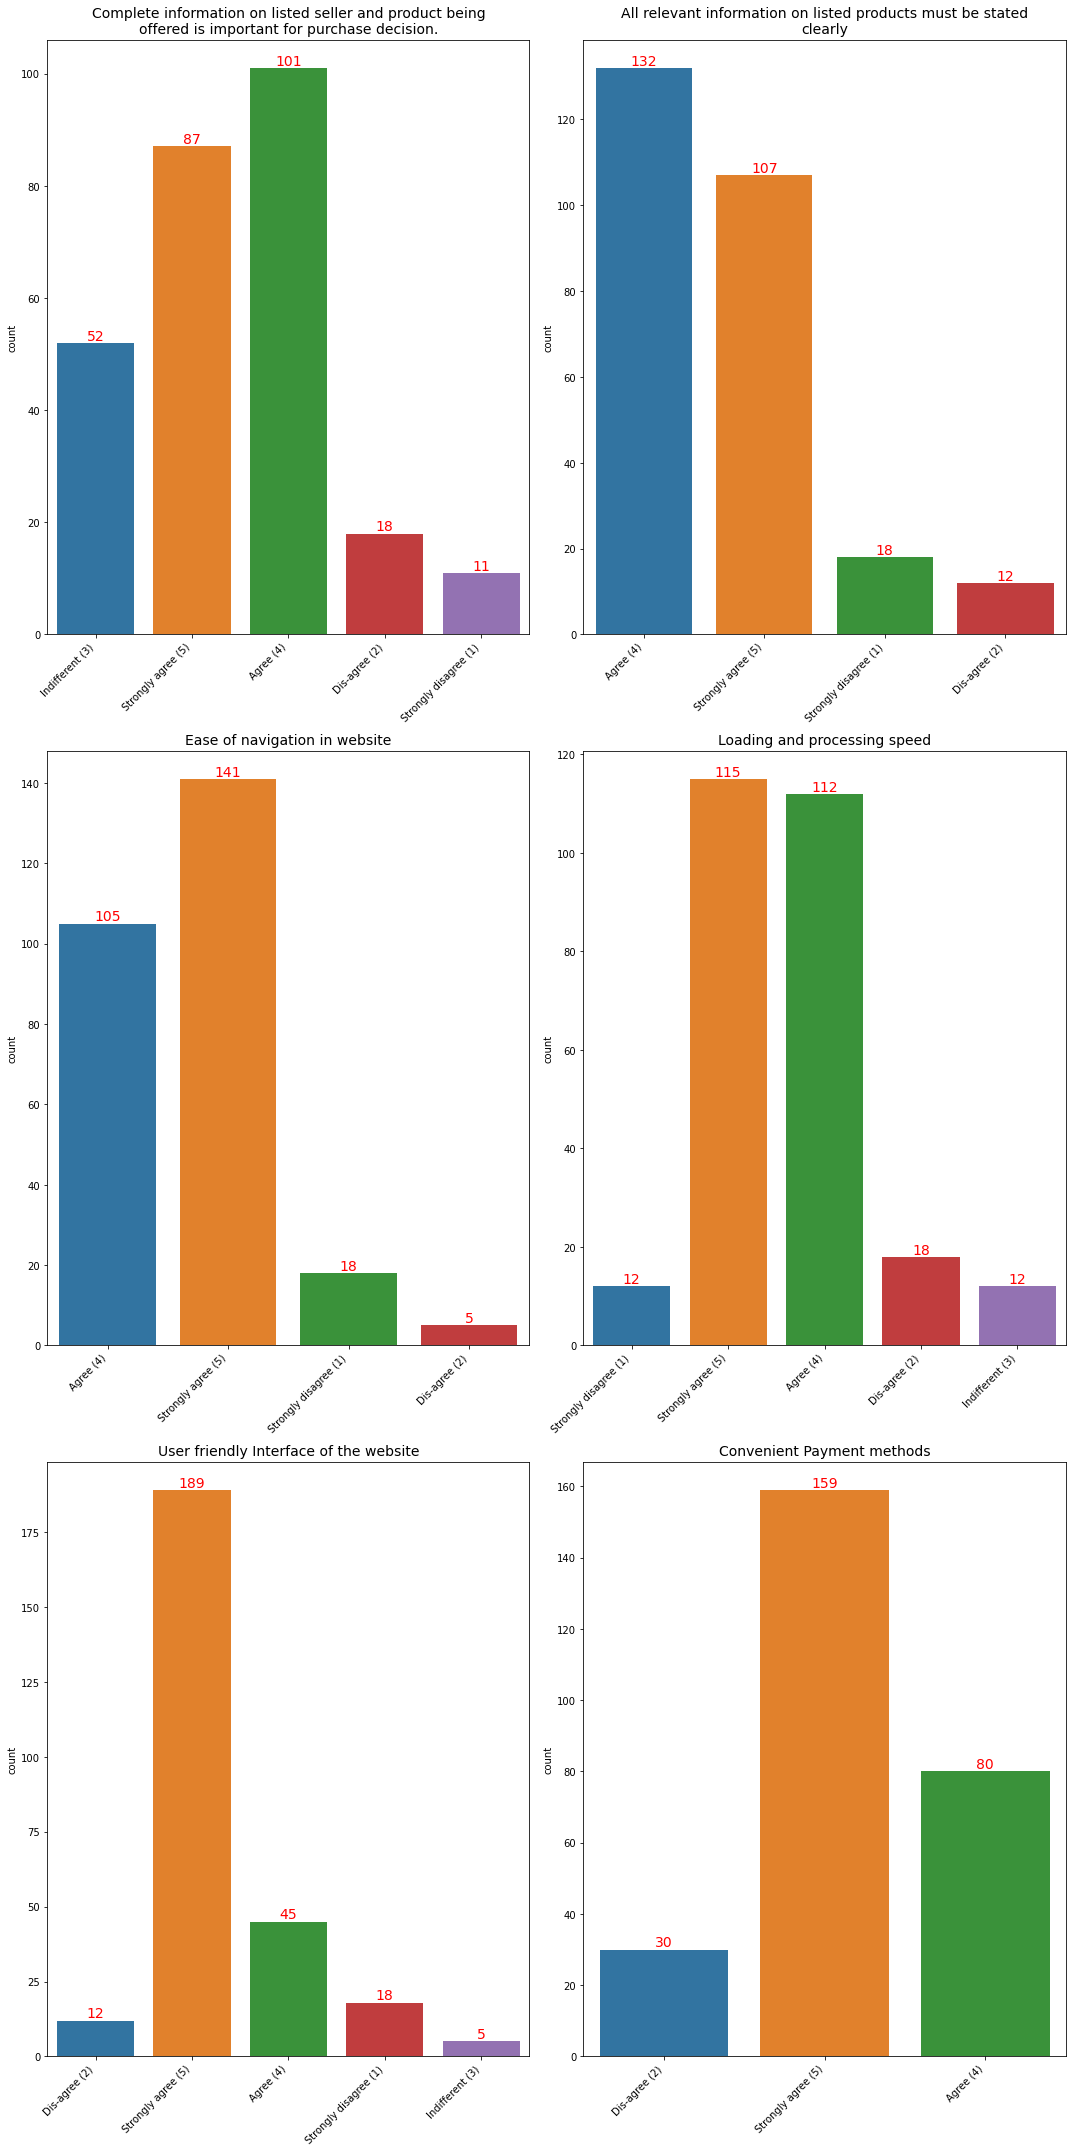

In [14]:
plt.figure(figsize=(15,30))
j=1
for i in col[18:24]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()        

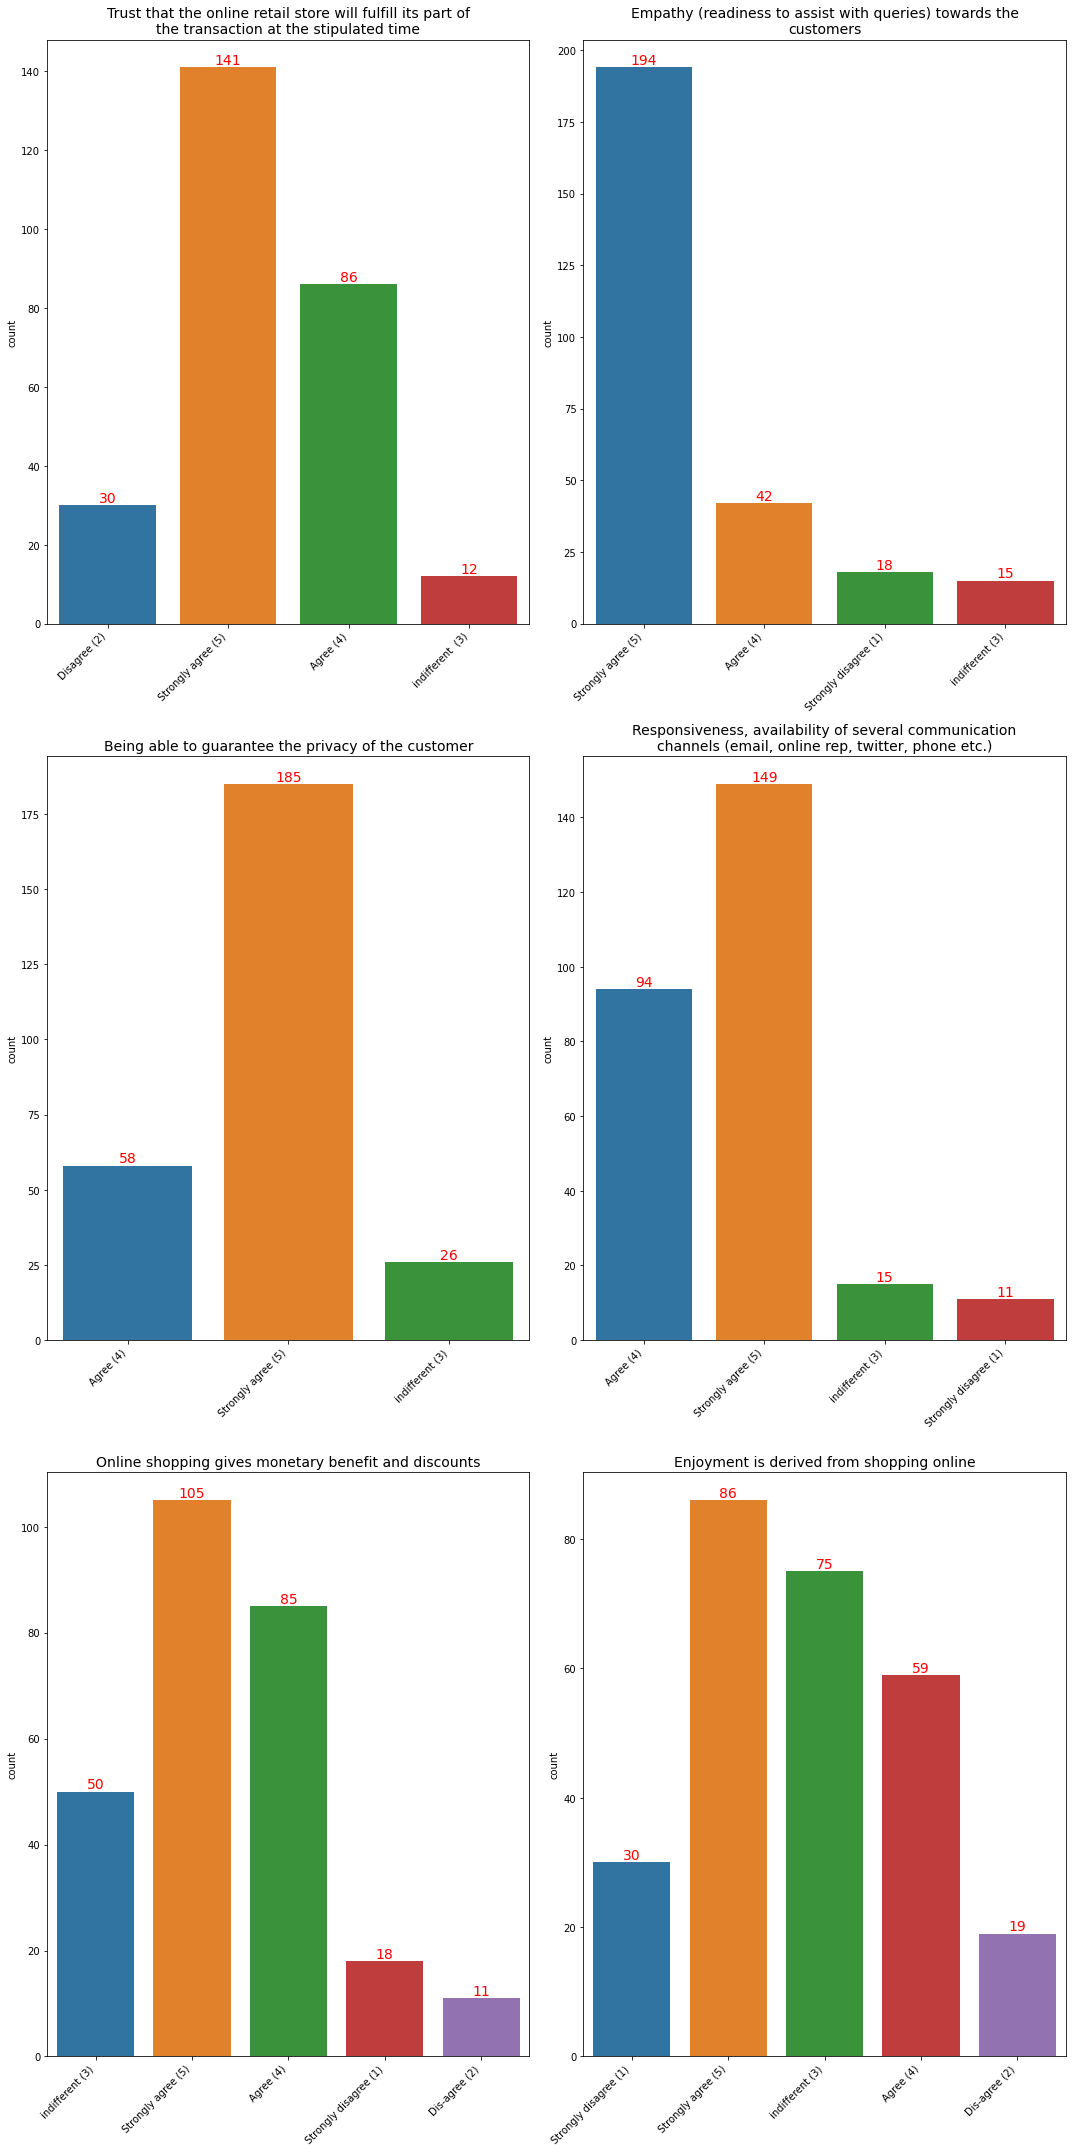

In [15]:
plt.figure(figsize=(15,30))
j=1
for i in col[24:30]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()        

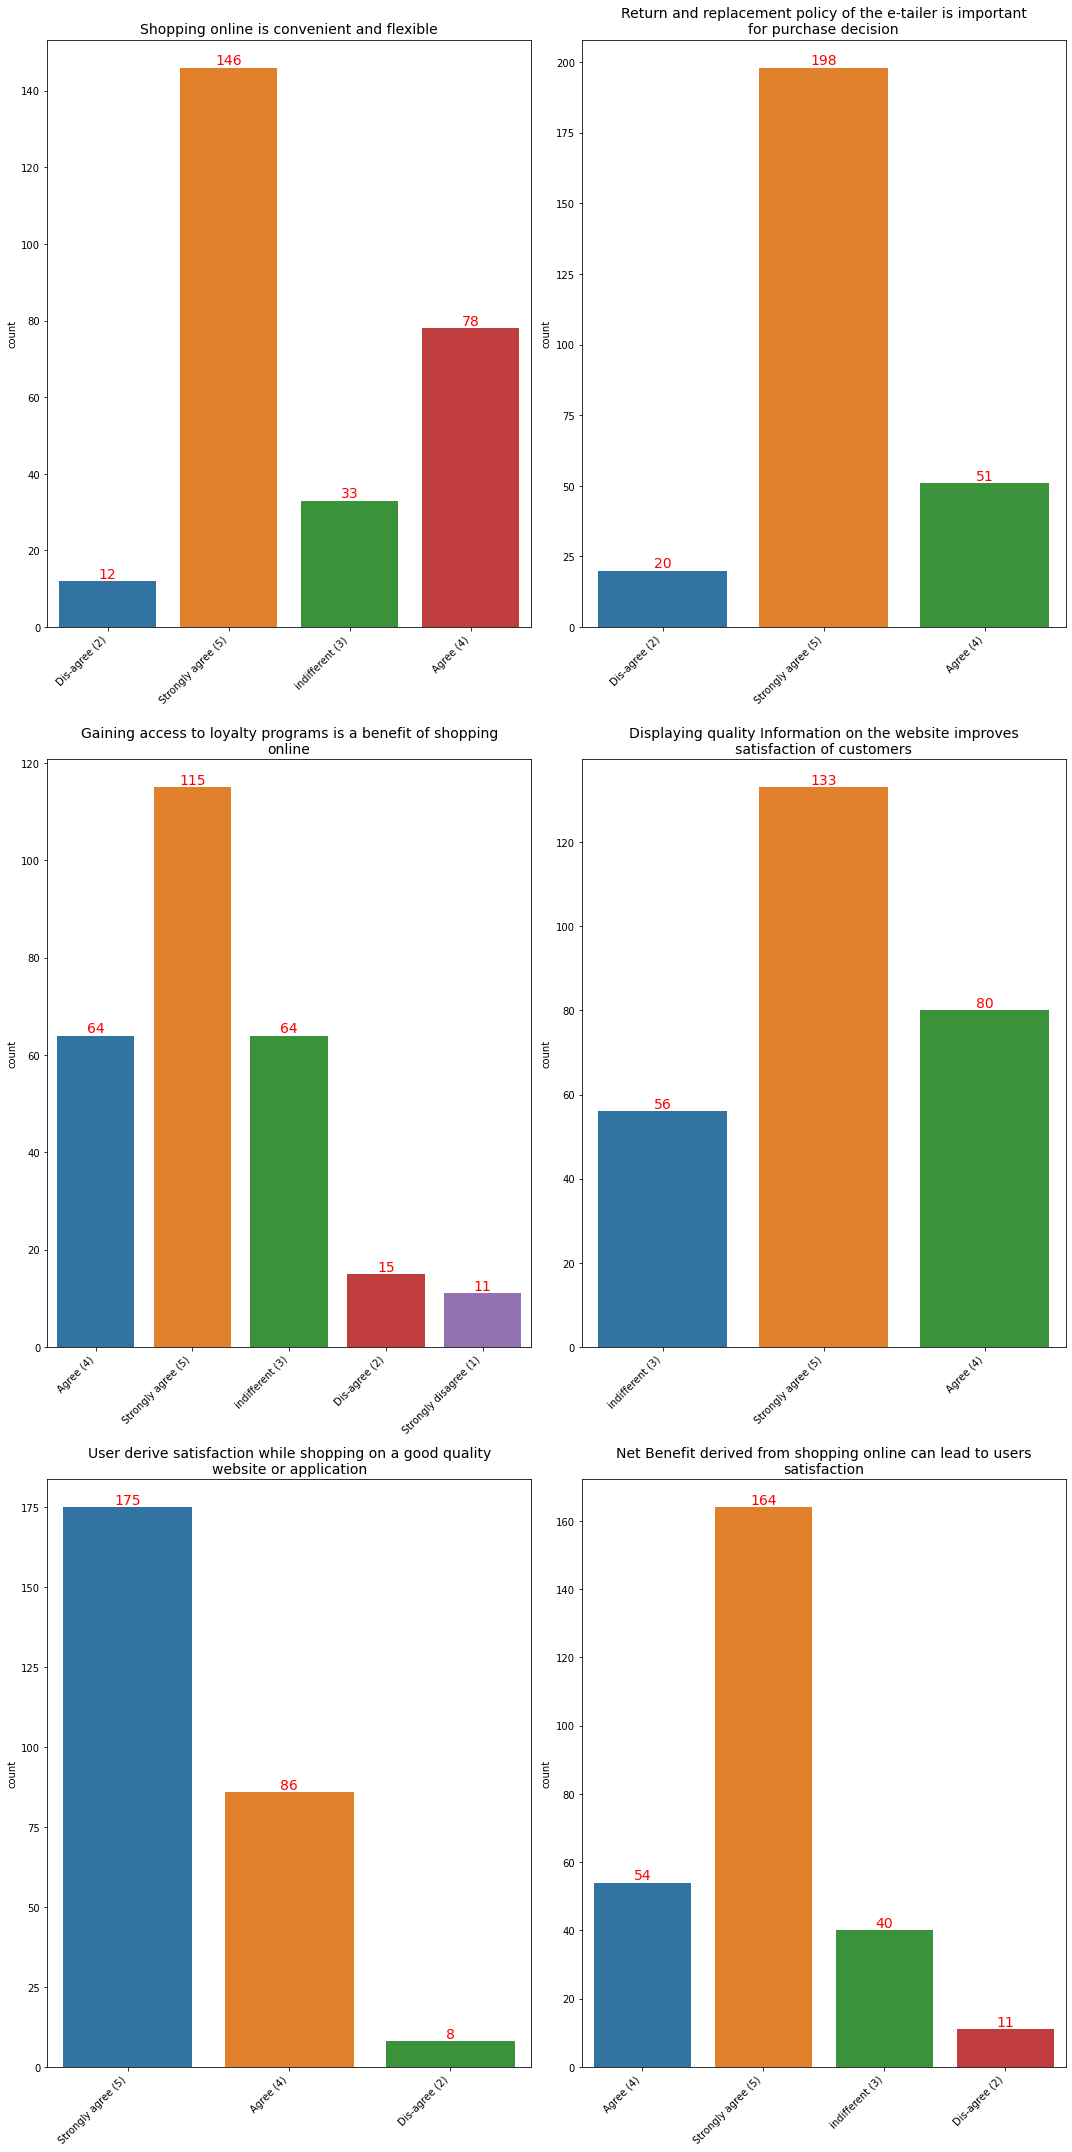

In [16]:
plt.figure(figsize=(15,30))
j=1
for i in col[30:36]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()        

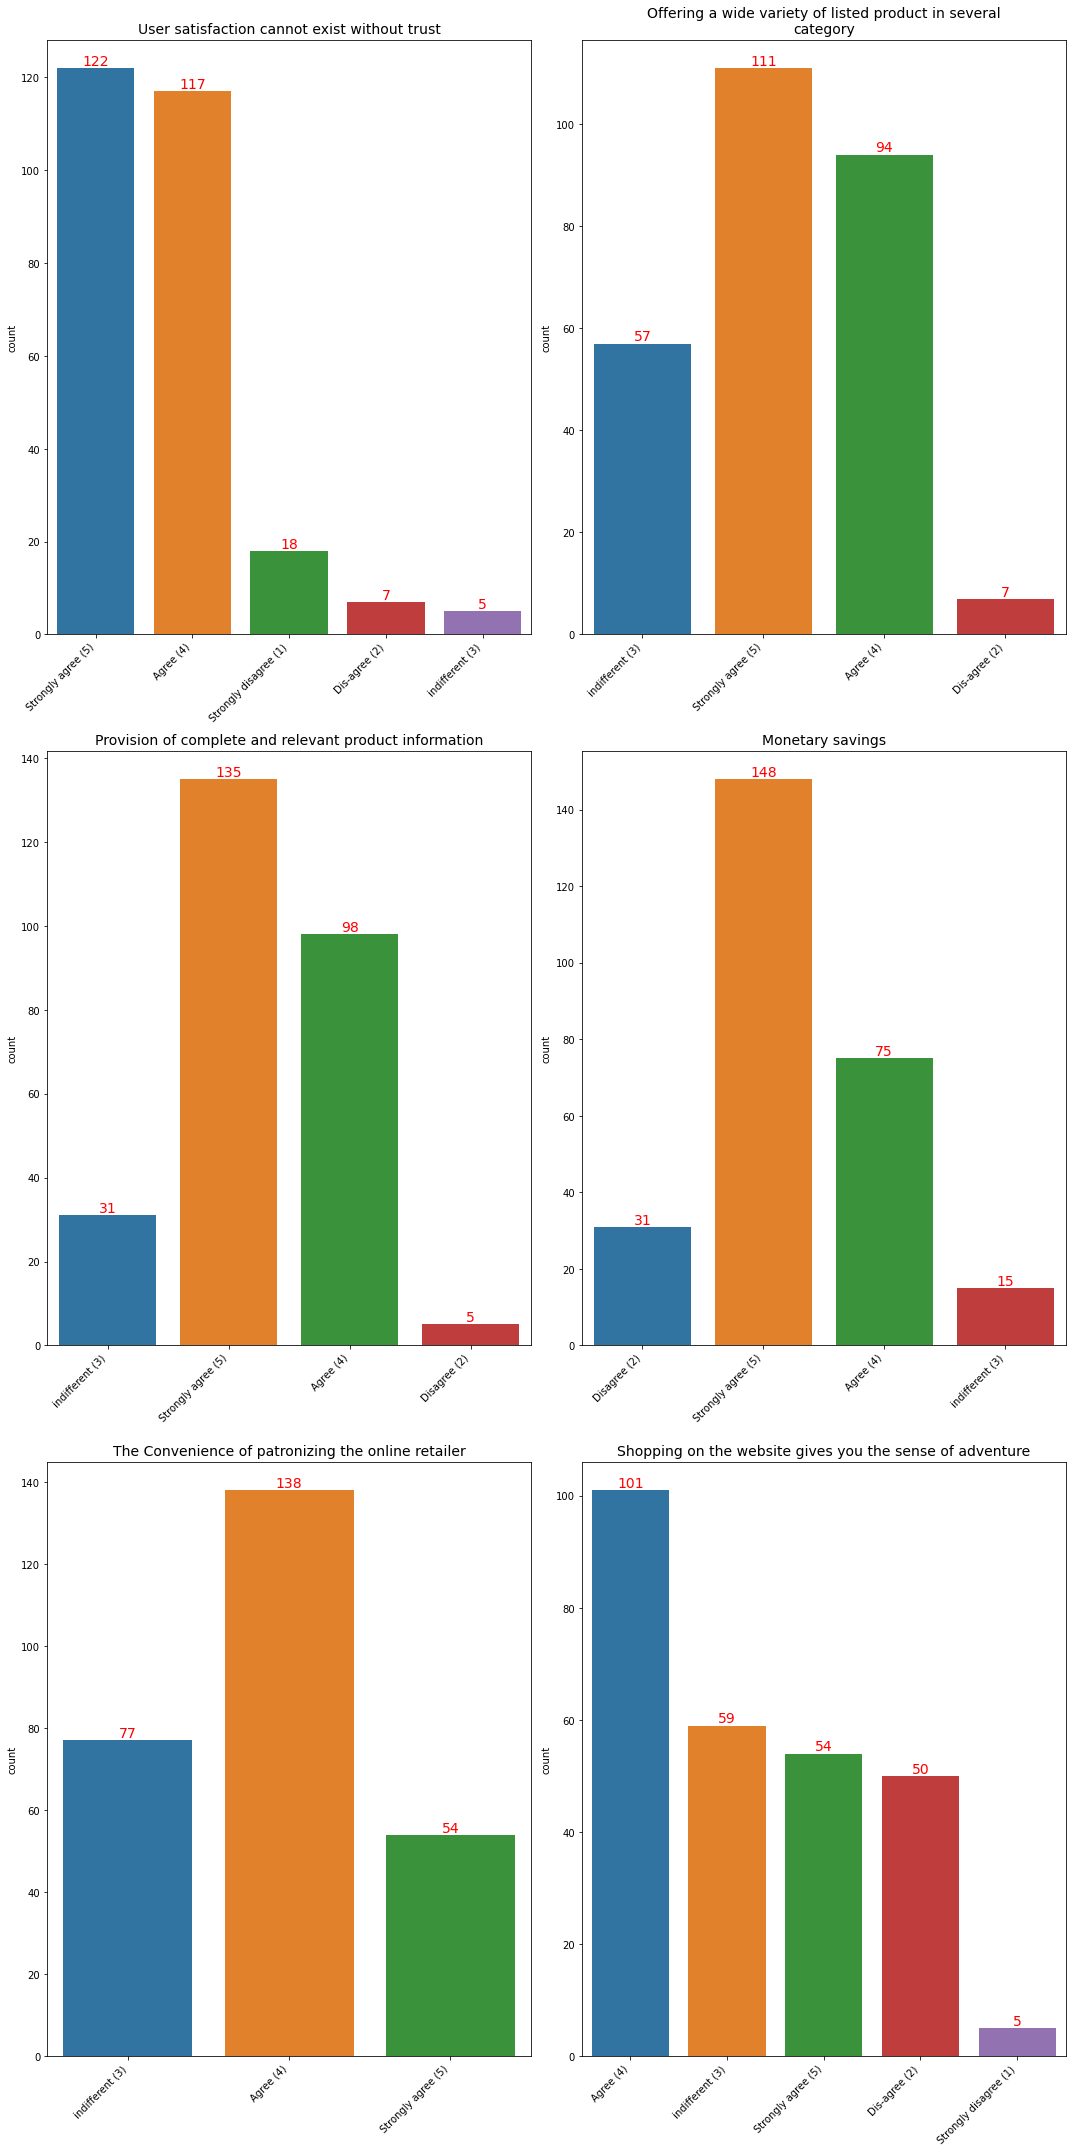

In [17]:
plt.figure(figsize=(15,30))
j=1
for i in col[36:42]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()        

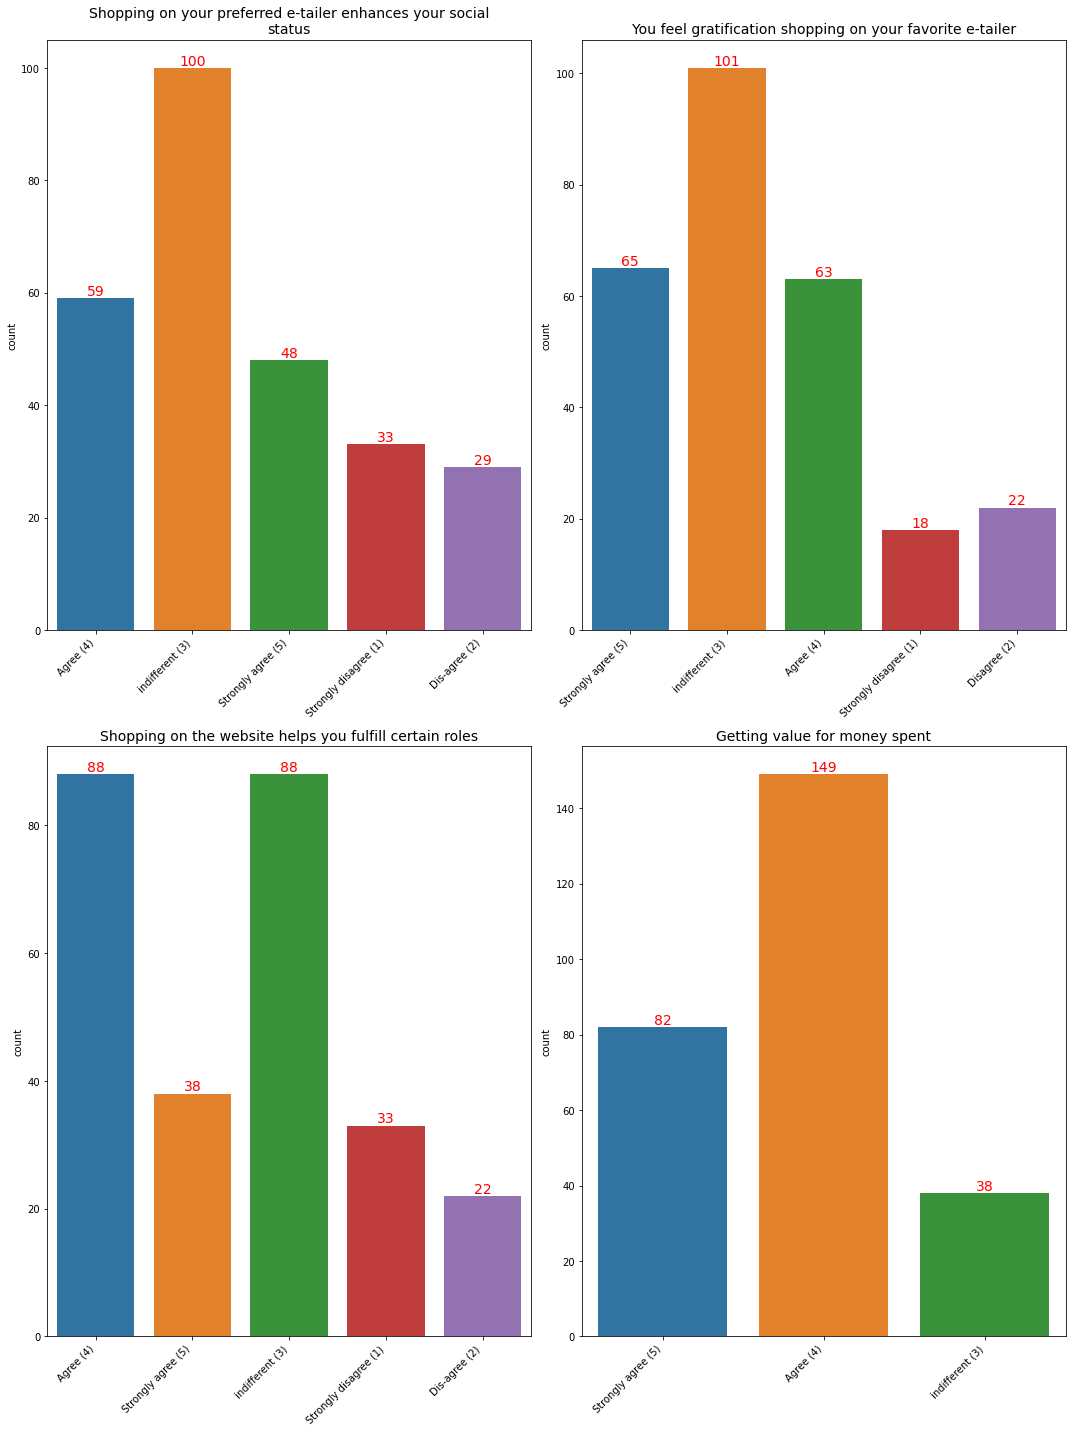

In [18]:
plt.figure(figsize=(15,20))
j=1
for i in col[42:46]:
    plt.subplot(2,2,j)
    j=j+1
    ax = sns.countplot(df[i])
    ax.set_title('\n'.join(wrap(col_c[col.index(i)],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()    

In [75]:
df_trust_serv = df[['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', '27 Empathy (readiness to assist with queries) towards the customers', '28 Being able to guarantee the privacy of the customer', '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', '33 Return and replacement policy of the e-tailer is important for purchase decision', '34 Gaining access to loyalty programs is a benefit of shopping online', '35 Displaying quality Information on the website improves satisfaction of customers', '36 User derive satisfaction while shopping on a good quality website or application', '37 Net Benefit derived from shopping online can lead to users satisfaction', '38 User satisfaction cannot exist without trust']]
df_trust_serv

26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time  \
0                                         Disagree (2)                                                      
1                                   Strongly agree (5)                                                      
2                                   Strongly agree (5)                                                      
3                                            Agree (4)                                                      
4                                            Agree (4)                                                      
..                                                 ...                                                      
264                                          Agree (4)                                                      
265                                 Strongly agree (5)                                                      
266                                          Agree (4)                                                      
267                                 Strongly agree (5)                                                      
268                                 Strongly agree (5)                                                      

    27 Empathy (readiness to assist with queries) towards the customers  \
0                                   Strongly agree (5)                    
1                                   Strongly agree (5)                    
2                                   Strongly agree (5)                    
3                                   Strongly agree (5)                    
4                                   Strongly agree (5)                    
..                                                 ...                    
264                                          Agree (4)                    
265                                 Strongly agree (5)                    
266                                    indifferent (3)                    
267                                 Strongly agree (5)                    
268                                 Strongly agree (5)                    

    28 Being able to guarantee the privacy of the customer  \
0                                            Agree (4)       
1                                   Strongly agree (5)       
2                                   Strongly agree (5)       
3                                   Strongly agree (5)       
4                                            Agree (4)       
..                                                 ...       
264                                          Agree (4)       
265                                 Strongly agree (5)       
266                                    indifferent (3)       
267                                 Strongly agree (5)       
268                                 Strongly agree (5)       

    29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)  \
0                                            Agree (4)                                                           
1                                   Strongly agree (5)                                                           
2                                   Strongly agree (5)                                                           
3                                            Agree (4)                                                           
4                                   Strongly agree (5)                                                           
..                                                 ...                                                           
264                                          Agree (4)                                                           
265                                 Strongly agree (5)                                                           
266                    

In [68]:
df_grat = df[['45 You feel gratification shopping on your favorite e-tailer', '42 The Convenience of patronizing the online retailer', '31 Enjoyment is derived from shopping online']]
df_role = df[['46 Shopping on the website helps you fulfill certain roles']]
df_best_deal = df[['47 Getting value for money spent']]
df_social = df[['44 Shopping on your preferred e-tailer enhances your social status']]
df_adv = df[['43 Shopping on the website gives you the sense of adventure']]



df_prod_off = df[['19 Information on similar product to the one highlighted  is important for product comparison', '39 Offering a wide variety of listed product in several category']]
df_conv = df[['32 Shopping online is convenient and flexible','18 The content on the website must be easy to read and understand', '22 Ease of navigation in website', '23 Loading and processing speed', '24 User friendly Interface of the website', '25 Convenient Payment methods']]
df_prod_inf = df[['20 Complete information on listed seller and product being offered is important for purchase decision.', '21 All relevant information on listed products must be stated clearly', '40 Provision of complete and relevant product information']]
df_mon_sav = df[['30 Online shopping gives monetary benefit and discounts', '41 Monetary savings']]

In [69]:
df_hend = df_grat.join(df_role.join(df_best_deal.join(df_social.join(df_adv))))
df_hend

45 You feel gratification shopping on your favorite e-tailer  \
0                                   Strongly agree (5)             
1                                   Strongly agree (5)             
2                                      indifferent (3)             
3                                            Agree (4)             
4                                   Strongly agree (5)             
..                                                 ...             
264                                    indifferent (3)             
265                                 Strongly agree (5)             
266                                          Agree (4)             
267                                    indifferent (3)             
268                                 Strongly agree (5)             

    42 The Convenience of patronizing the online retailer  \
0                                      indifferent (3)      
1                                      indifferent (3)      
2                                            Agree (4)      
3                                            Agree (4)      
4                                            Agree (4)      
..                                                 ...      
264                                    indifferent (3)      
265                                 Strongly agree (5)      
266                                          Agree (4)      
267                                          Agree (4)      
268                                 Strongly agree (5)      

    31 Enjoyment is derived from shopping online  \
0                          Strongly disagree (1)   
1                             Strongly agree (5)   
2                             Strongly agree (5)   
3                                indifferent (3)   
4                             Strongly agree (5)   
..                                           ...   
264                              indifferent (3)   
265                           Strongly agree (5)   
266                              indifferent (3)   
267                                    Agree (4)   
268                           Strongly agree (5)   

    46 Shopping on the website helps you fulfill certain roles  \
0                                            Agree (4)           
1                                   Strongly agree (5)           
2                                      indifferent (3)           
3                                      indifferent (3)           
4                                Strongly disagree (1)           
..                                                 ...           
264                                          Agree (4)           
265                                 Strongly agree (5)           
266                                          Agree (4)           
267                                          Agree (4)           
268                                 Strongly agree (5)           

    47 Getting value for money spent  \
0                 Strongly agree (5)   
1                 Strongly agree (5)   
2                          Agree (4)   
3                          Agree (4)   
4                 Strongly agree (5)   
..                               ...   
264                  indifferent (3)   
265               Strongly agree (5)   
266                        Agree (4)   
267                  indifferent (3)   
268               Strongly agree (5)   

    44 Shopping on your preferred e-tailer enhances your social status  \
0                                            Agree (4)                   
1                                      indifferent (3)                   
2                                            Agree (4)                   
3                                   Strongly agree (5)                   
4                                Strongly disagree (1)                   
..                                                 ...                   
264                                  

In [70]:
df_util = df_prod_off.join(df_conv.join(df_prod_inf.join(df_mon_sav)))
df_util

19 Information on similar product to the one highlighted  is important for product comparison  \
0                                      Indifferent (3)                                              
1                                   Strongly agree (5)                                              
2                                            Agree (4)                                              
3                                            Agree (4)                                              
4                                      Indifferent (3)                                              
..                                                 ...                                              
264                                          Agree (4)                                              
265                                 Strongly agree (5)                                              
266                                 Strongly agree (5)                                              
267                                          Agree (4)                                              
268                                 Strongly agree (5)                                              

    39 Offering a wide variety of listed product in several category  \
0                                      indifferent (3)                 
1                                   Strongly agree (5)                 
2                                   Strongly agree (5)                 
3                                            Agree (4)                 
4                                            Agree (4)                 
..                                                 ...                 
264                                          Agree (4)                 
265                                 Strongly agree (5)                 
266                                    indifferent (3)                 
267                                 Strongly agree (5)                 
268                                 Strongly agree (5)                 

    32 Shopping online is convenient and flexible  \
0                                   Dis-agree (2)   
1                              Strongly agree (5)   
2                              Strongly agree (5)   
3                                 indifferent (3)   
4                              Strongly agree (5)   
..                                            ...   
264                               indifferent (3)   
265                            Strongly agree (5)   
266                                     Agree (4)   
267                            Strongly agree (5)   
268                            Strongly agree (5)   

    18 The content on the website must be easy to read and understand  \
0                                            Agree (4)                  
1                                   Strongly agree (5)                  
2                                   Strongly agree (5)                  
3                                            Agree (4)                  
4                                   Strongly agree (5)                  
..                                                 ...                  
264                                          Agree (4)                  
265                                 Strongly agree (5)                  
266                                 Strongly agree (5)                  
267                                 Strongly agree (5)                  
268                                 Strongly agree (5)                  

    22 Ease of navigation in website 23 Loading and processing speed  \
0                          Agree (4)           Strongly disagree (1)   
1                 Strongly agree (5)              Strongly agree (5)   
2                          Agree (4)                       Agree (4)   
3                 Strongly agree (5)                       Agree (4)   
4                          Agree (4)              St

In [22]:
df_factors = df[['1Gender of respondent', '2 How old are you? ', '3 Which city do you shop online from?', '5 Since How Long You are Shopping Online ?', '6 How many times you have made an online purchase in the past 1 year?', '7 How do you access the internet while shopping on-line?', '8 Which device do you use to access the online shopping?', '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ', '10 What is the operating system (OS) of your device?\t\t\t\t                                          ', '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ', '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ', '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ', '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ', '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',]]
df_factors

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile internet         
3                                      Mobile internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile internet         
265                                    Mobile internet         
266                                    Mobile internet         
267                                              Wi-Fi         
268                                    Mobile internet         

    8 Which device do you use to access the online shopping?  \
0                                              Desktop         
1                                           Smartphone         
2                                           Smartphone         
3                                           Smartphone         
4                                           Smartphone         
..                                                 ...         
264                                         Smartphone         
265                                         Smartphone         
266

In [23]:
?df.replace

## HENDONIC VALUES VS OTHER FACTORS

In [24]:
t_cols =list( df_hend.columns)
t_cols

['45 You feel gratification shopping on your favorite e-tailer',
 '42 The Convenience of patronizing the online retailer',
 '31 Enjoyment is derived from shopping online',
 '46 Shopping on the website helps you fulfill certain roles',
 '47 Getting value for money spent',
 '44 Shopping on your preferred e-tailer enhances your social status',
 '43 Shopping on the website gives you the sense of adventure']

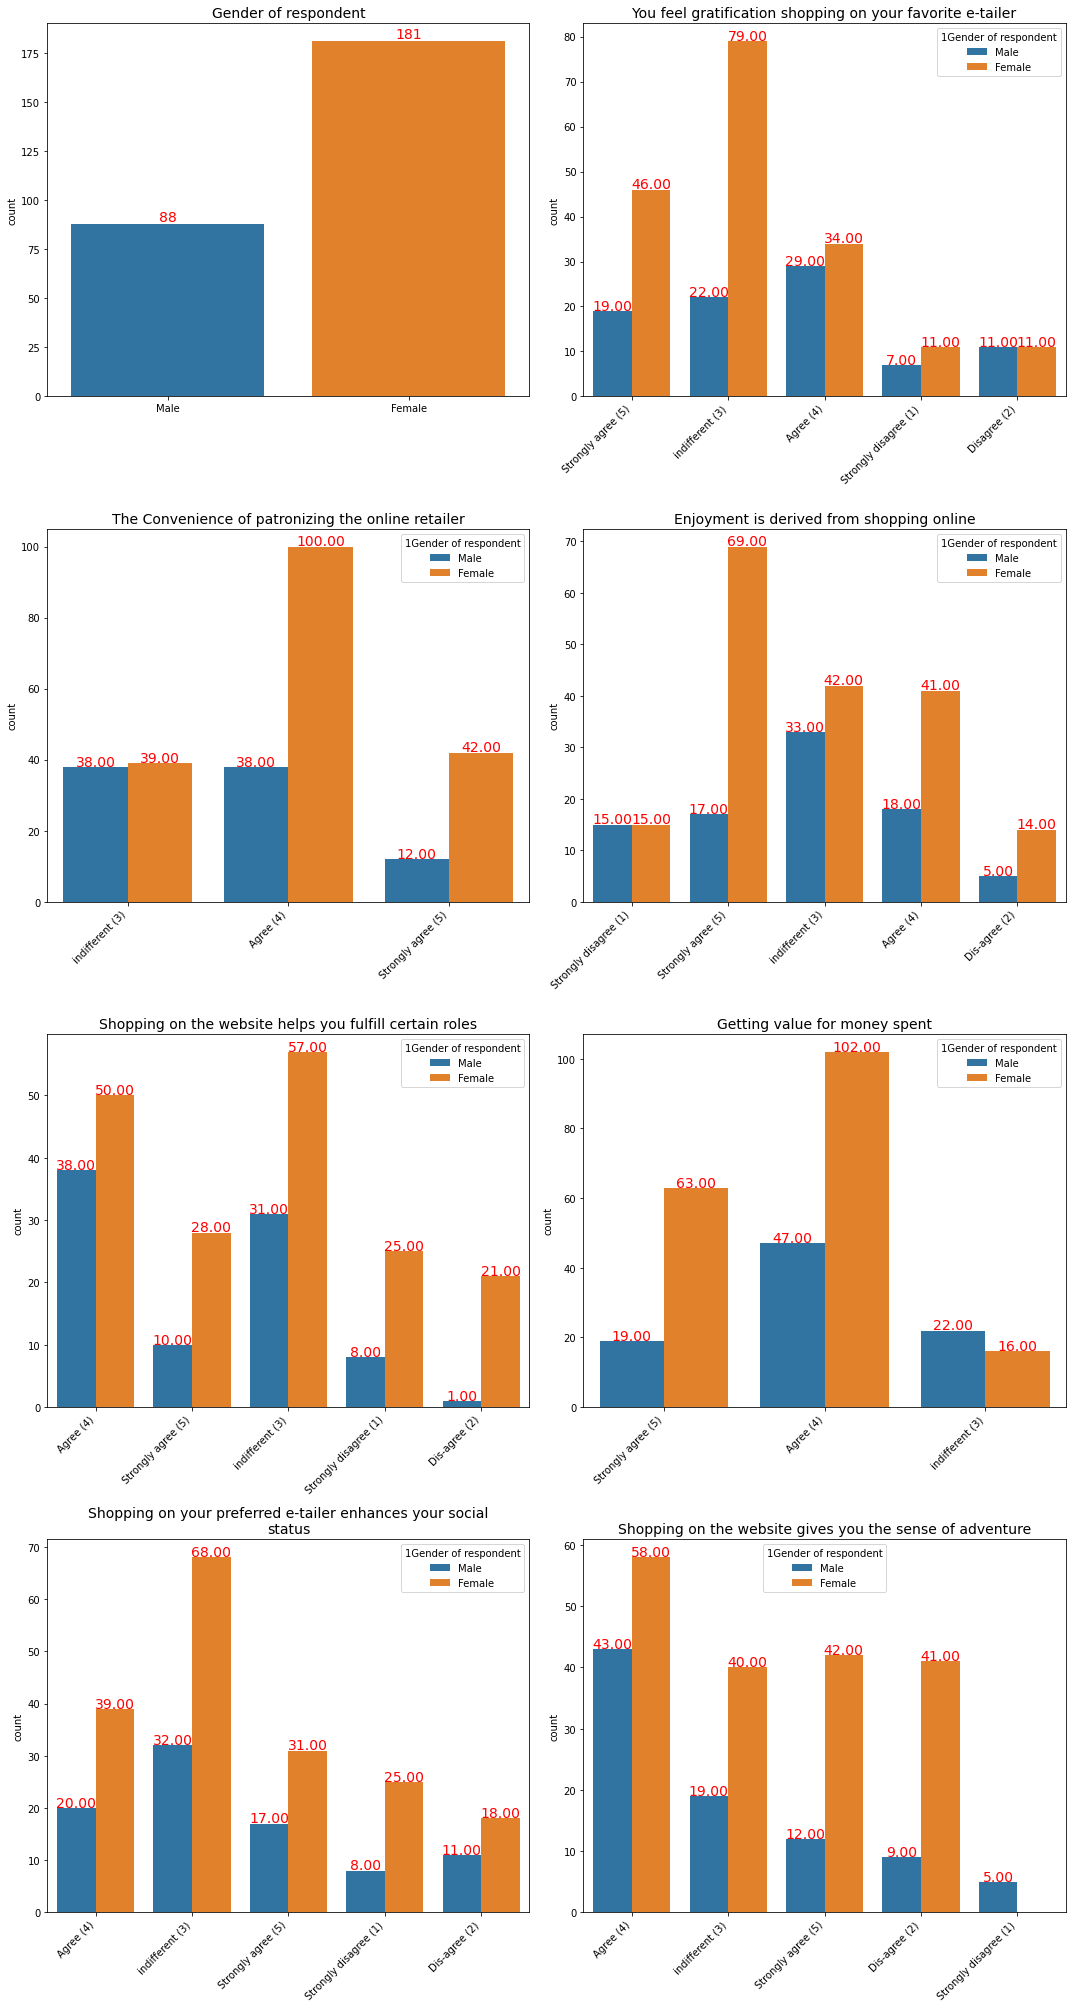

In [25]:
df_temp = df_factors.iloc[:,[0]].join(df_hend)
a = df_temp.columns[0]

plt.figure(figsize=(15,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* The ratio of women to men is approximately 2:1.
* The ratio of women to men in the column 'The Convenience of patronizing the online retailer' for the positive reponse categories(strongly agree, agree) is 2.8:1 approx. This shows that women get more gratification from patronizing the online retailer than men.
* The ratio of women to men in the column 'Enjoyment is derived from shopping online' for the positive reponse categories(strongly agree, agree) is 3:1 approx. This shows that women get more enjoyment from shopping online than men.
* The ratio of women to men in the column 'Shopping on the website helps you fulfill certain roles' for the negative reponse categories(strongly disagree, disagree) is 5:1 approx. This shows that men shop more out of the need to shop online than the enjoyment or pleasure of it.
* The ratio of women to men in the column 'Getting value for money spent' for the positive reponse categories(strongly disagree, disagree) is 2.5:1 approx and in the 'Indifferent' category is 0.7:1. This shows that women believe that they are getting high value for their money spent than men.
* The ratio of women to men in the column 'Shopping on the website gives you the sense of adventure' for the negative reponse categories(strongly disagree, disagree) is 3:1 approx. This shows that women are less likely to get a sense of adventure from online sjopping than men.

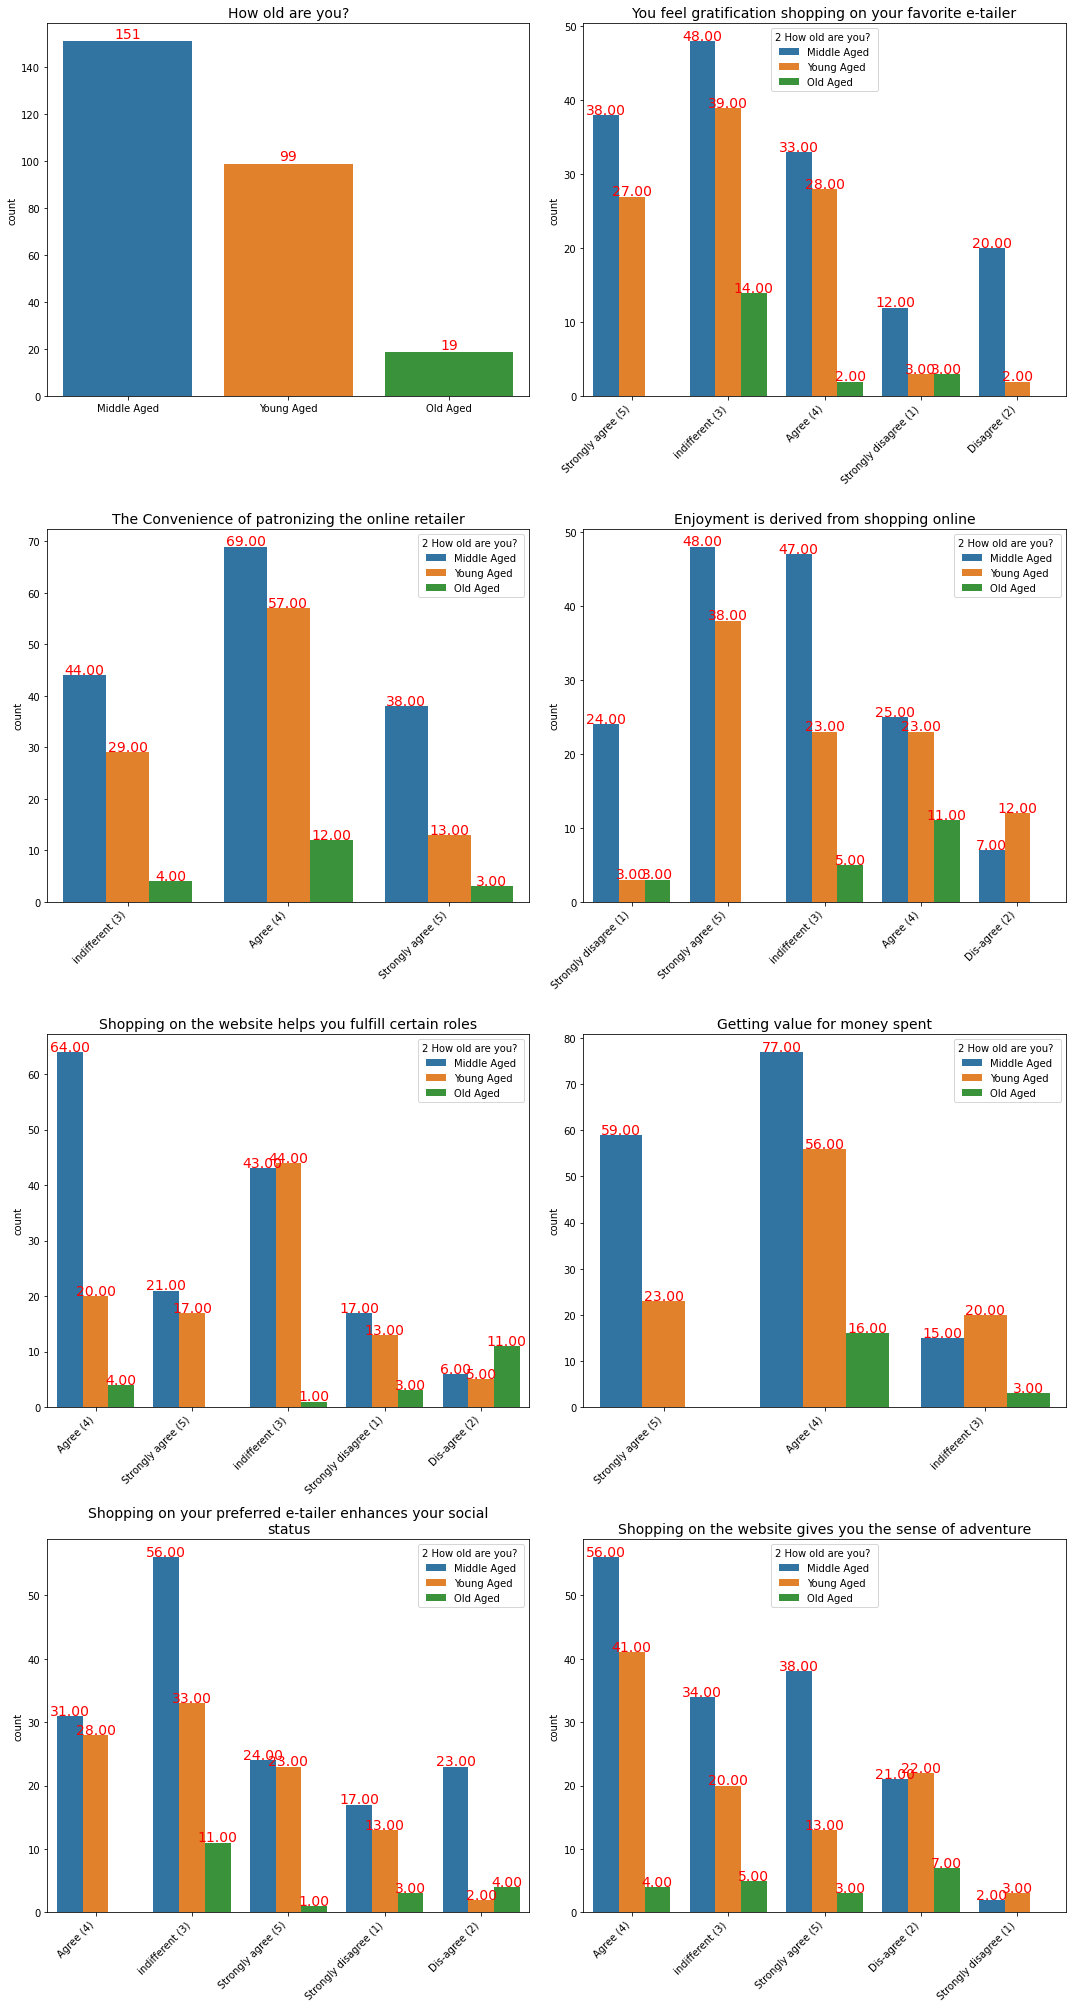

In [26]:
df_temp = df_factors.iloc[:,[1]].join(df_hend)
a = df_temp.columns[0]
# Generalizing the age groups
df_temp['2 How old are you? '].replace('31-40 years', 'Middle Aged', inplace = True)
df_temp['2 How old are you? '].replace('41-50 yaers', 'Middle Aged', inplace = True)
df_temp['2 How old are you? '].replace('21-30 years', 'Young Aged', inplace = True)
df_temp['2 How old are you? '].replace('Less than 20 years', 'Young Aged', inplace = True)
df_temp['2 How old are you? '].replace('51 years and above', 'Old Aged', inplace = True)
# df_temp
plt.figure(figsize=(15,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()

* Majority of people who took the survey were middle aged(31-40, 41-50).
* The ratio of Young aged people(<20, 21-30) : middle aged people (31-40, 41-50) : old aged people(51>) is 0.36:0.57:0.07.
* Elderly people are less likely to get gratification from shopping online than other aged group people. This is evident from their ratios in the  'You feel gratification shopping on your favorite e-tailer' column for the positive response categories(strongly agree, agree)  - 0.43:0.55:0.02.
* Middle aged people believe that shopping helps them fulfill certain roles. Their ratios in the column 'Shopping on the website helps you fulfill certain roles' for the positive reponse categories(strongly agree, agree) is 0.29:0.68:0.03.
* Middle aged people believe that they are Getting value for money spent online. Their ratios in the column 'Getting value for money spent' for the positive response categories(strongly agree, agree) is 0.59:0.34:0.07 approx.
*  Young people tend to believe that shopping on their preferred e-tailer enhances their social status than other age group people. Their ratios in the column 'Shopping on your preferred e-tailer enhances your social status' for the positive response categories(strongly agree, agree) is 0.48:0.51:0.01:
* Young people are less likely to get a sense of adventure from online shopping than other age groups.Their ratios in the column 'Shopping on the website gives you the sense of adventure' for the negative response categories(strongly disagree, disagree) is 0.45:0.43:0.12 approx.

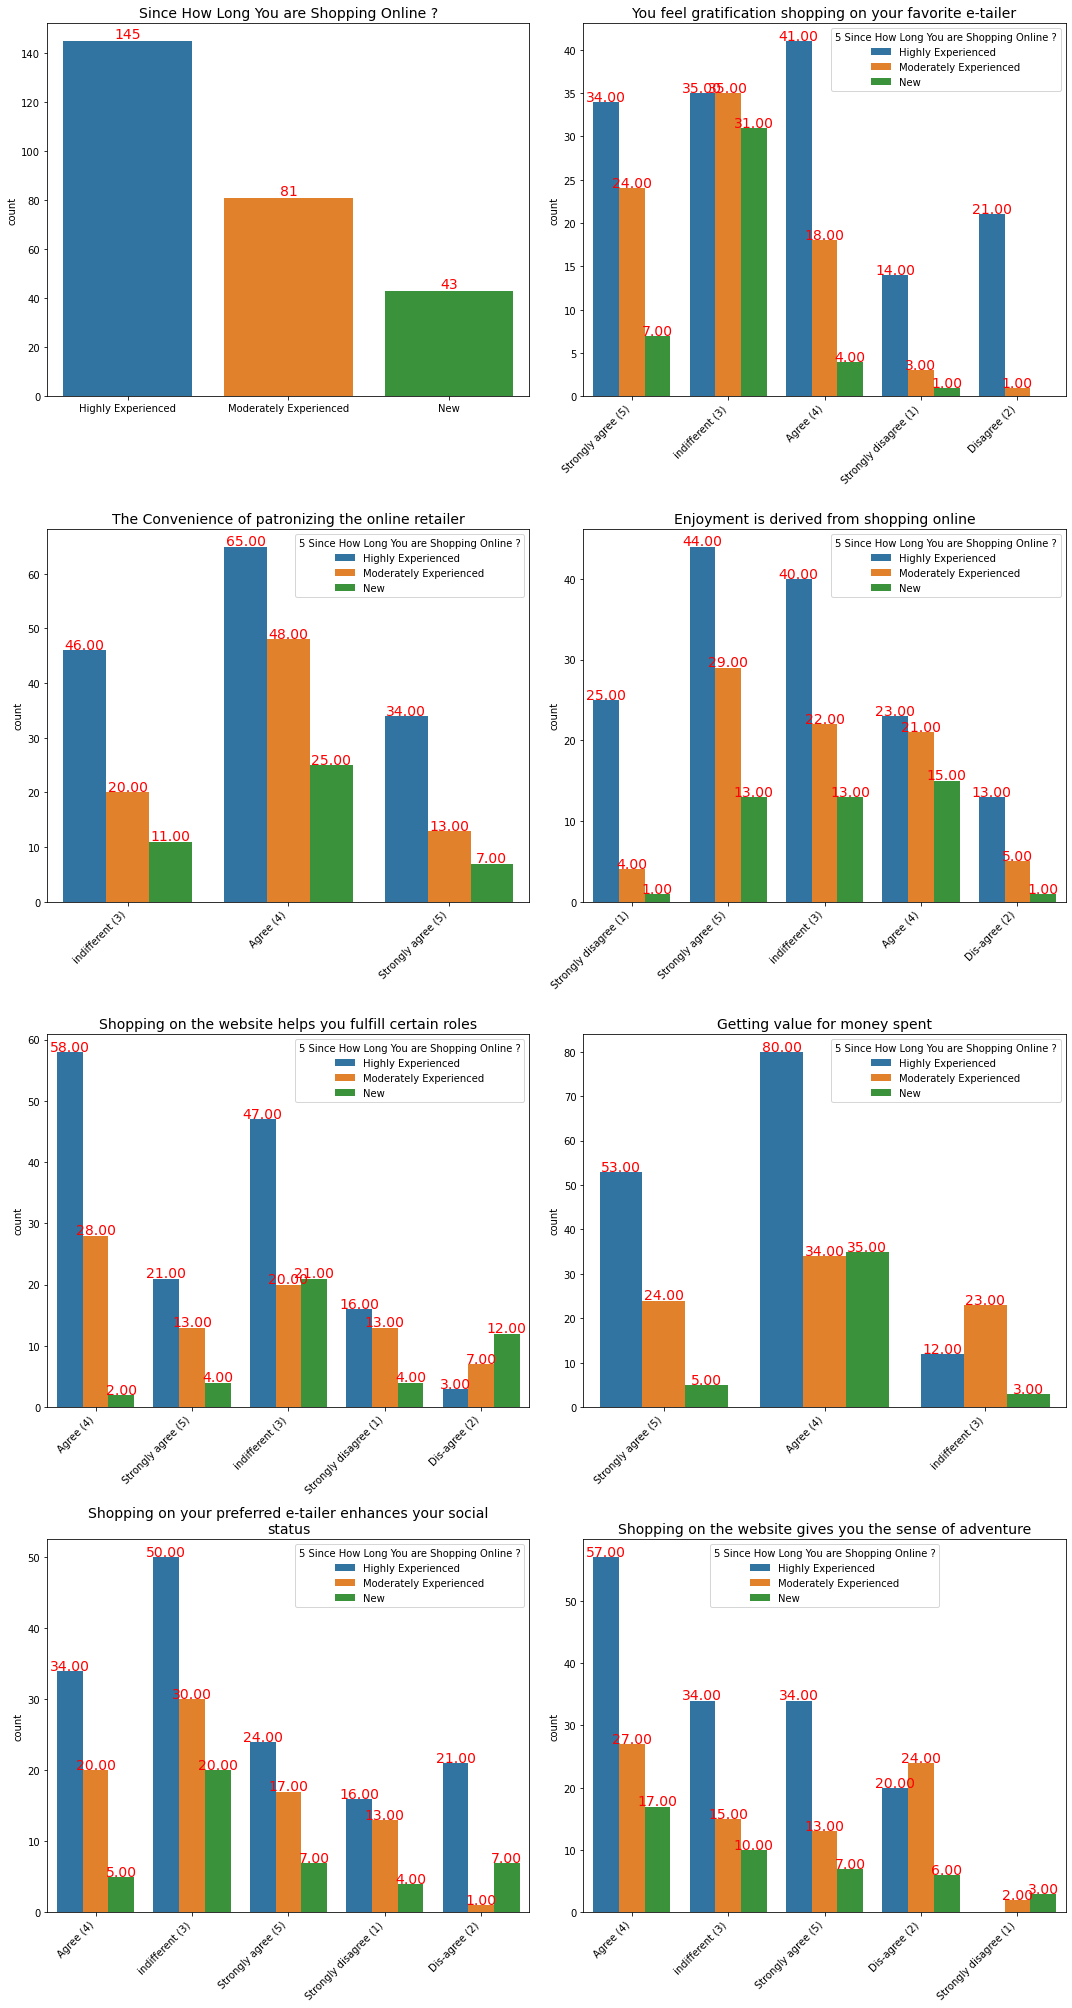

In [27]:
df_temp = df_factors.iloc[:,[3]].join(df_hend)
a = df_temp.columns[0]

#Generalising Customers' experience of shopping online
df_temp['5 Since How Long You are Shopping Online ?'].replace('Above 4 years', 'Highly Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('3-4 years', 'Highly Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('1-2 years', 'Moderately Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('2-3 years', 'Moderately Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('Less than 1 year', 'New', inplace = True)
df_temp
plt.figure(figsize=(15,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()

* Majority of people who took the survey were highly experienced customers (i.e. who have shopped online for 3-4 years or >4 years) .
* The ratio of New customers(<1 year) : experienced customers (1-2 years, 2-3 years) : highly experienced customers (3-4 years, >4 years) is 0.16:0.30:0.54.
* Moderately experienced and new customers do not feel gratified or discontent from shopping online. This is evident from their ratios in the  'You feel gratification shopping on your favorite e-tailer' column for the indifferent category - 0.30:0.35:0.35.
* Highly Experienced are less likely to derive enjoymet from online shopping. Ratios for negative response category in the column 'Enjoyment is derived from shopping online' - 0.76:0.2:0.04
* Highly Experienced customers believe that shopping helps them fulfill certain roles. Their ratios in the column 'Shopping on the website helps you fulfill certain roles' for the positive reponse categories(strongly agree, agree) is 0.68:0.27:0.5.
* More than 90% of new customers  and highly experienced customers believe that they are getting value for money spent online.
* Moderately experienced customers are less likely to get a sense of adventure from online shopping than other age groups.Their ratios in the column 'Shopping on the website gives you the sense of adventure' for the negative response categories(strongly disagree, disagree) is 0.36:0.47:0.17 approx.

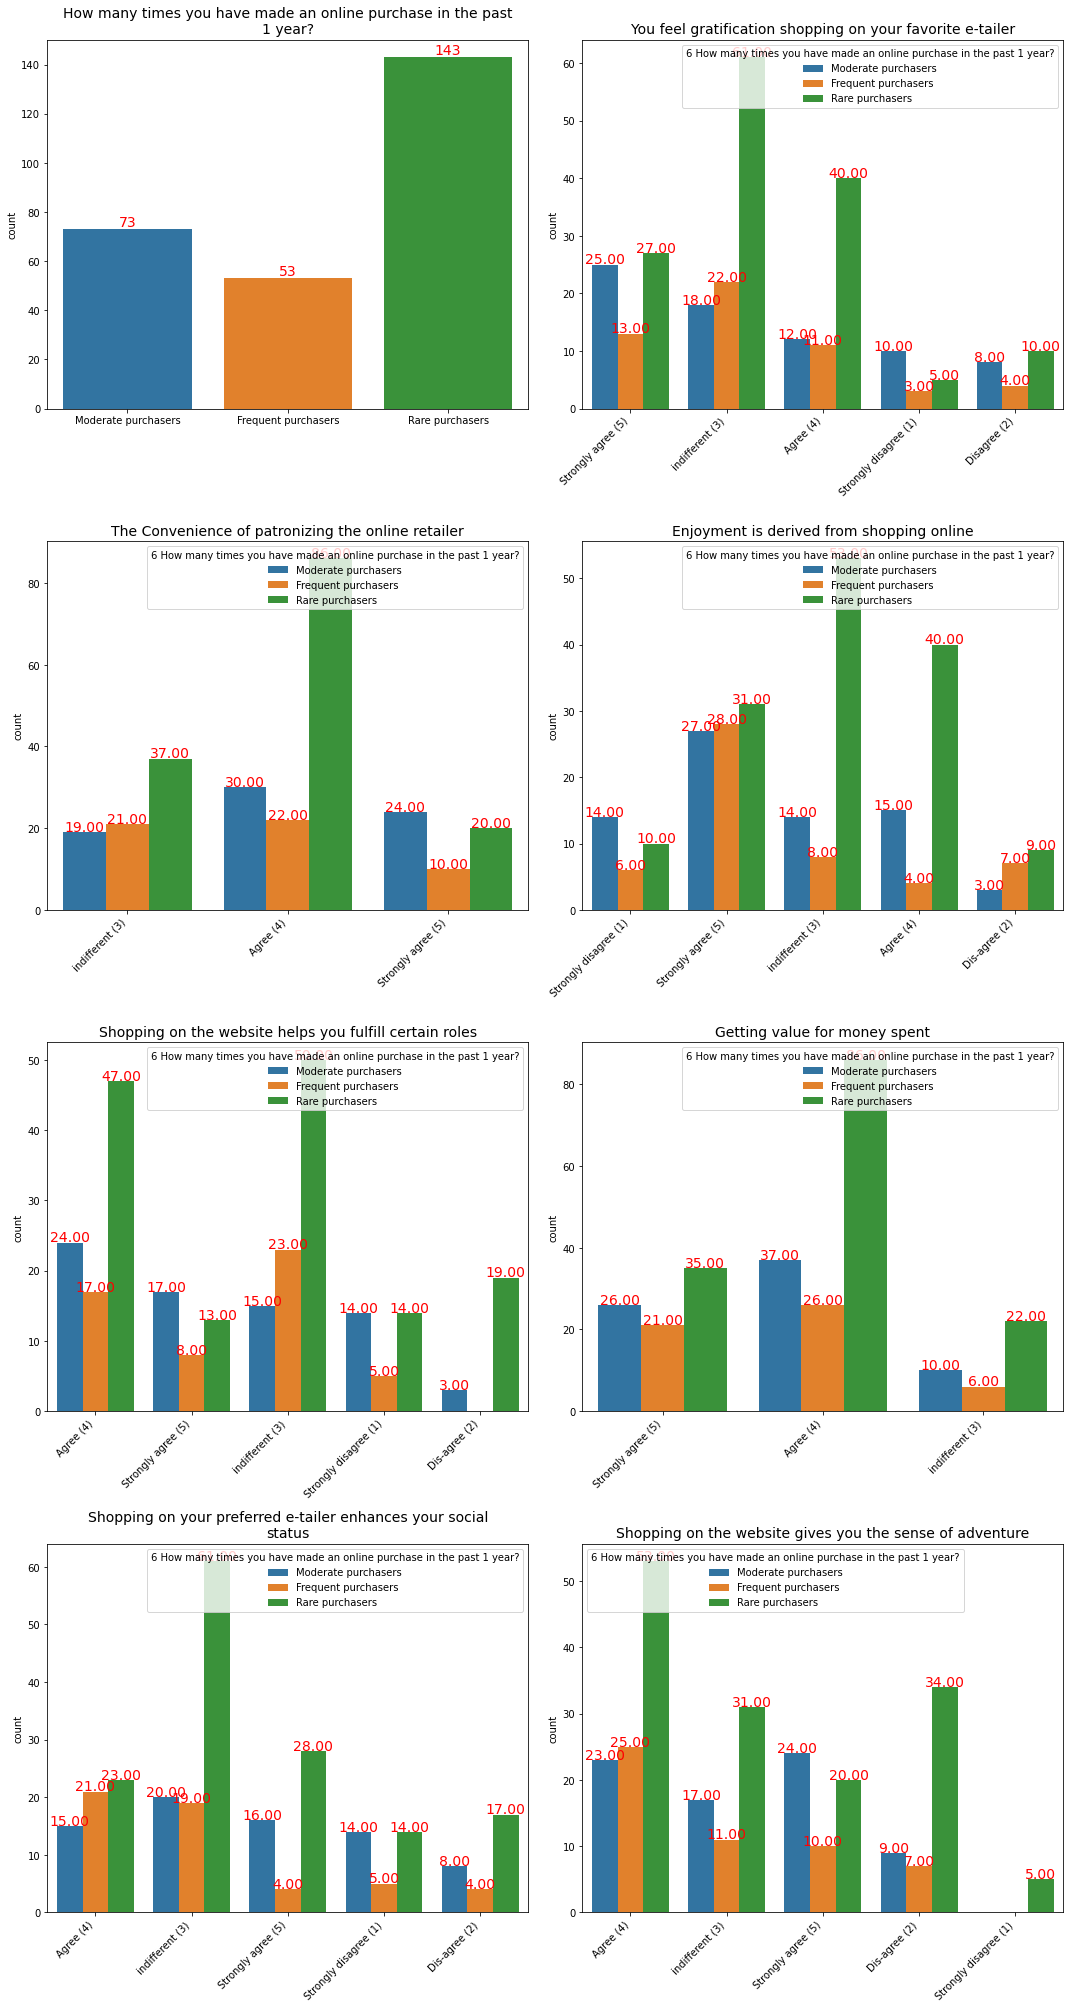

In [29]:
df_temp = df_factors.iloc[:,[4]].join(df_hend)
a = df_temp.columns[0]
df_temp

#Generalising Frequency of purchases
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('Less than 10 times', 'Rare purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('11-20 times', 'Rare purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('21-30 times', 'Moderate purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('31-40 times', 'Moderate purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('42 times and above', 'Frequent purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('41 times and above', 'Frequent purchasers', inplace = True)
# df_temp

plt.figure(figsize=(15,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()

* Majority of customers have purchased less than 20 times (rare purchasers) in the last year.
* Their ratios are distributed similarly across the categories the above factors

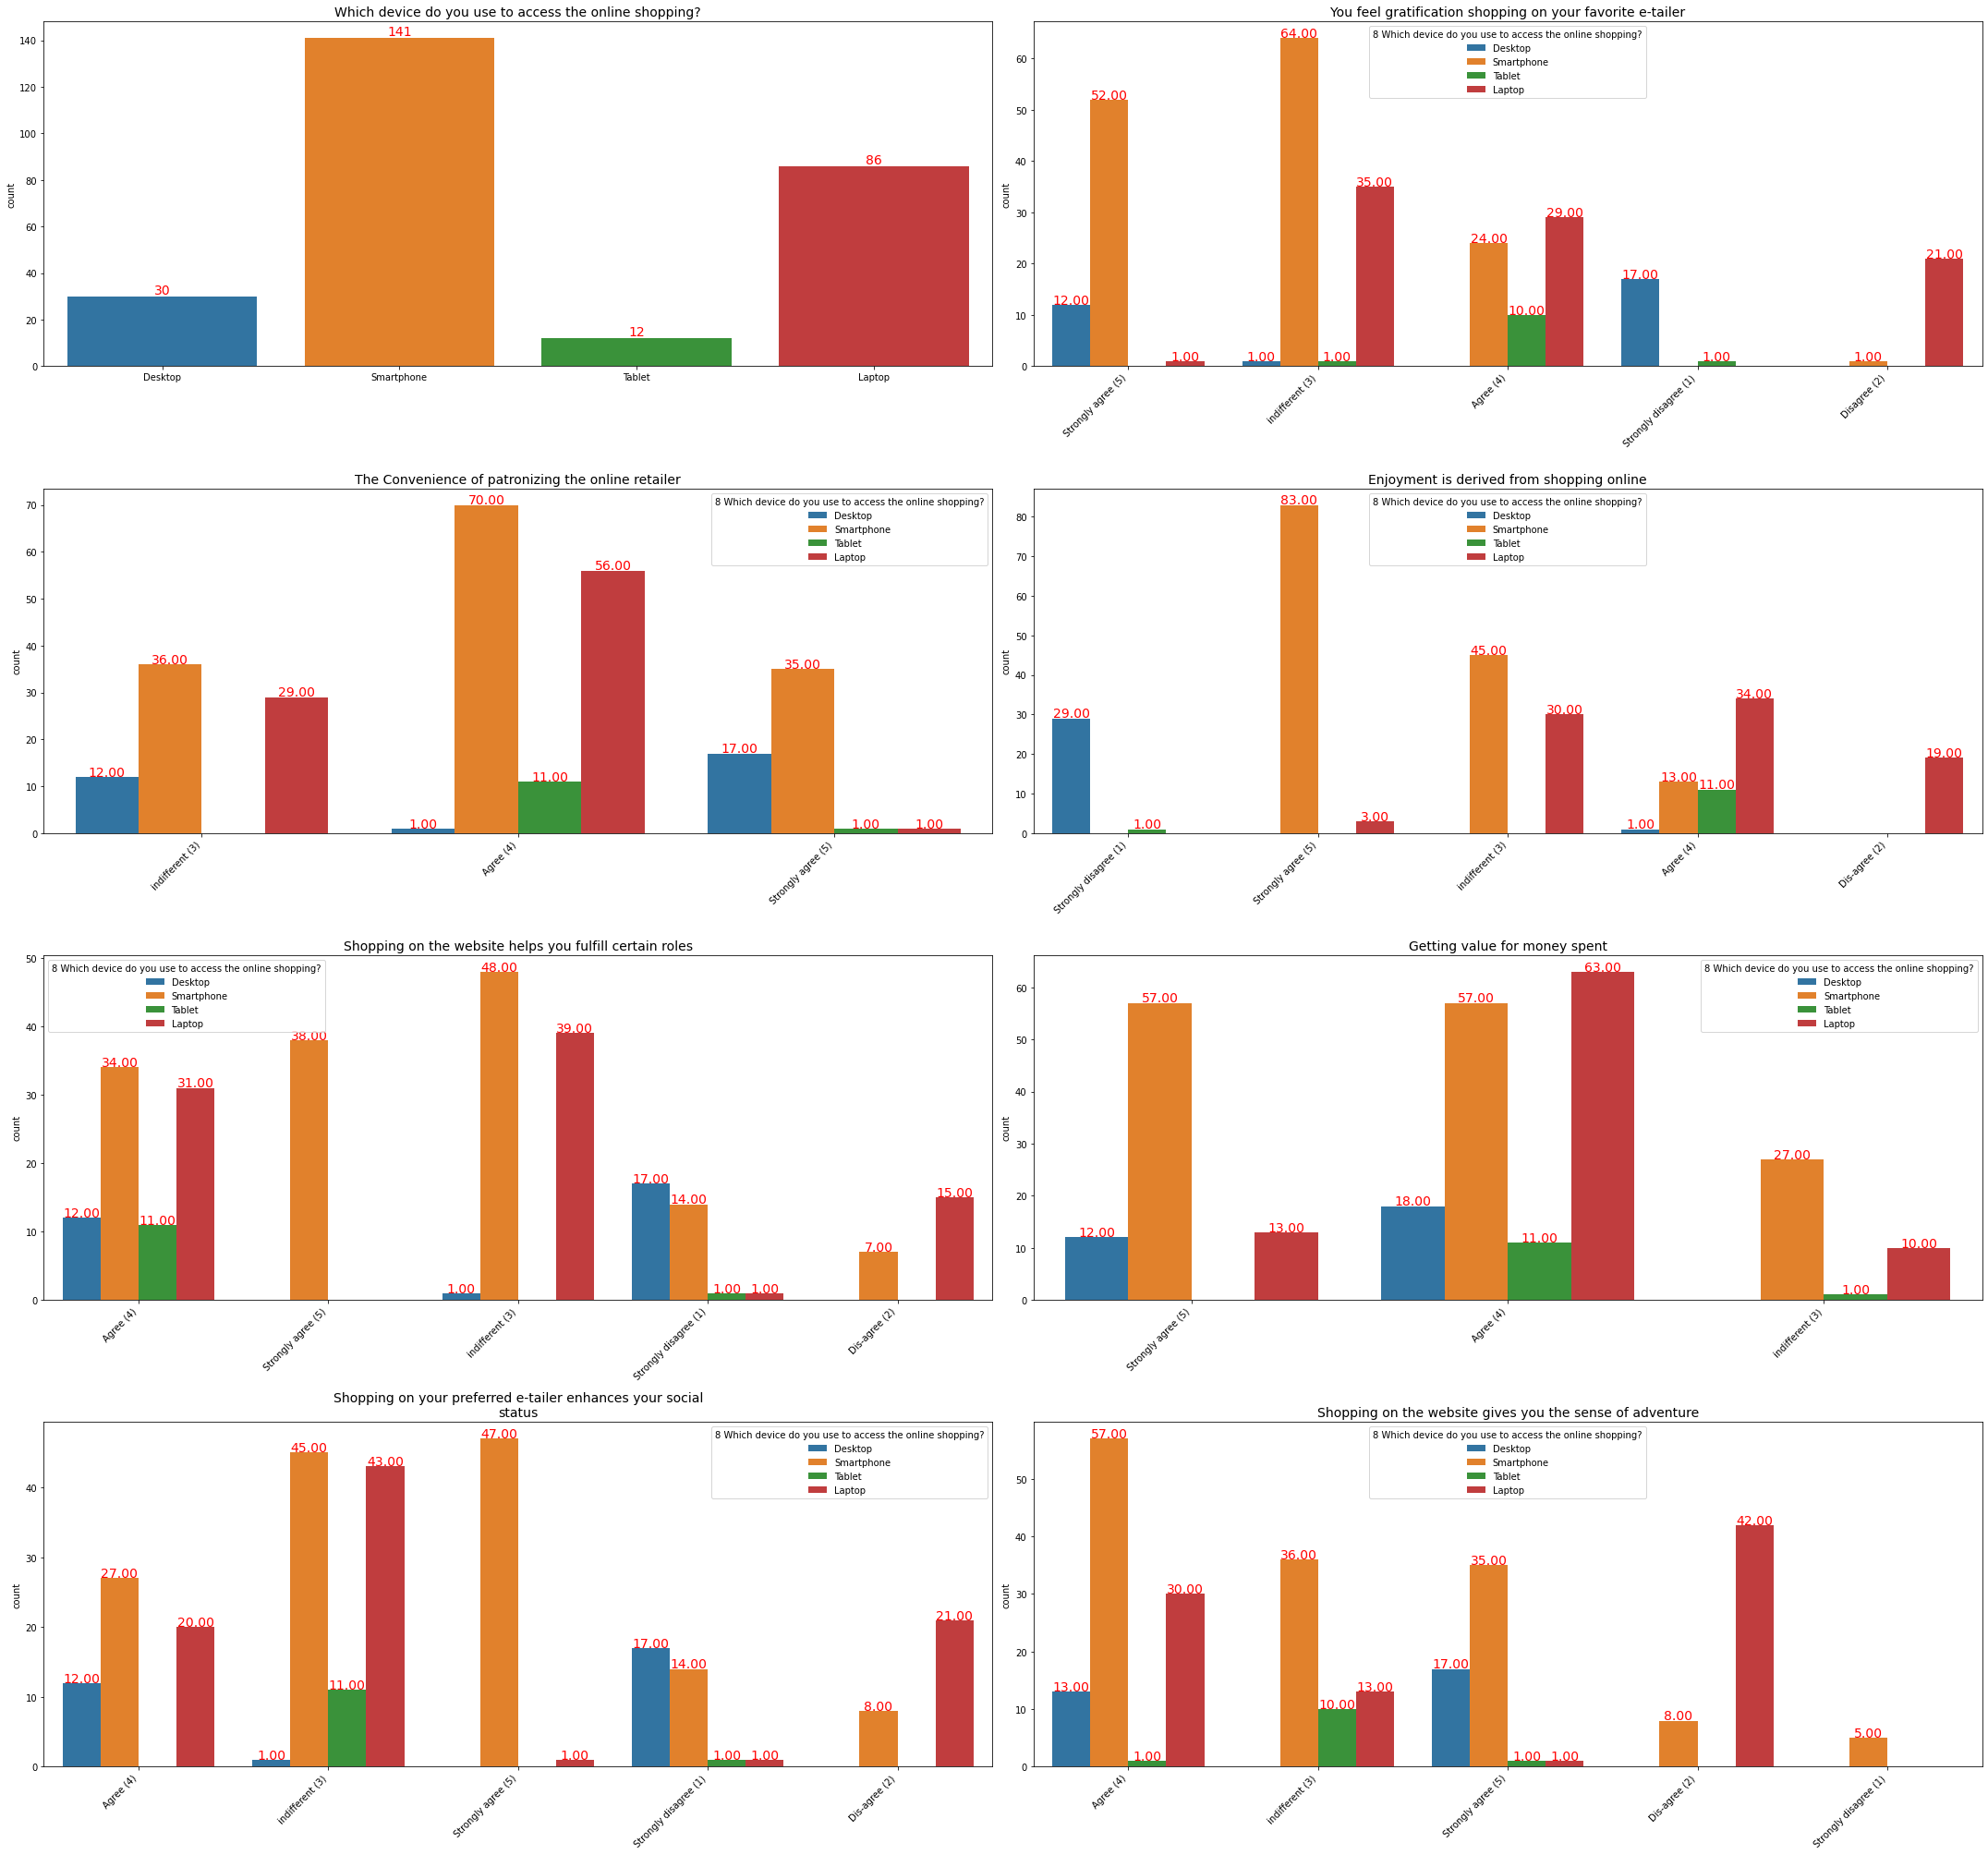

In [30]:
df_temp = df_factors.iloc[:,[6]].join(df_hend)
a = df_temp.columns[0]

plt.figure(figsize=(30,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of customers use smartphones to access the online shopping.
* Majority of desktop users disagree to feeling gratification shopping on their favourite e-tailer.
* Majority of smartphone users agree that enjoyment is derived from shopping online, while over 95% of desktop users disagree to the same.
* Majority of desktop users disagree that shopping on the website helps you fulfill certain roles whle majority of smartphone users agree to it.
* All desktop users believe that thtey get value for the money spent.
* Majority of Smartphone users and all desktop users believe that shopping on the website gives you the sense of adventure while laptop users disagree with that.

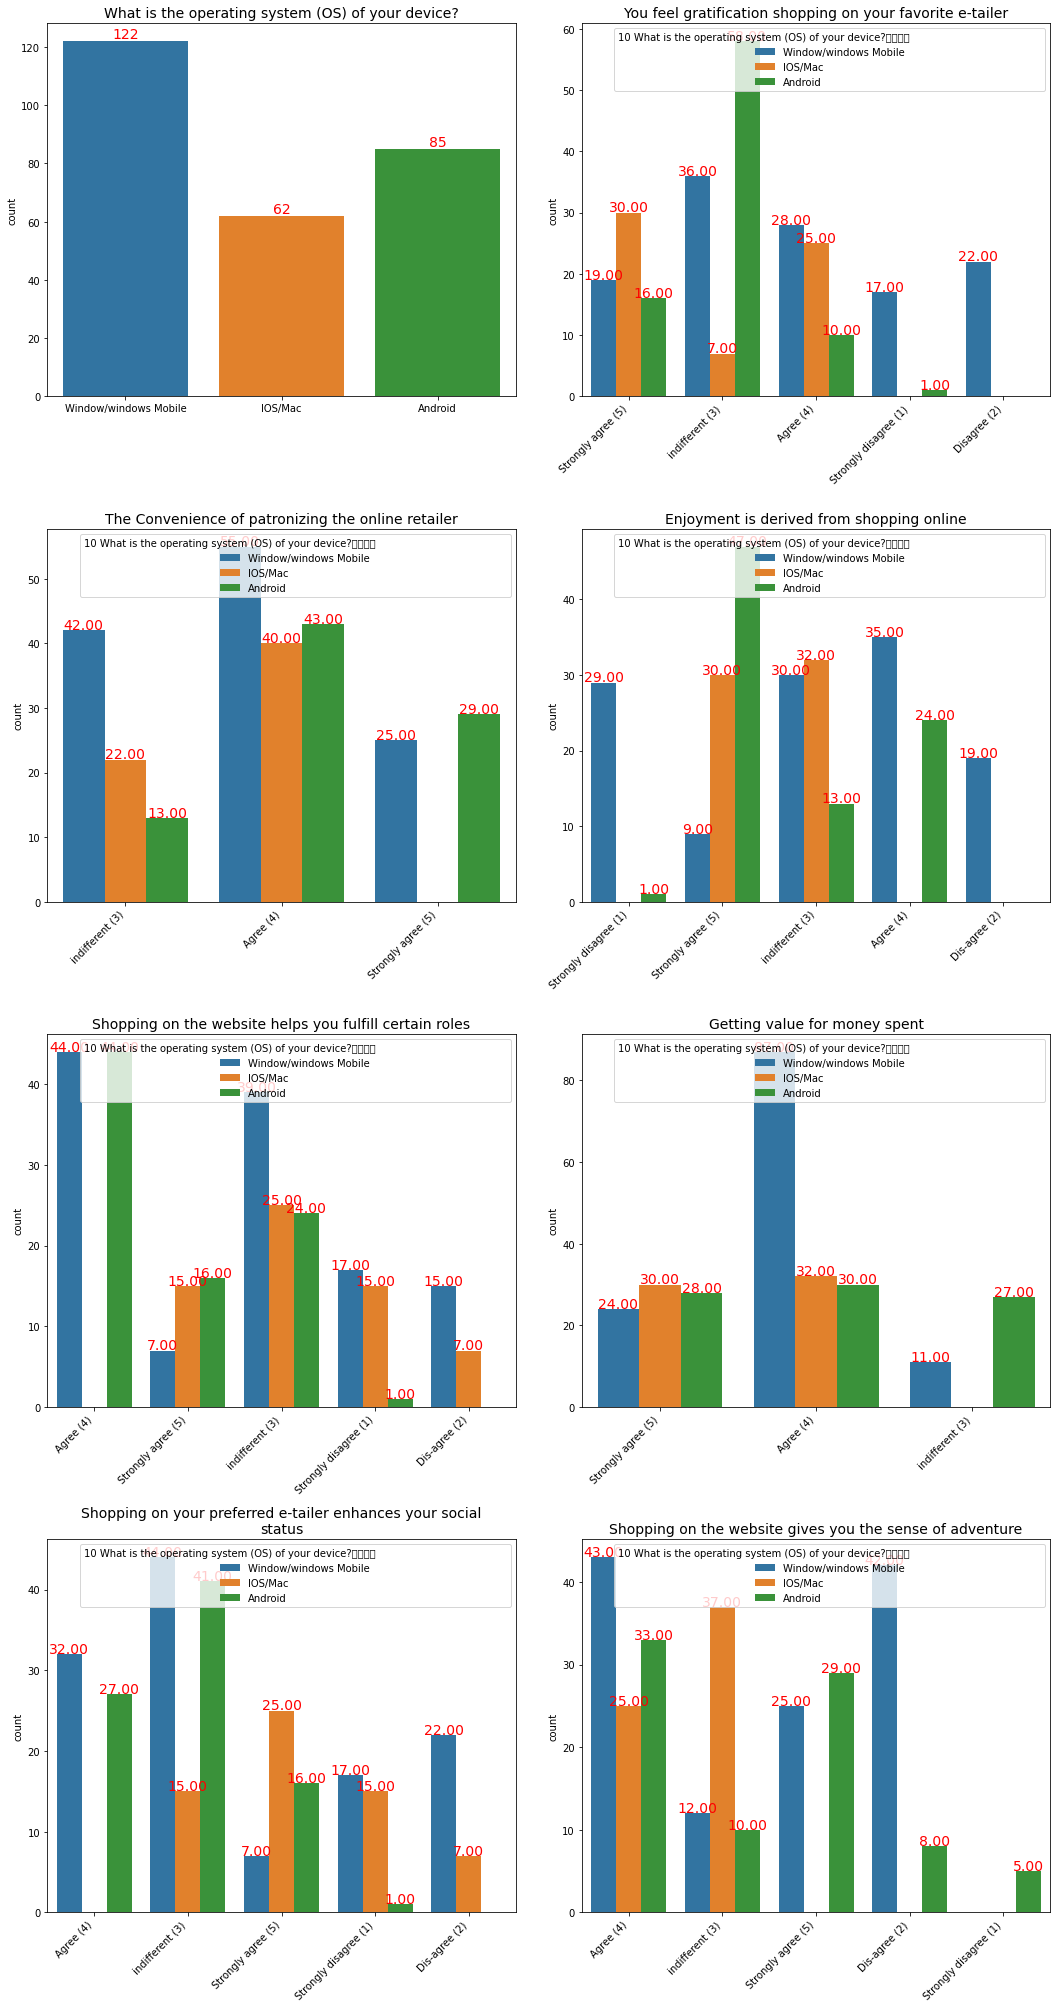

In [31]:
df_temp = df_factors.iloc[:,[8]].join(df_hend)
a = df_temp.columns[0]

plt.figure(figsize=(15,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of the customers have windows as operating system(OS) of their device.
* Majority of iOS/Mac users agree that they feel gratification shopping on their favourite e-tailer.
* Android users tend to derive enjoyment from shopping online as more than 84% of people responded 'Strongly agree' / 'Agree'  for the column 'Enjoyment is derived from shopping online'.
* Majority of android users agree that shopping helps them fulfill certain roles.
* All iOS/Mac users believe they get value for the money spent whilst shopping online.  
* Majority of Android users  think that shopping on their preferred e-tailer enhance their social status.
* No iOS/Mac user disagrees to shopping on websites gives a sense of adventure. 

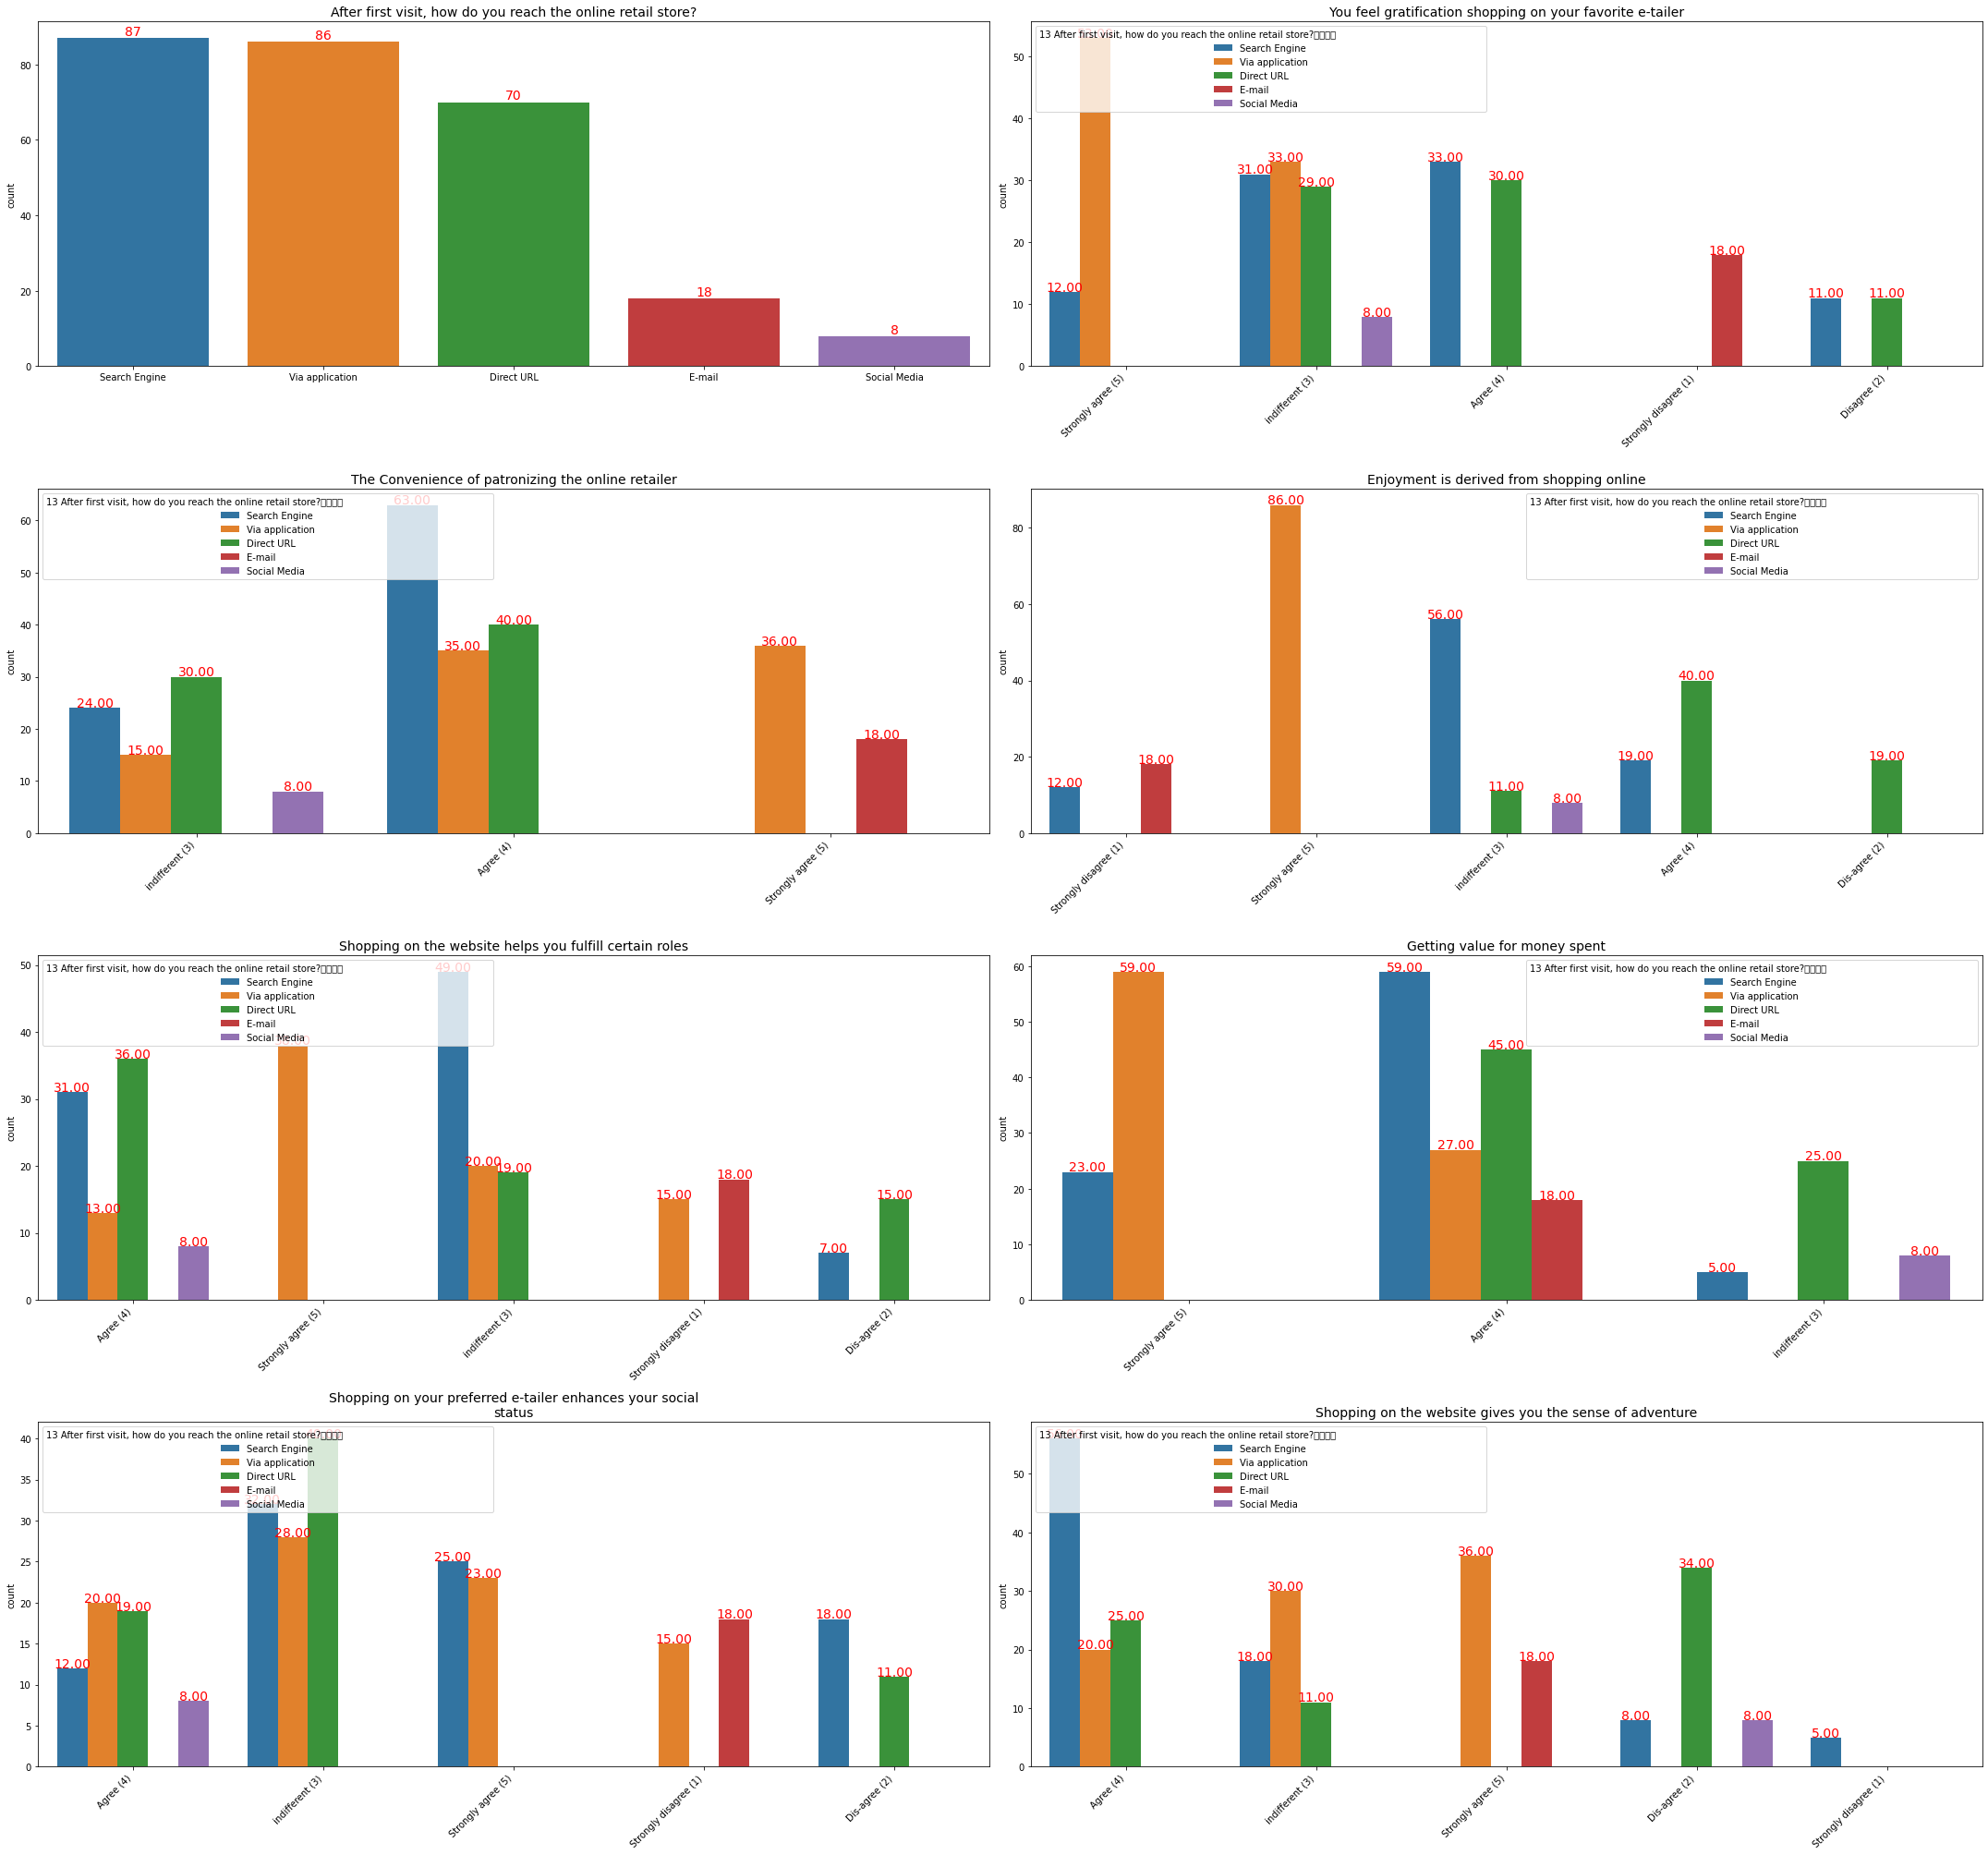

In [32]:
df_temp = df_factors.iloc[:,[9]].join(df_hend)
a = df_temp.columns[0]

plt.figure(figsize=(30,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of customers reached the online store via Search Engine and via application.
* Majority of customers who reached the online store via application agree that they feel gratification shopping online while all customers who reached the online store via email disagree that they feel gratification shopping.
* Majority of customers who reached the online store via search engine and all customers who reached the online store via application agree that they derive  enjoyment shopping online while all customers who reached the online store via email disagree that they derive  enjoyment shopping.
* Majority of customers who reached the online store via Search Engine and all customers who reached the online store via application agree that they get the value for money spent.
* Majority of customers who reached the online store via Search Engine/ application and all customers who reached the online store via email agree that shopping online gives them a sense of adventure.

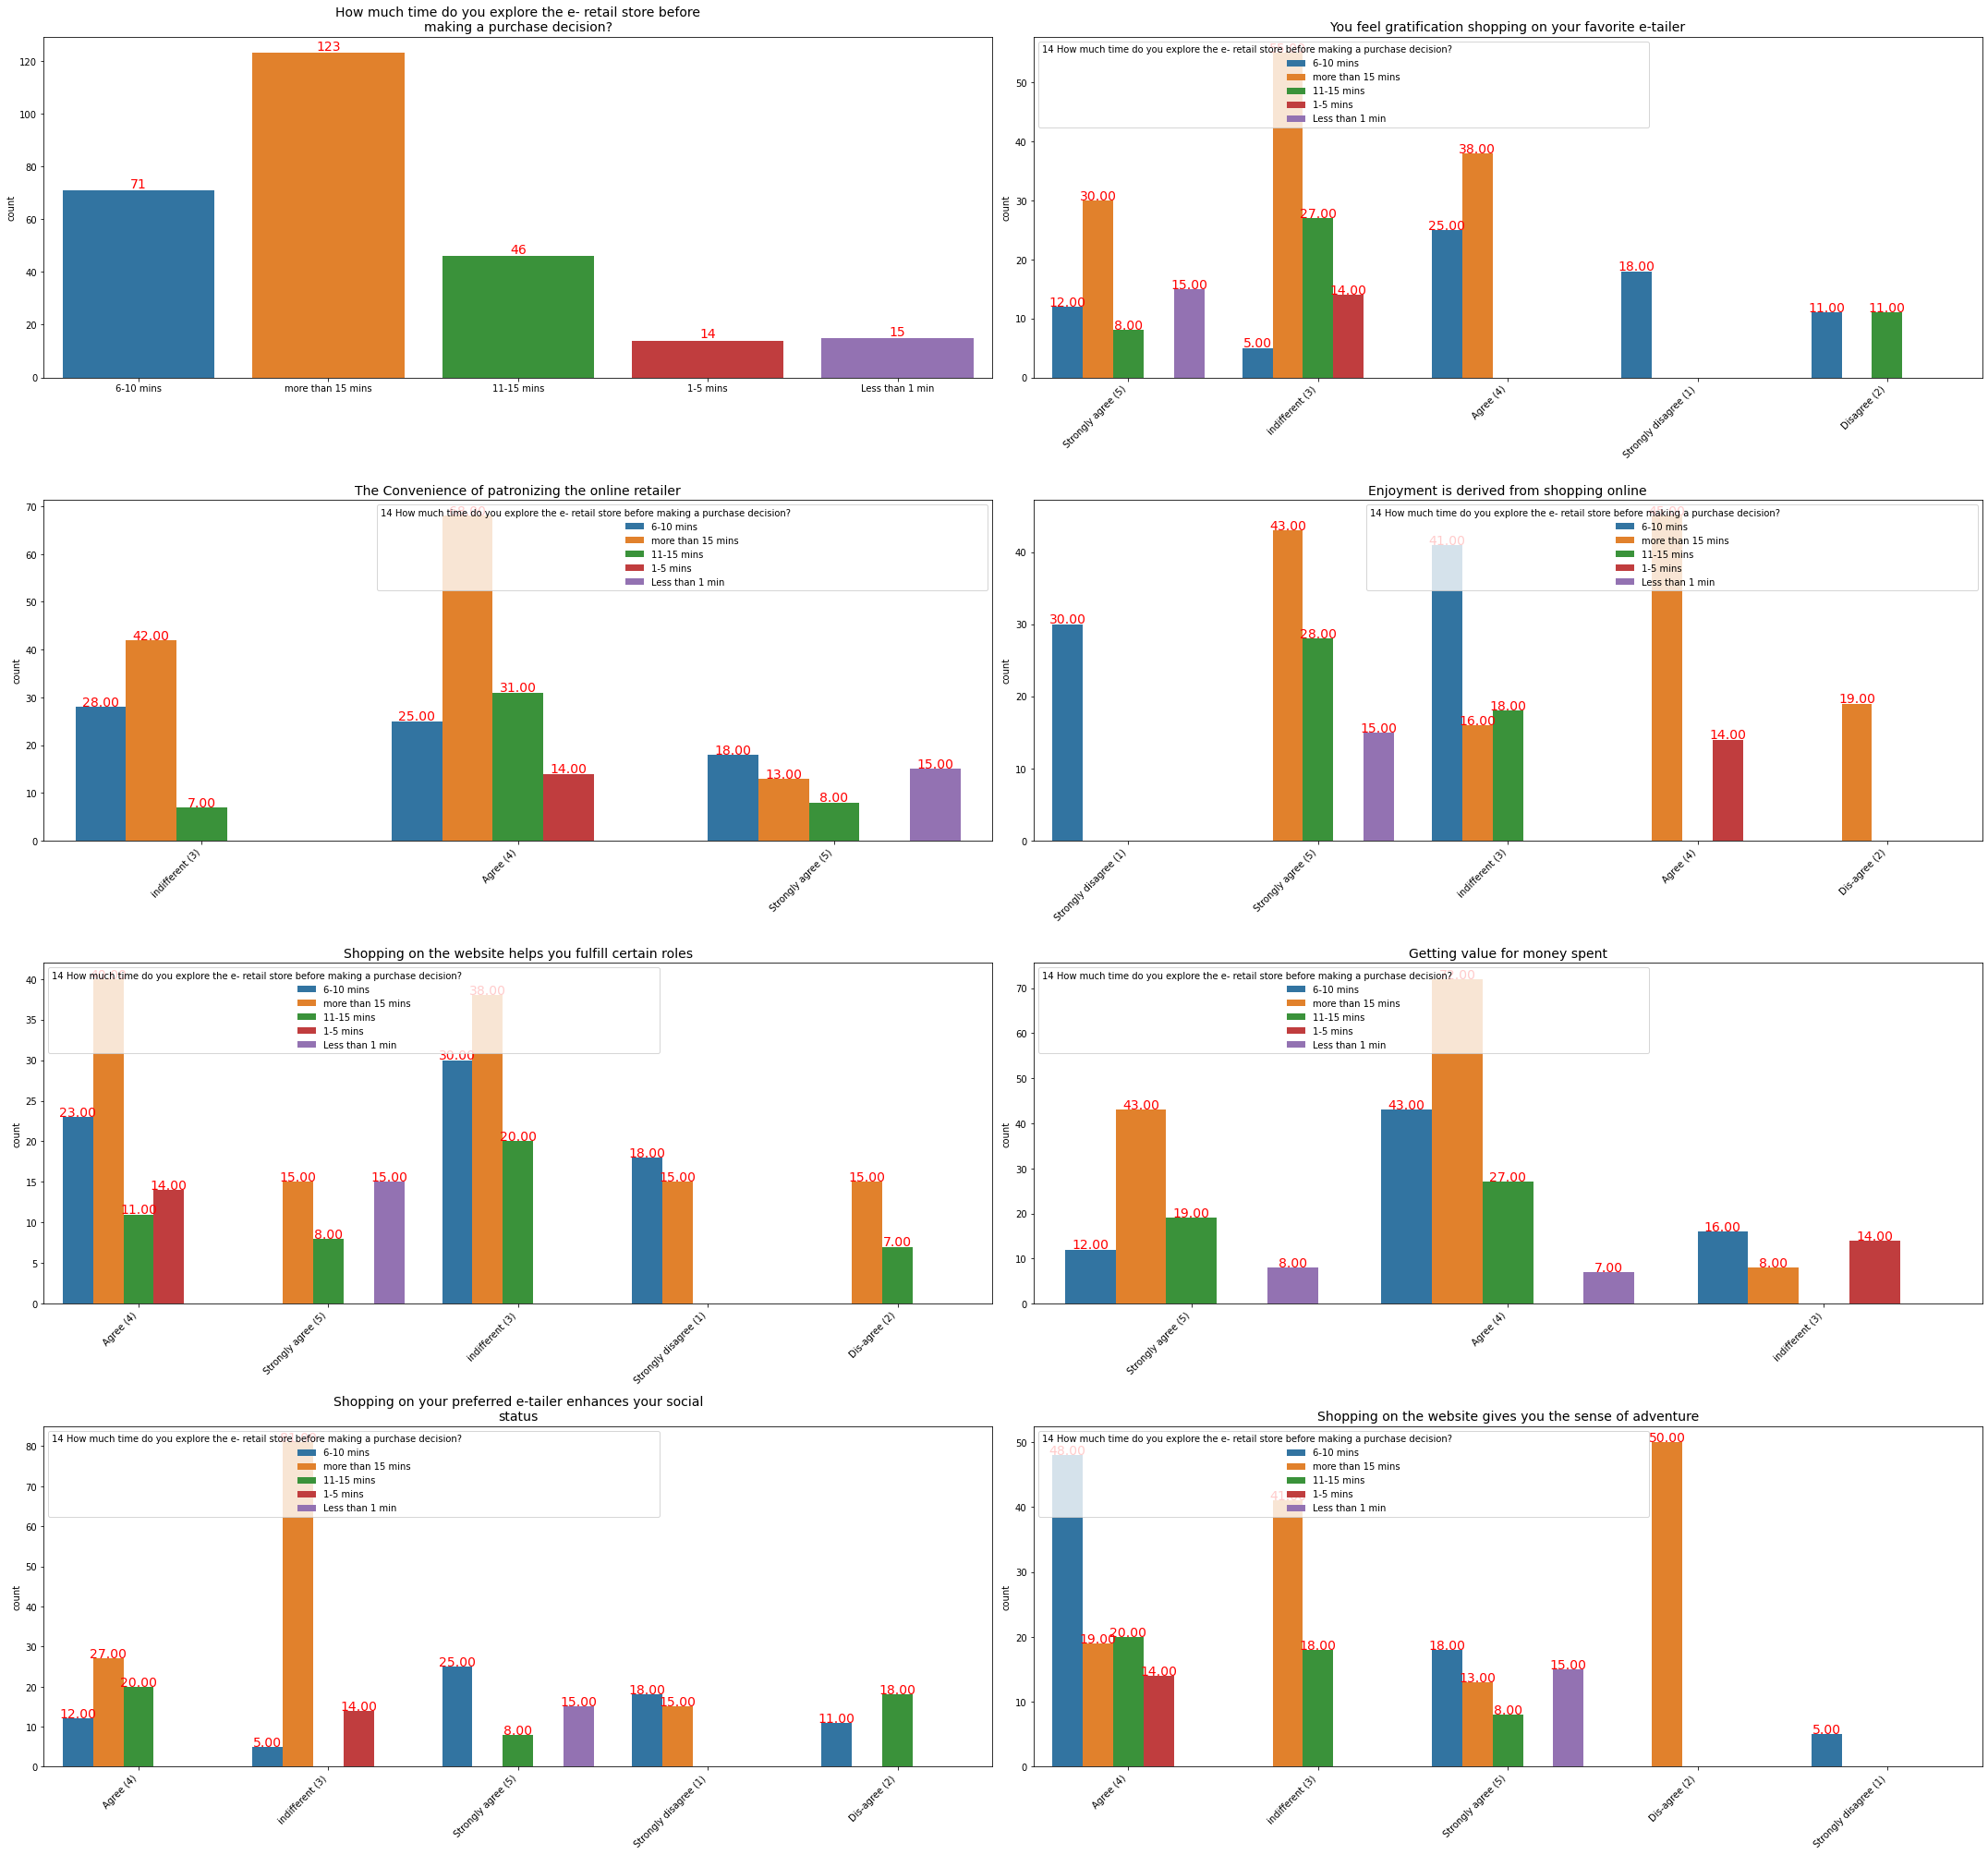

In [33]:
df_temp = df_factors.iloc[:,[10]].join(df_hend)
a = df_temp.columns[0]

plt.figure(figsize=(30,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[a])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of people spend more than 15 minutes before making a purchasing decision.
* All customers who spend less than 1 minute get gratification shopping on their favourite retailer while customers who spend more than 15 minutes do not disagree to getting gratification.
* Customers who spend more time tend not to derive enjoyment from shopping online.
* Customers who spend more time tend to disagree that shopping on the website helps you fulfill certain roles .
* Majority of customers who reach the online store via application agree that shopping helps them fulfill certain roles while customers who reach the online store via email do not agree that shopping helps them fulfill certain roles.
* People who shop for less amount of less time tend to agree that they get a sense of adventure from shopping online.

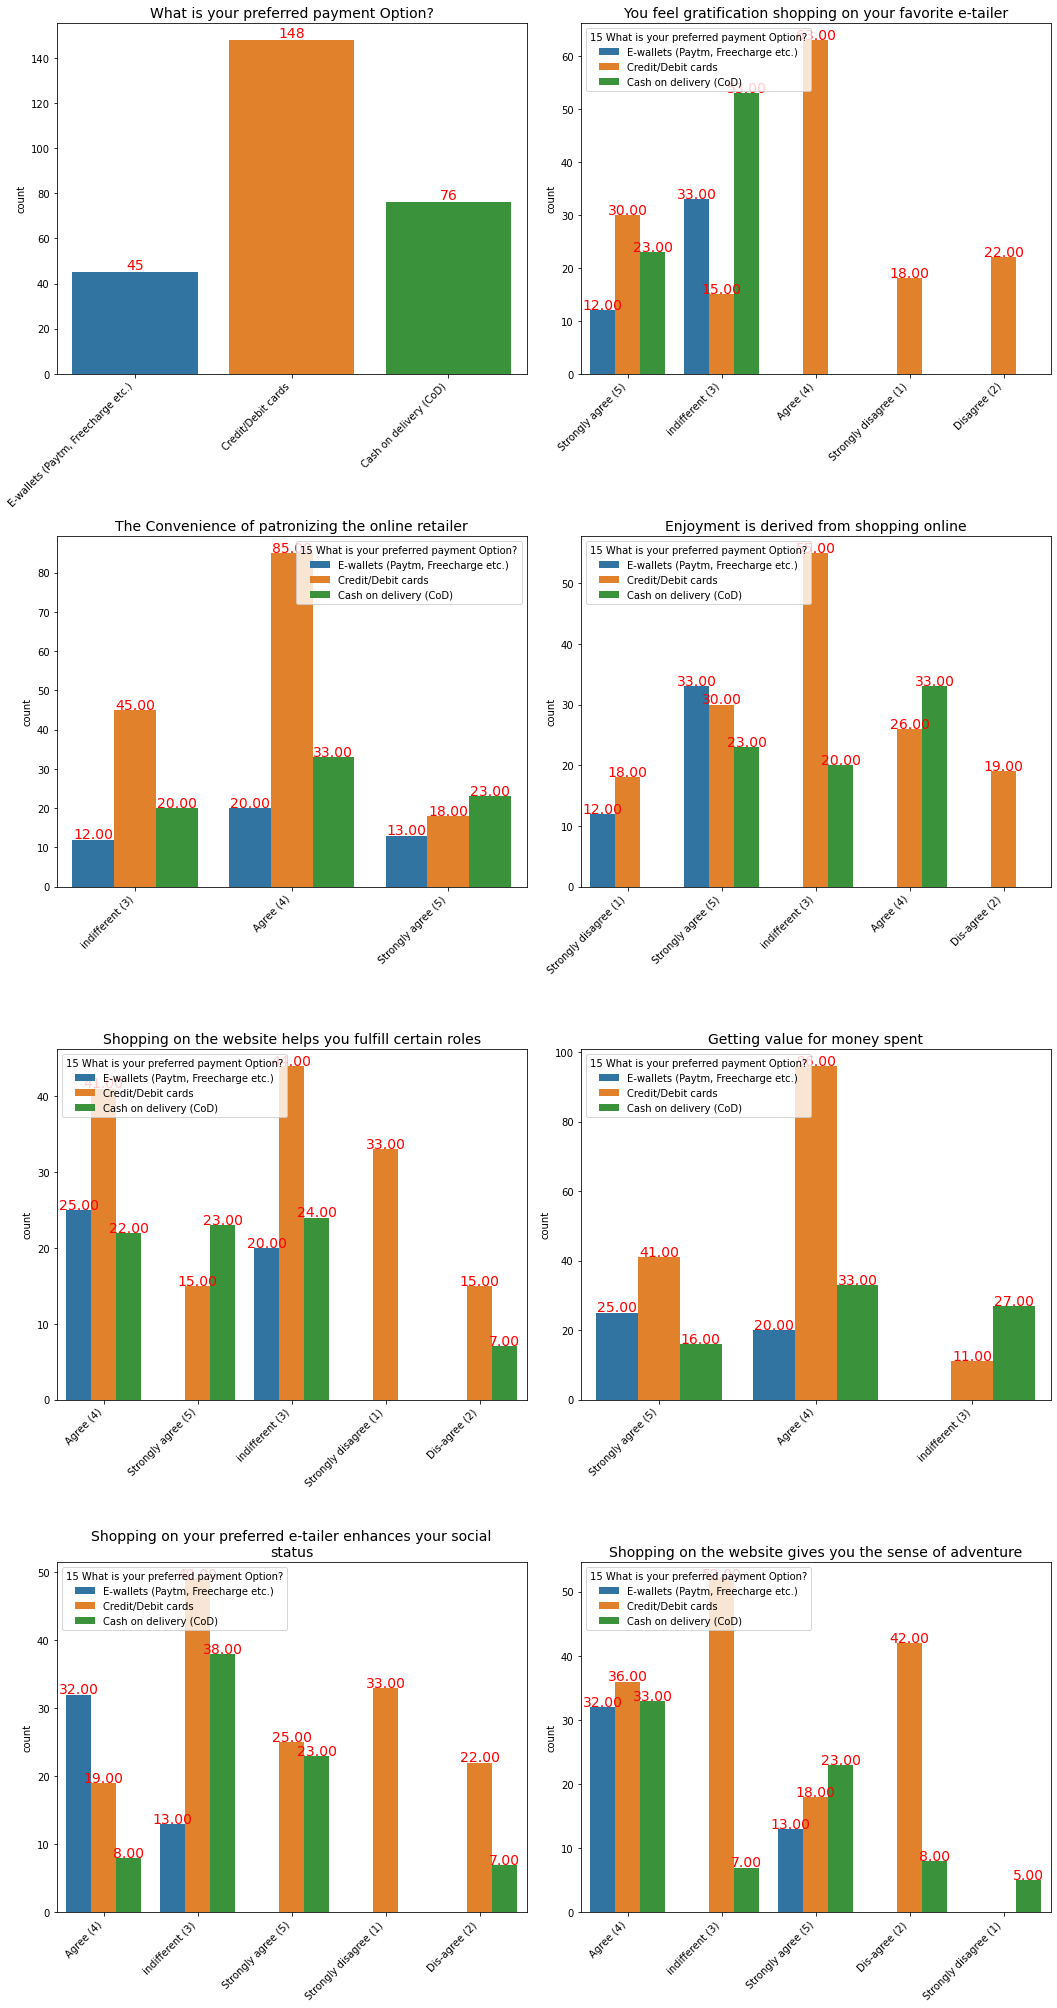

In [40]:
df_temp = df_factors.iloc[:,[11]].join(df_hend)
a = df_temp.columns[0]
df_temp.rename(columns={a:a.strip()},inplace=True)
b = df_temp.columns[0]
plt.figure(figsize=(15,28))

plt.subplot(4,2,1)
ax = sns.countplot(df_temp[b])
ax.set_title('\n'.join(wrap(col_c[col.index(a)],60)), fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

j=2
for i in range(7):
    plt.subplot(4,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[b])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of peopke prefer to pay using Credit cards and Debit cards.
* No customer who has paid through Cash on delivery or E-wallets disagrees to feeling gratification shopping on their favourite e-tailer.
* No customer who has paid through Cash on delivery disagrees to deriving enjoyment from shopping online and majority of them agree to it.
* Majority of people who disagree to the above two had paid through credit cards/ debit cards.
* Majority of people who disagree to shopping on the website helps you fulfill certain roles pay through credit cards/ debit cards.
* All people who paid through e-wallets get value for money spent.
* Majority of people who disagree to shopping on their preferred e-tailer enhances their social status pay through credit cards/ debit cards.
* Majority of people who disagree to shopping on the website gives you the sense of adventure pay through credit cards/ debit cards while all e-wallet user agrees to that.

## UTILITARIAN VALUES

In [76]:
t_cols = list(df_util.columns)
t_cols

['19 Information on similar product to the one highlighted  is important for product comparison',
 '39 Offering a wide variety of listed product in several category',
 '32 Shopping online is convenient and flexible',
 '18 The content on the website must be easy to read and understand',
 '22 Ease of navigation in website',
 '23 Loading and processing speed',
 '24 User friendly Interface of the website',
 '25 Convenient Payment methods',
 '20 Complete information on listed seller and product being offered is important for purchase decision.',
 '21 All relevant information on listed products must be stated clearly',
 '40 Provision of complete and relevant product information',
 '30 Online shopping gives monetary benefit and discounts',
 '41 Monetary savings']

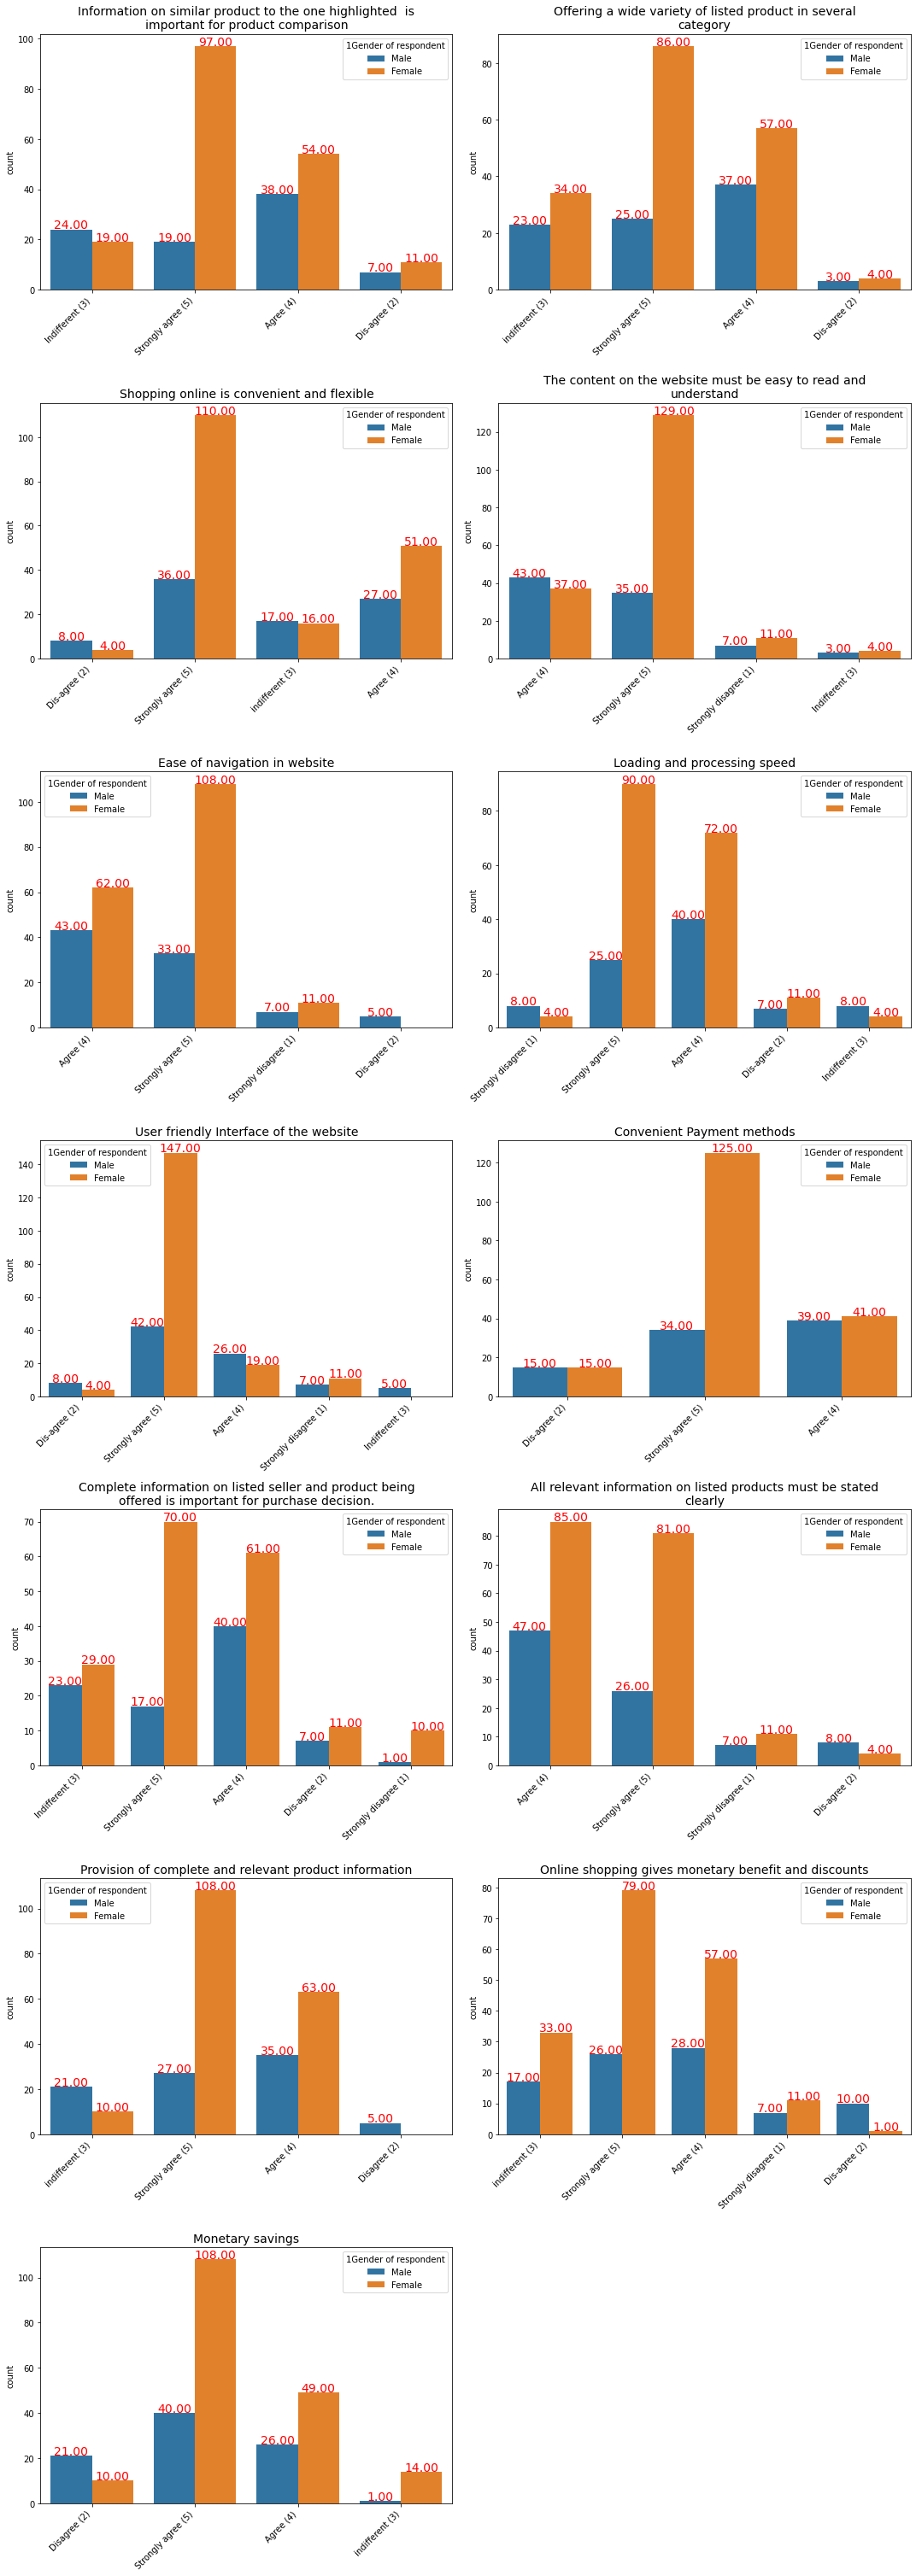

In [88]:
df_temp = df_factors.iloc[:,[0]].join(df_util)
a = df_temp.columns[0]

plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Women tend to be more in agreement to Information on similar product to the one highlighted  is important for product comparison than men.
* Women are more in agreement to offering a wide variety of listed product in several category than men.
* Women tend to agree to factors that improve the convenience of usage and shopping like Shopping online is Convenient anfd flexible, Ease of navigation in website, Loading and processing speed, User friendly Interface of the website, Convenient Payment methods.
* Women tend to be more in agreement for Provision of complete and relevant product information than men.
* Majority of customers who disagree to online shopping having monetary benefits are men.

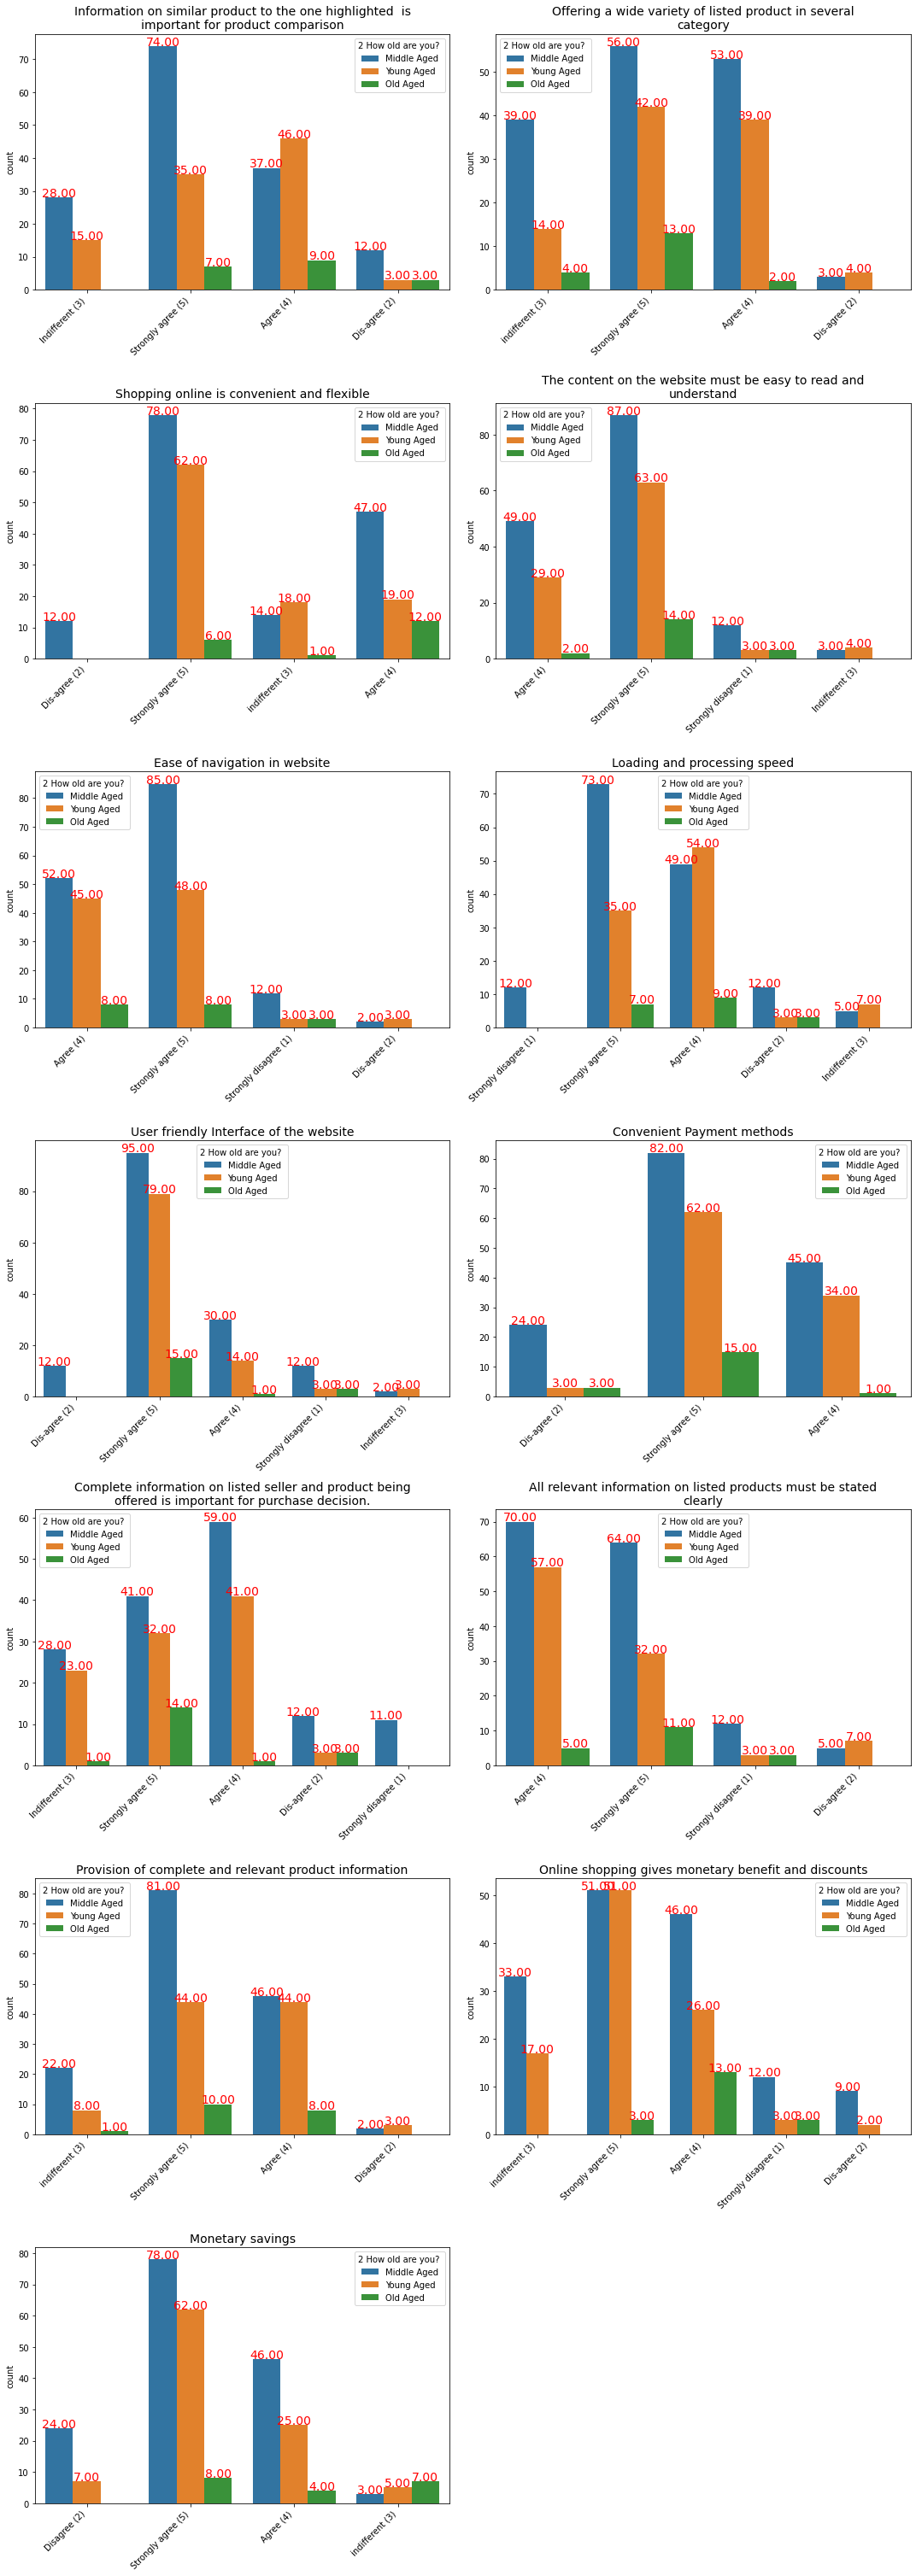

In [89]:
df_temp = df_factors.iloc[:,[1]].join(df_util)
a = df_temp.columns[0]
# Generalizing the age groups
df_temp['2 How old are you? '].replace('31-40 years', 'Middle Aged', inplace = True)
df_temp['2 How old are you? '].replace('41-50 yaers', 'Middle Aged', inplace = True)
df_temp['2 How old are you? '].replace('21-30 years', 'Young Aged', inplace = True)
df_temp['2 How old are you? '].replace('Less than 20 years', 'Young Aged', inplace = True)
df_temp['2 How old are you? '].replace('51 years and above', 'Old Aged', inplace = True)
plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Middle aged people tend to disagree more compared to other age groups to online shops giving monetary benefits and savings.
* The people who disagree to shopping online being convenient and flexible are Middle aged people.
* Among other utilitarian values the ratios are split similarly among the age groups.

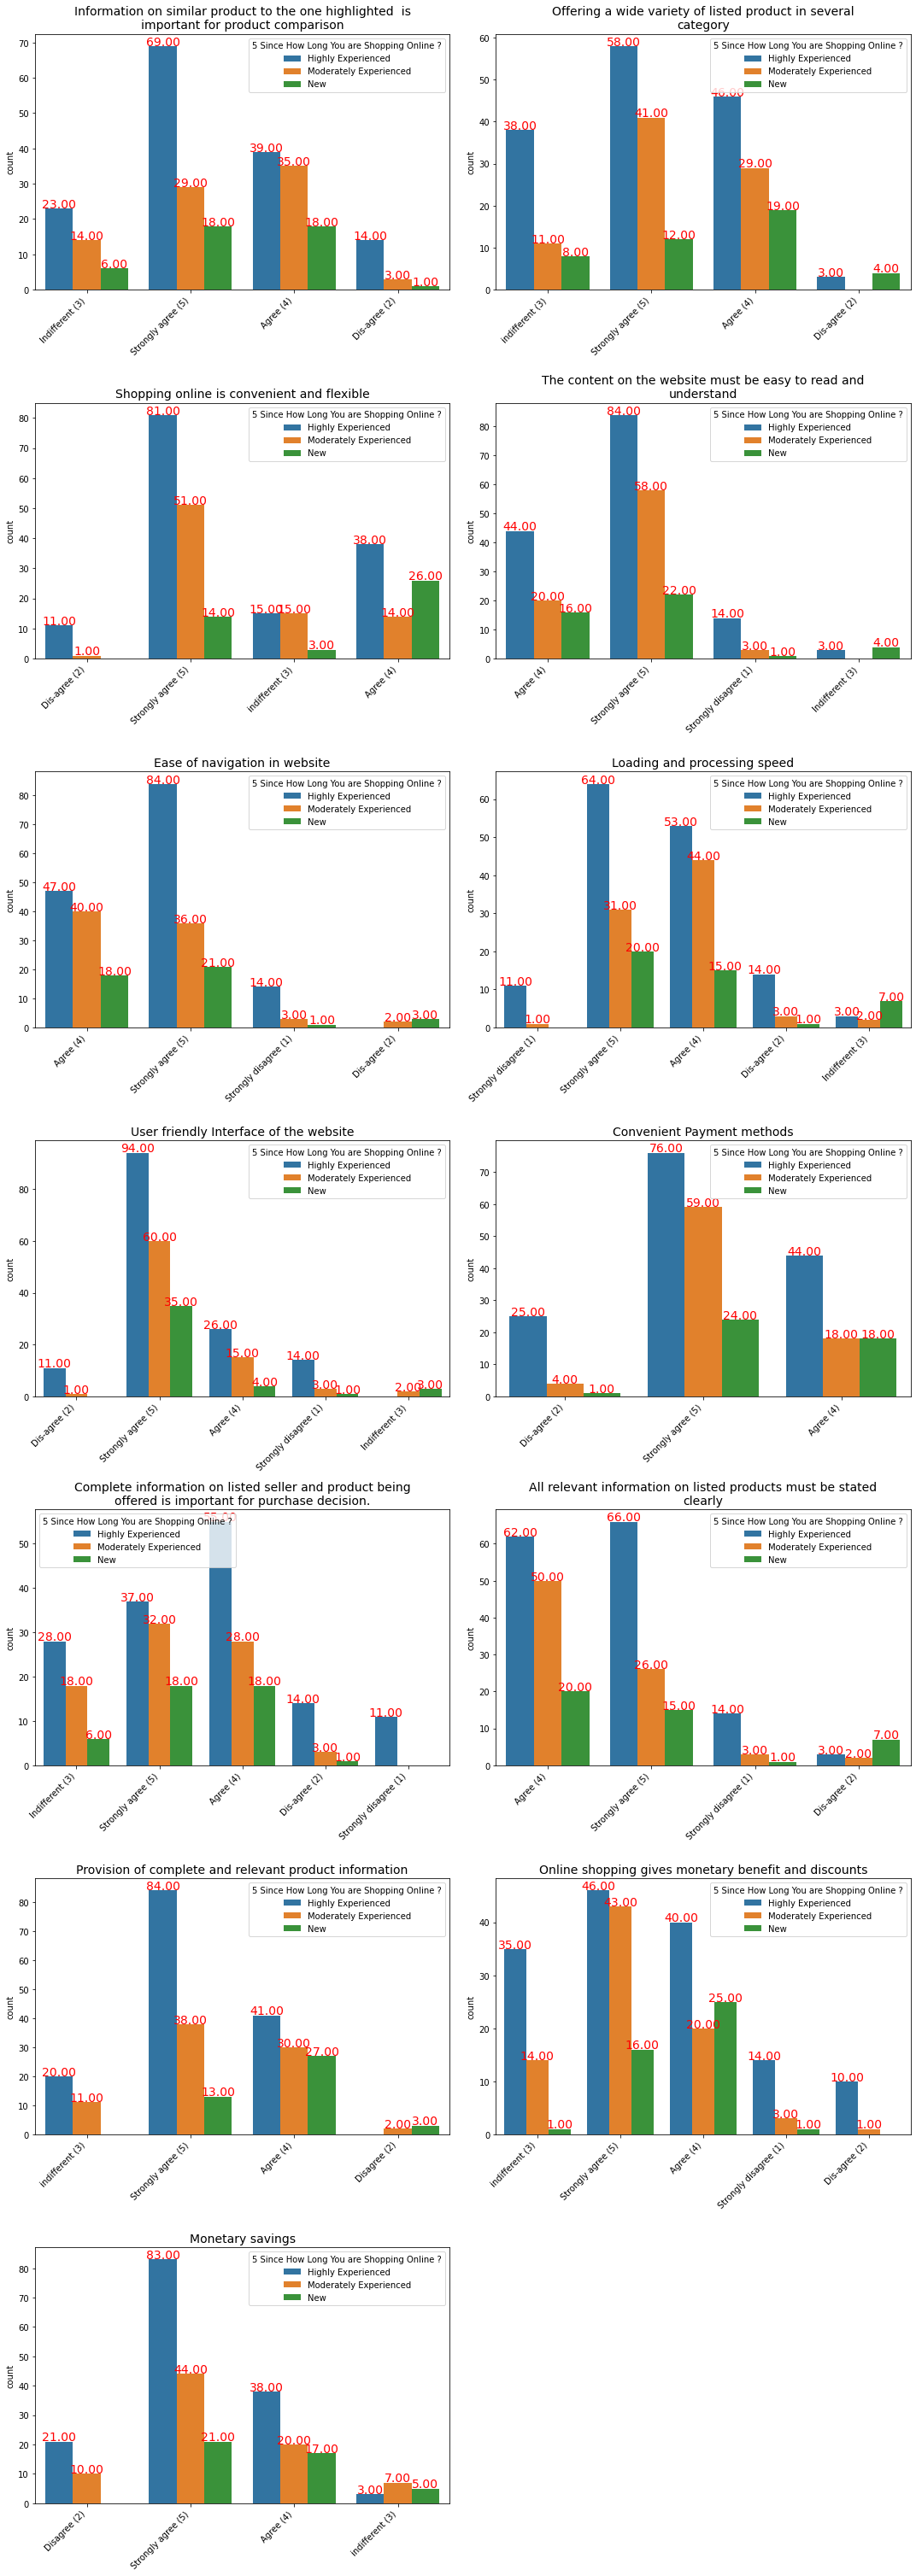

In [90]:
df_temp = df_factors.iloc[:,[3]].join(df_util)
a = df_temp.columns[0]
df_temp['5 Since How Long You are Shopping Online ?'].replace('Above 4 years', 'Highly Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('3-4 years', 'Highly Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('1-2 years', 'Moderately Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('2-3 years', 'Moderately Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('Less than 1 year', 'New', inplace = True)
plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* The ratios are split similarly among the different types of customers() for all utilitarian values.

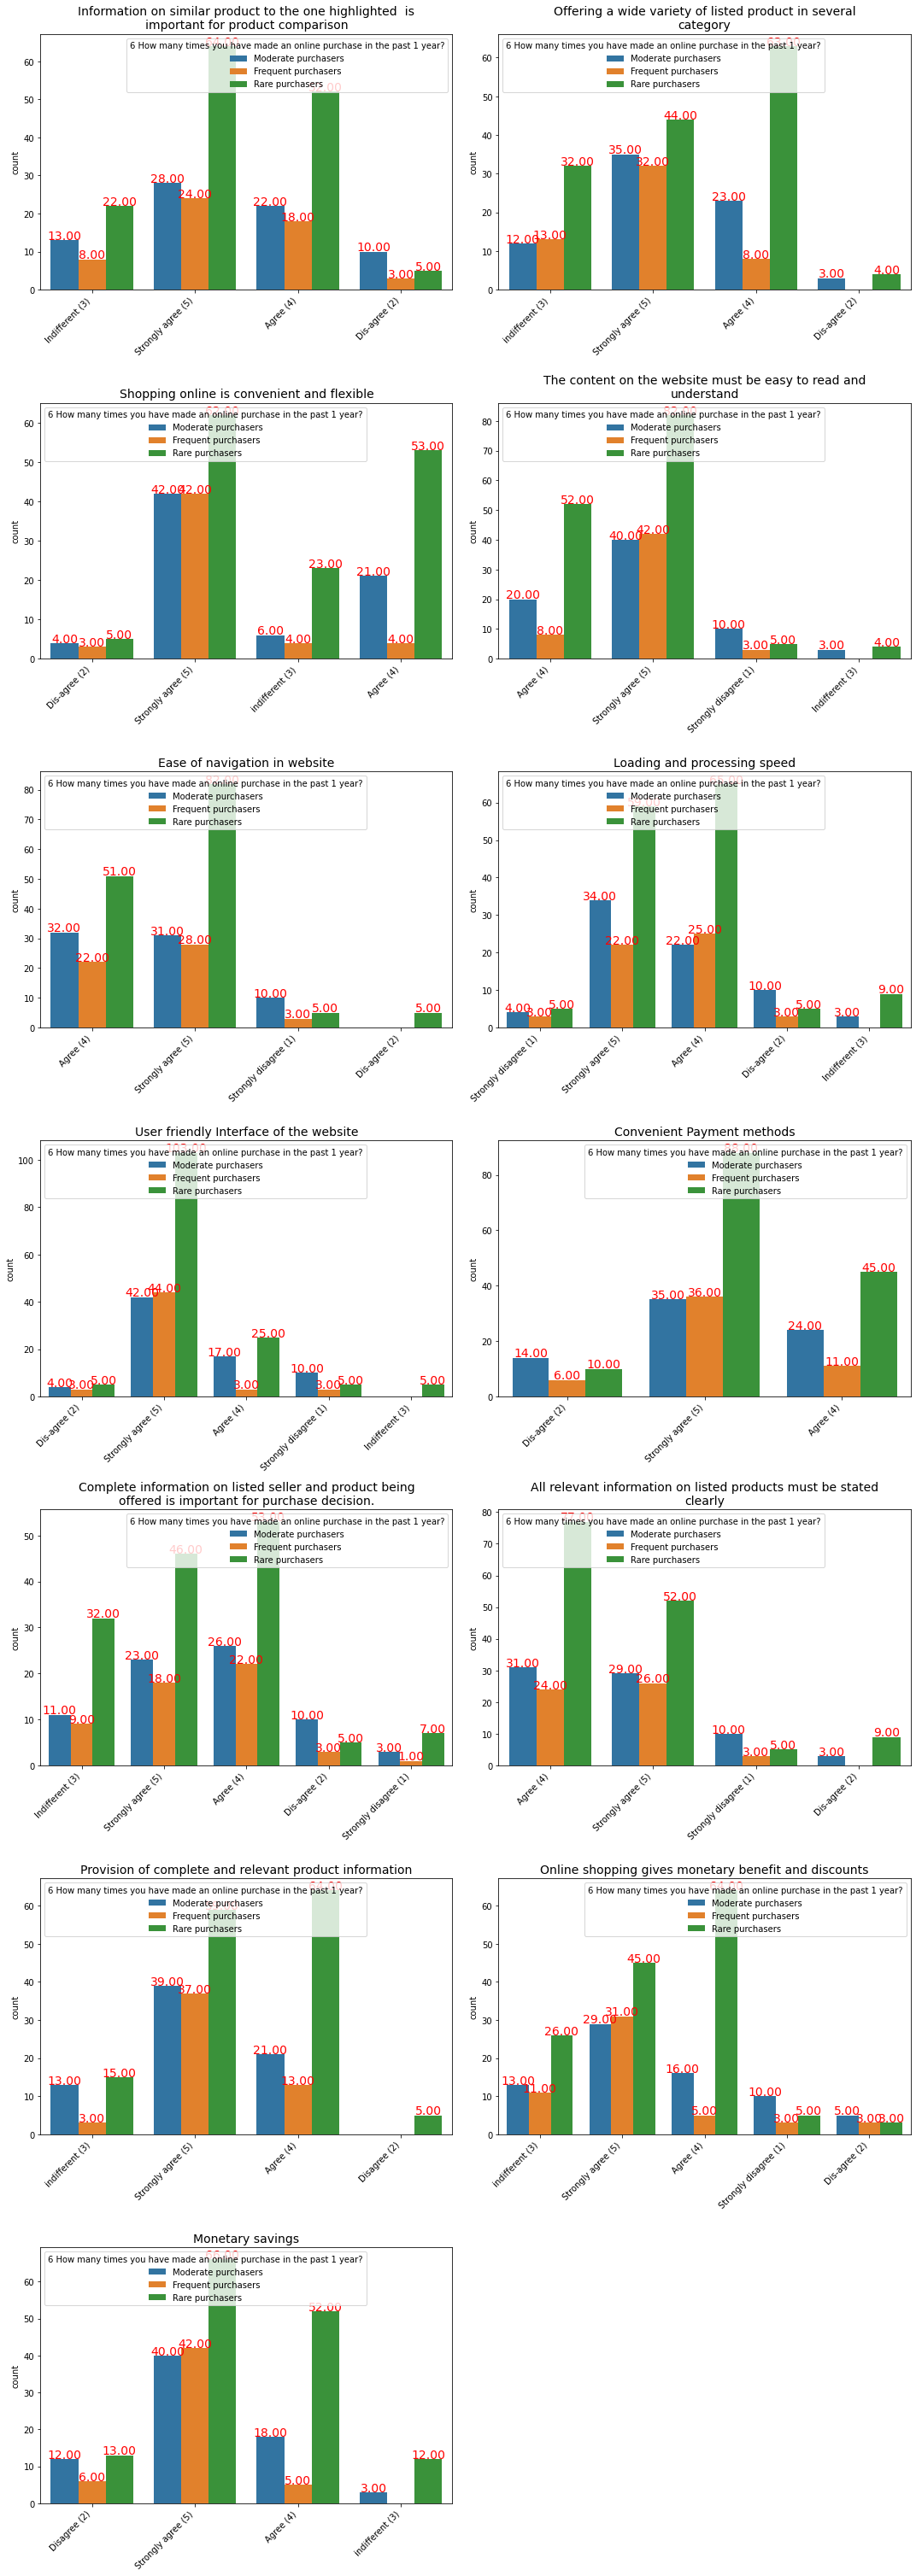

In [91]:
df_temp = df_factors.iloc[:,[4]].join(df_util)
a = df_temp.columns[0]

#Generalising Frequency of purchases
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('Less than 10 times', 'Rare purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('11-20 times', 'Rare purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('21-30 times', 'Moderate purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('31-40 times', 'Moderate purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('42 times and above', 'Frequent purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('41 times and above', 'Frequent purchasers', inplace = True)

plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Most people who disagree with factors enhancing convenience are moderate purchasers.
* Most people who disagree with factors relating to monetary savings and benefits are moderate purchasers.
* The ratios are split similarly among the different types of customers for all the other utilitarian values.

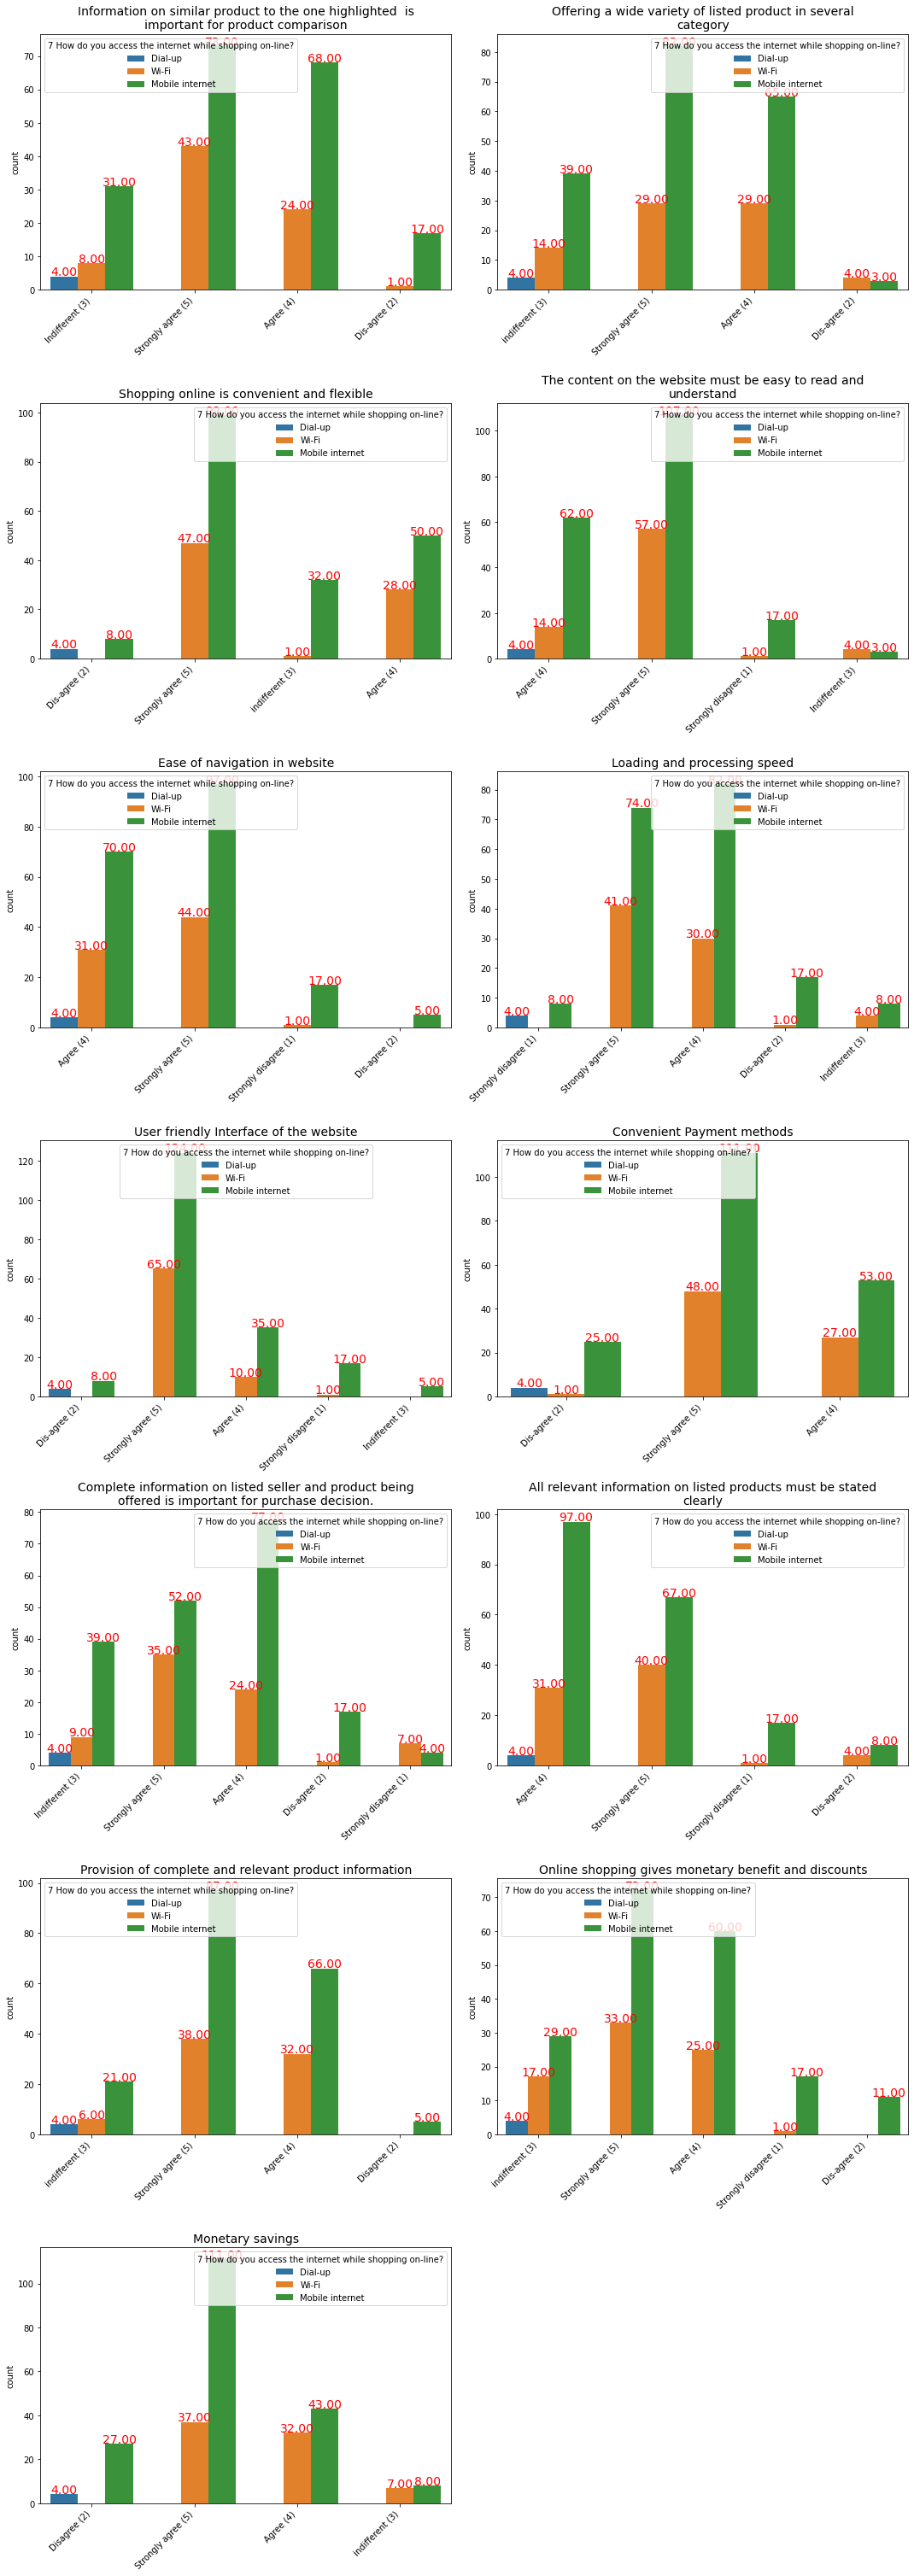

In [92]:
df_temp = df_factors.iloc[:,[5]].join(df_util)
a = df_temp.columns[0]

plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* The ratios are split similarly among the Wifi users and mobile internet users across categories for all utilitarian values.

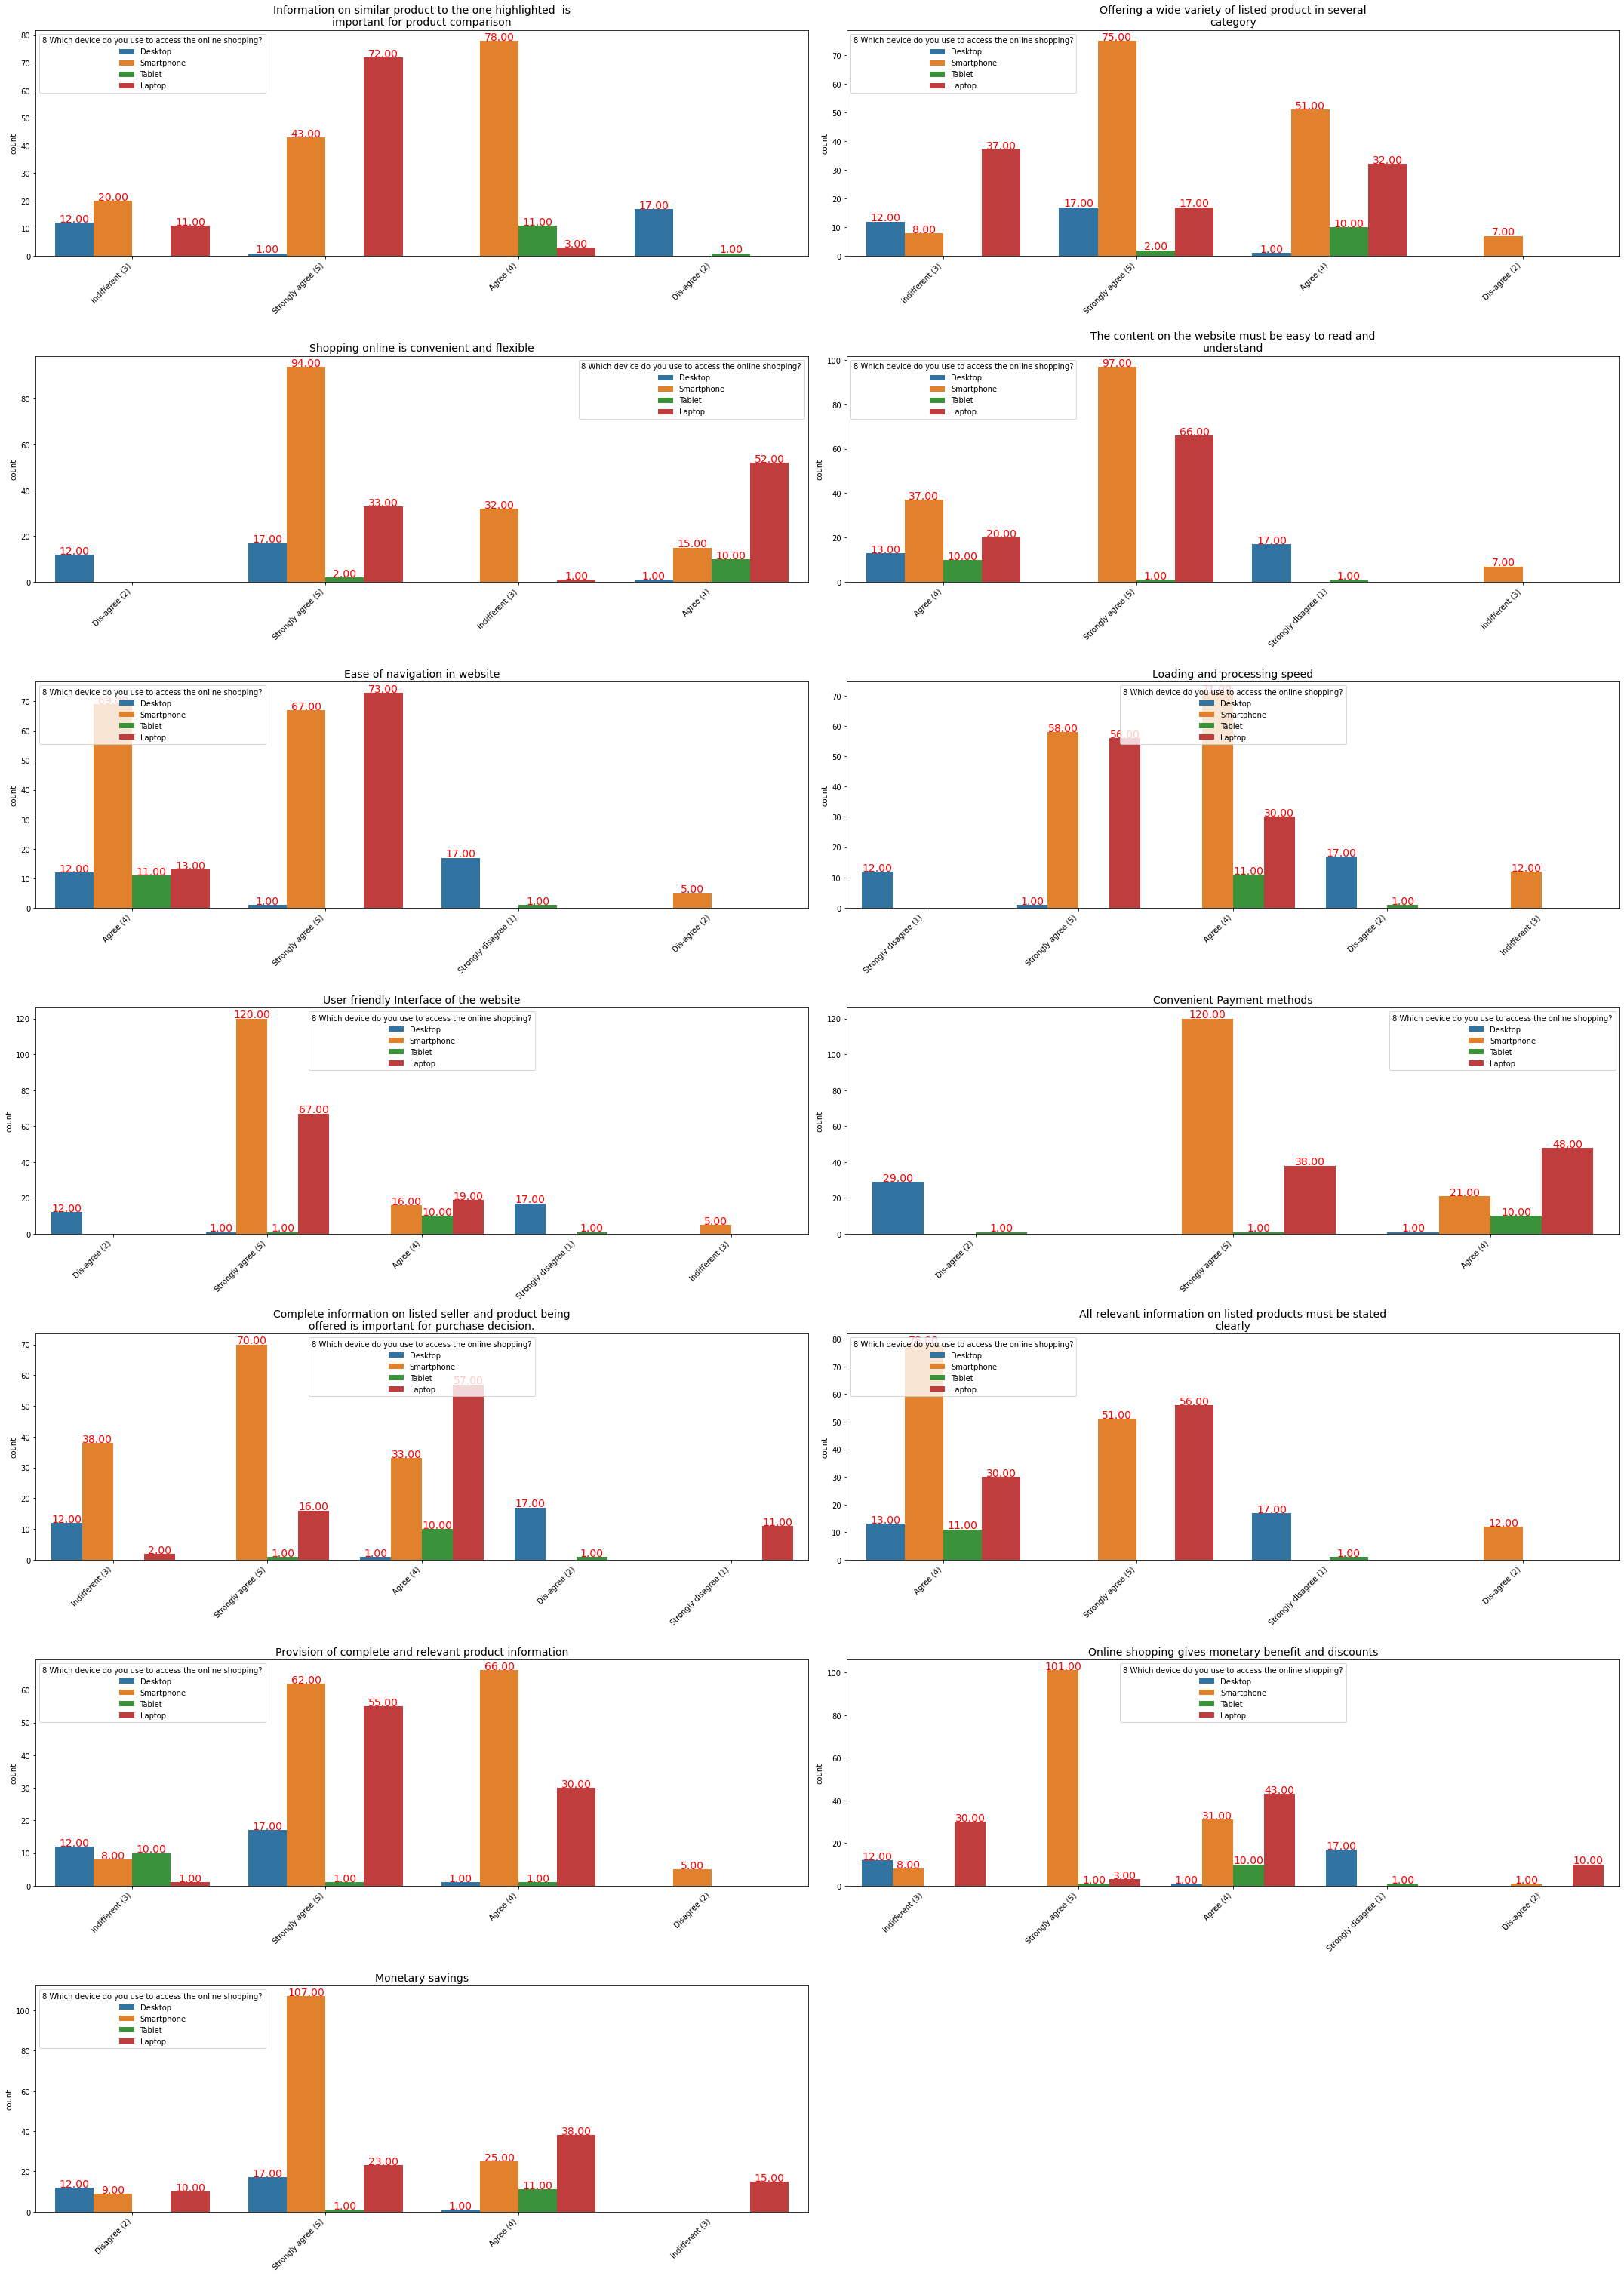

In [93]:
df_temp = df_factors.iloc[:,[6]].join(df_util)
a = df_temp.columns[0]

plt.figure(figsize=(30,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of desktop users tend to be in disagreement to Information on similar product to the one highlighted  is important for product comparison.
* Most people who disagree with factors enhancing convenience are desktop users.
* Majority of desktop users tend to disagree to online shopping gives monetary benefit and discounts.

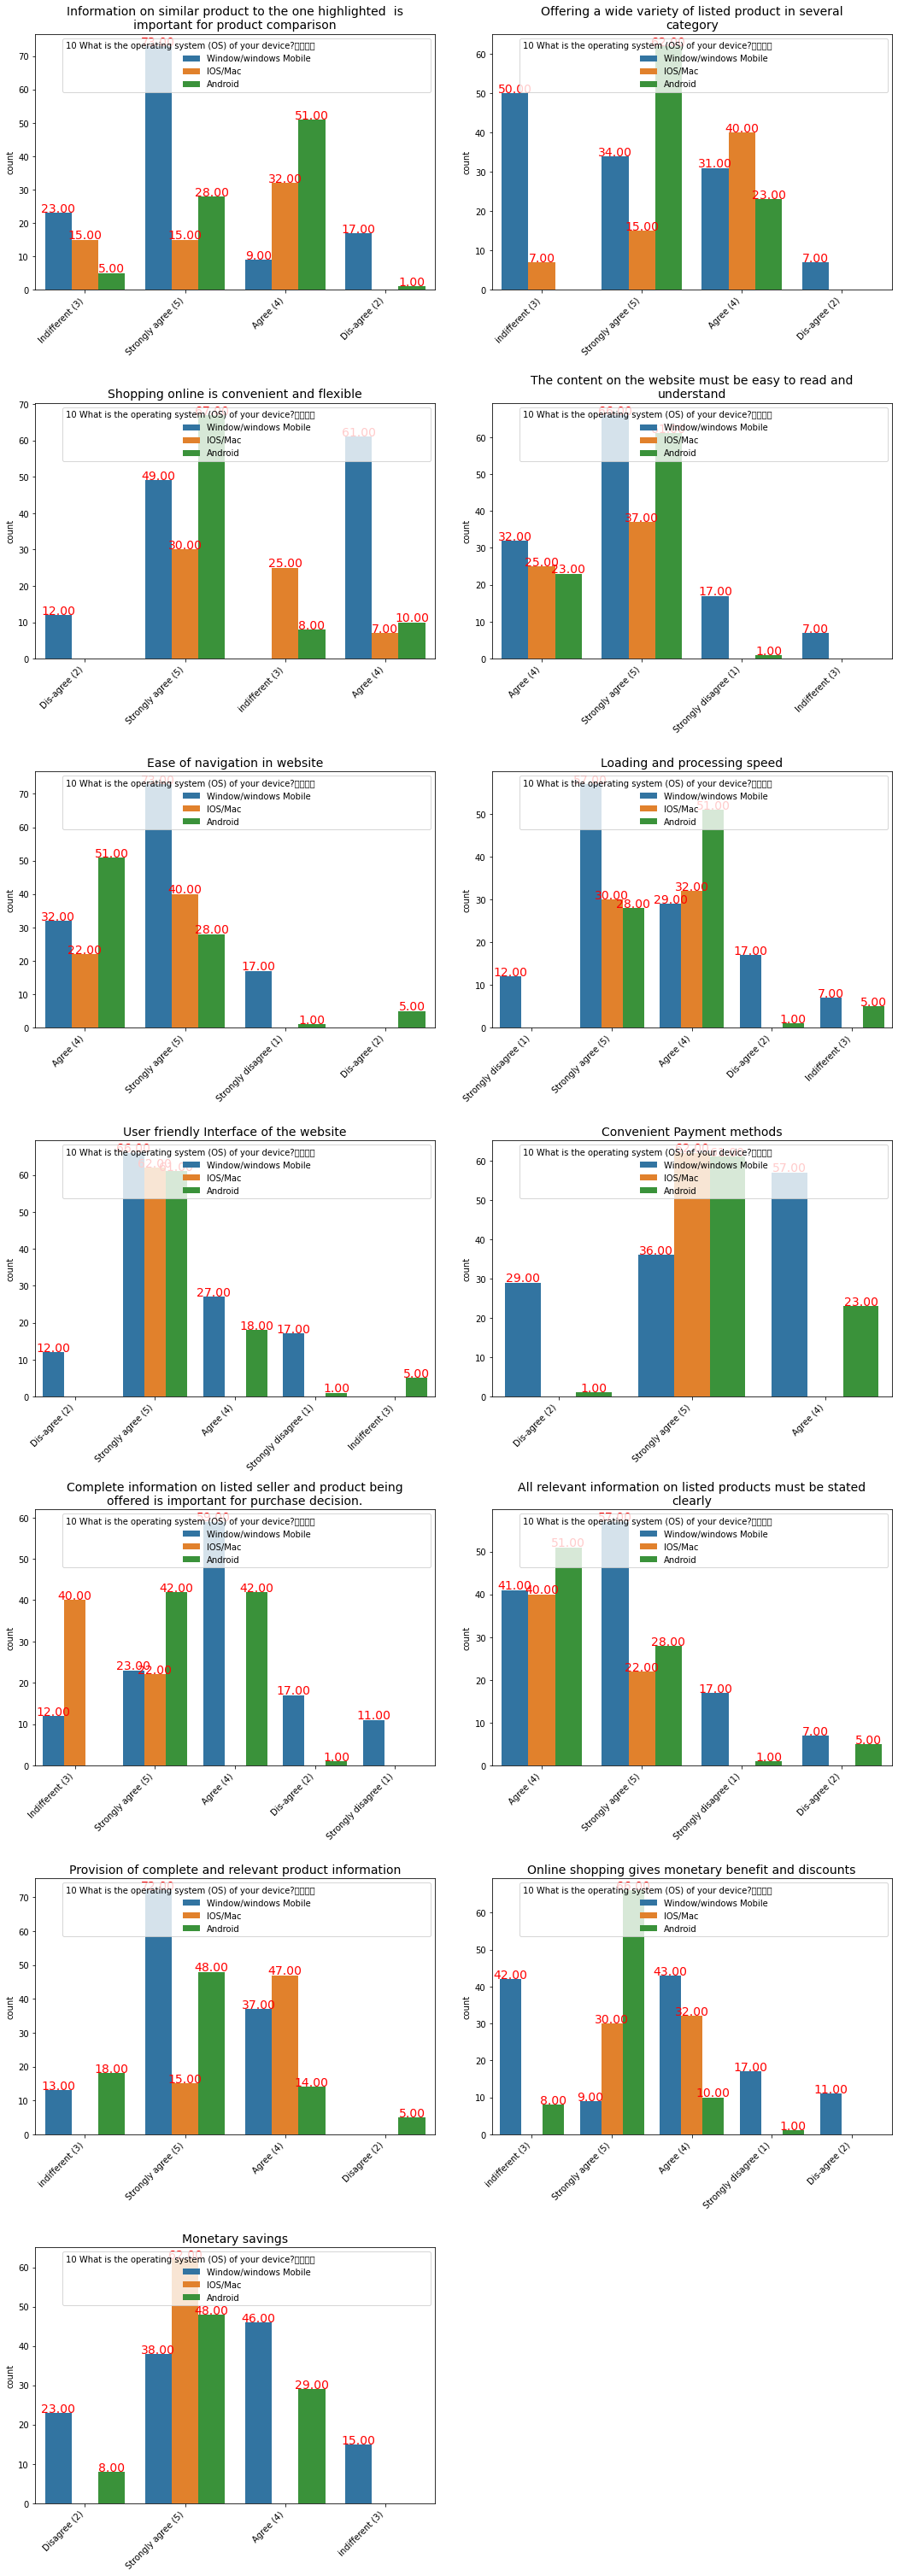

In [94]:
df_temp = df_factors.iloc[:,[8]].join(df_util)
a = df_temp.columns[0]

plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Every iOS/Mac user agrees to offering a wide variety of listed product in several category.
* Every iOS/Mac user agrees with factors enhancing convenience and monetary savings.

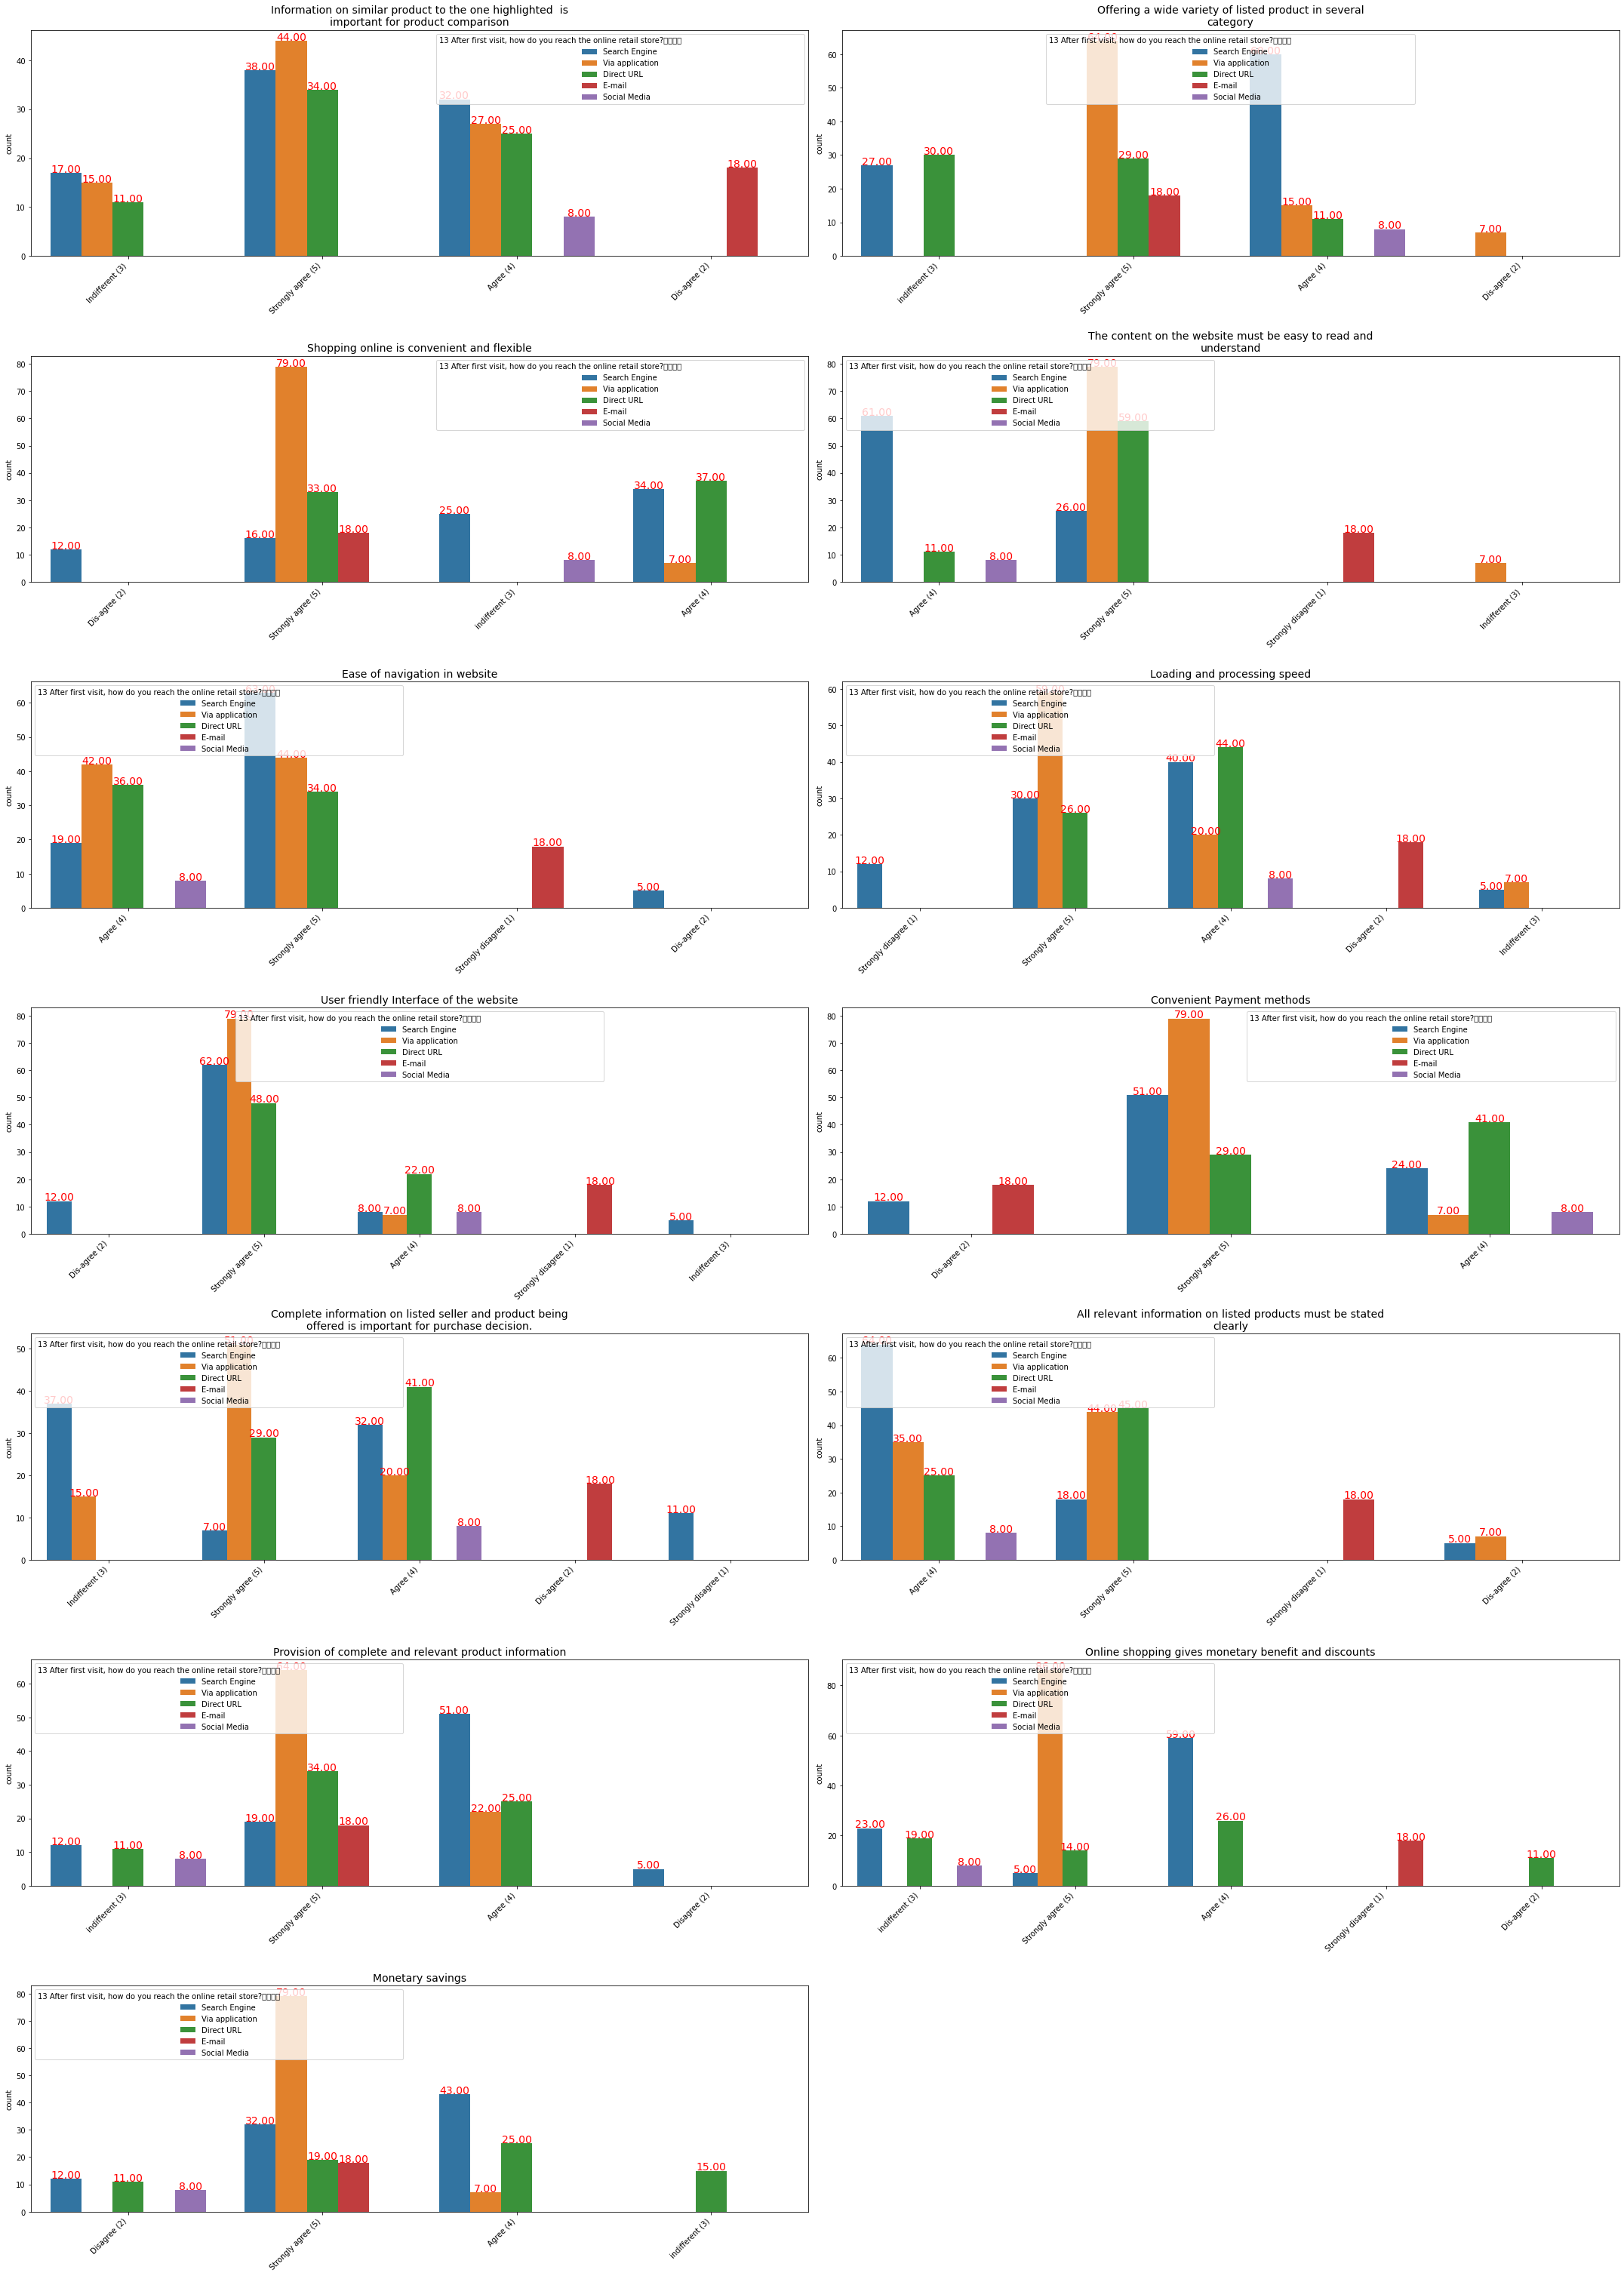

In [95]:
df_temp = df_factors.iloc[:,[9]].join(df_util)
a = df_temp.columns[0]

plt.figure(figsize=(30,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Most customers who reach the online store via email  tend to disagree to online shopping gives monetary benefit and discounts.
* Most people who disagree with factors enhancing convenience reached the online store via email.

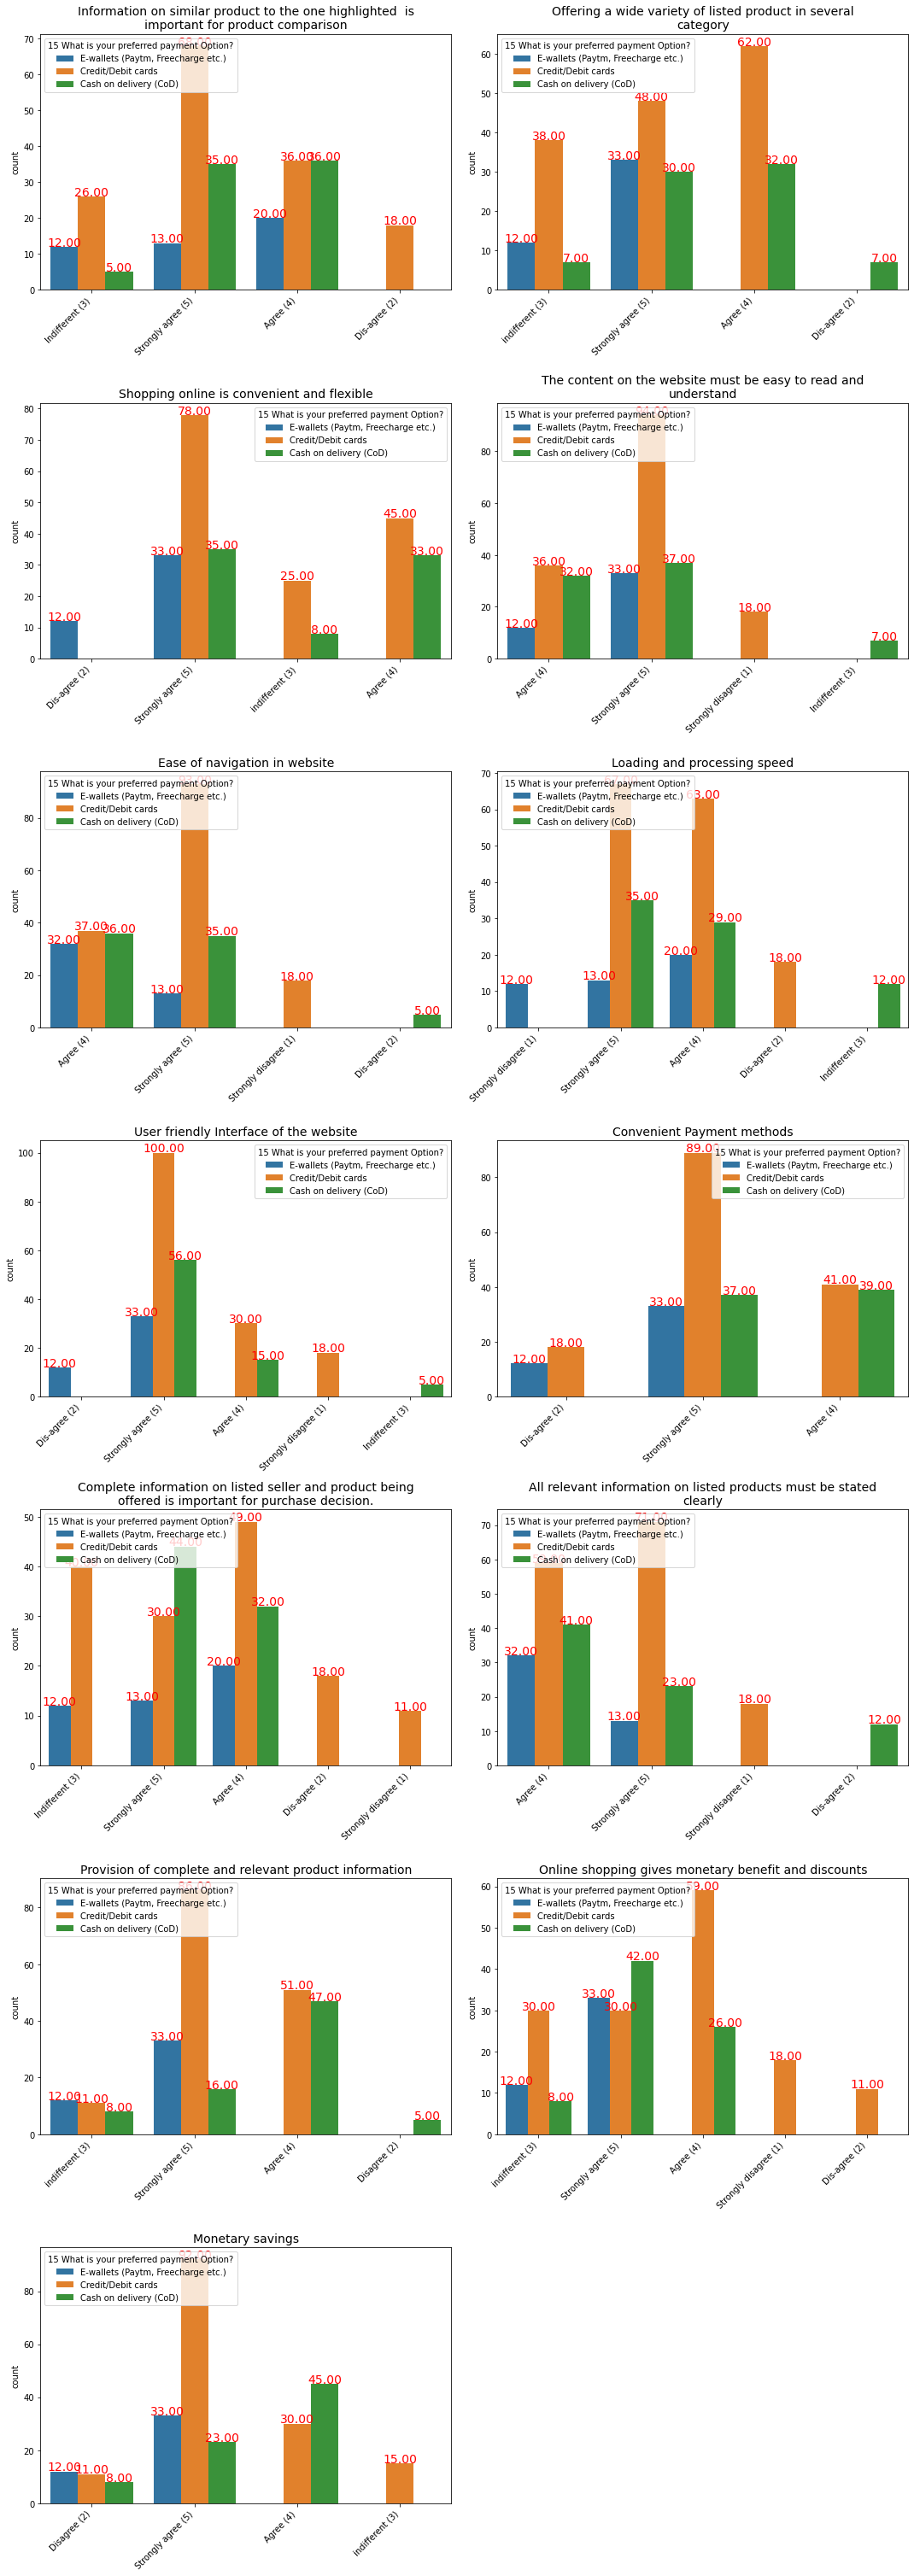

In [96]:
df_temp = df_factors.iloc[:,[11]].join(df_util)
a = df_temp.columns[0]
df_temp.rename(columns={a:a.strip()},inplace=True)
b = df_temp.columns[0]
plt.figure(figsize=(15,42))

j=1
for i in range(13):
    plt.subplot(7,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[b])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* People who disagree that shopping online is convenient and flexible pay through e-wallets.
* Customers who disagree to online shopping gives monetary benefits and discounts pay using credit cards/ debit cards.
* All customers who pay through Cash on Delivery believe that the payment method is convenient.

### TRUST / SERVICES VS FACTORS

In [97]:
t_cols = list(df_trust_serv.columns)
t_cols

['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
 '27 Empathy (readiness to assist with queries) towards the customers',
 '28 Being able to guarantee the privacy of the customer',
 '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
 '33 Return and replacement policy of the e-tailer is important for purchase decision',
 '34 Gaining access to loyalty programs is a benefit of shopping online',
 '35 Displaying quality Information on the website improves satisfaction of customers',
 '36 User derive satisfaction while shopping on a good quality website or application',
 '37 Net Benefit derived from shopping online can lead to users satisfaction',
 '38 User satisfaction cannot exist without trust']

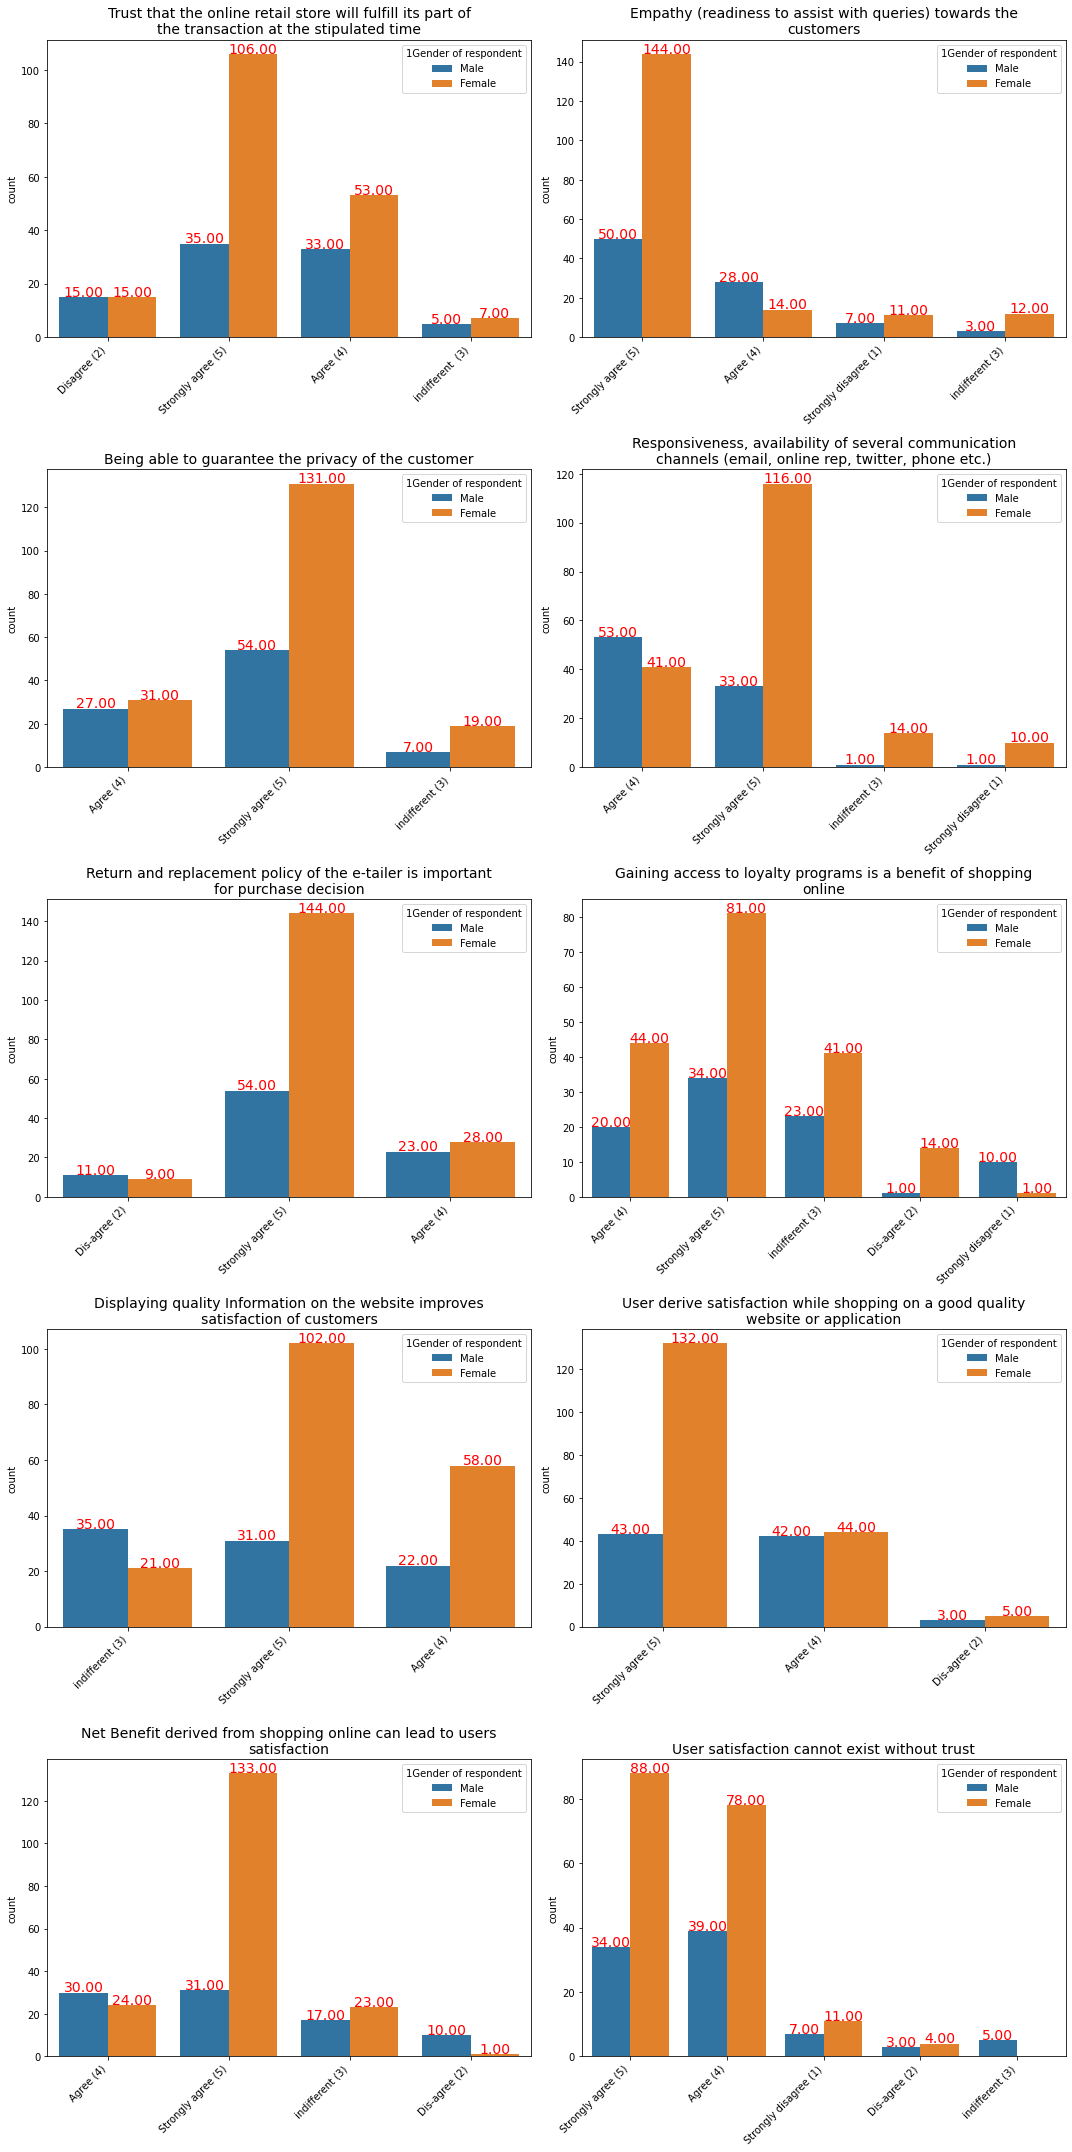

In [98]:
df_temp = df_factors.iloc[:,[0]].join(df_trust_serv)
a = df_temp.columns[0]
plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* The ratio of Men and women are distributed similarly across acategories for the different trust/service related factors.

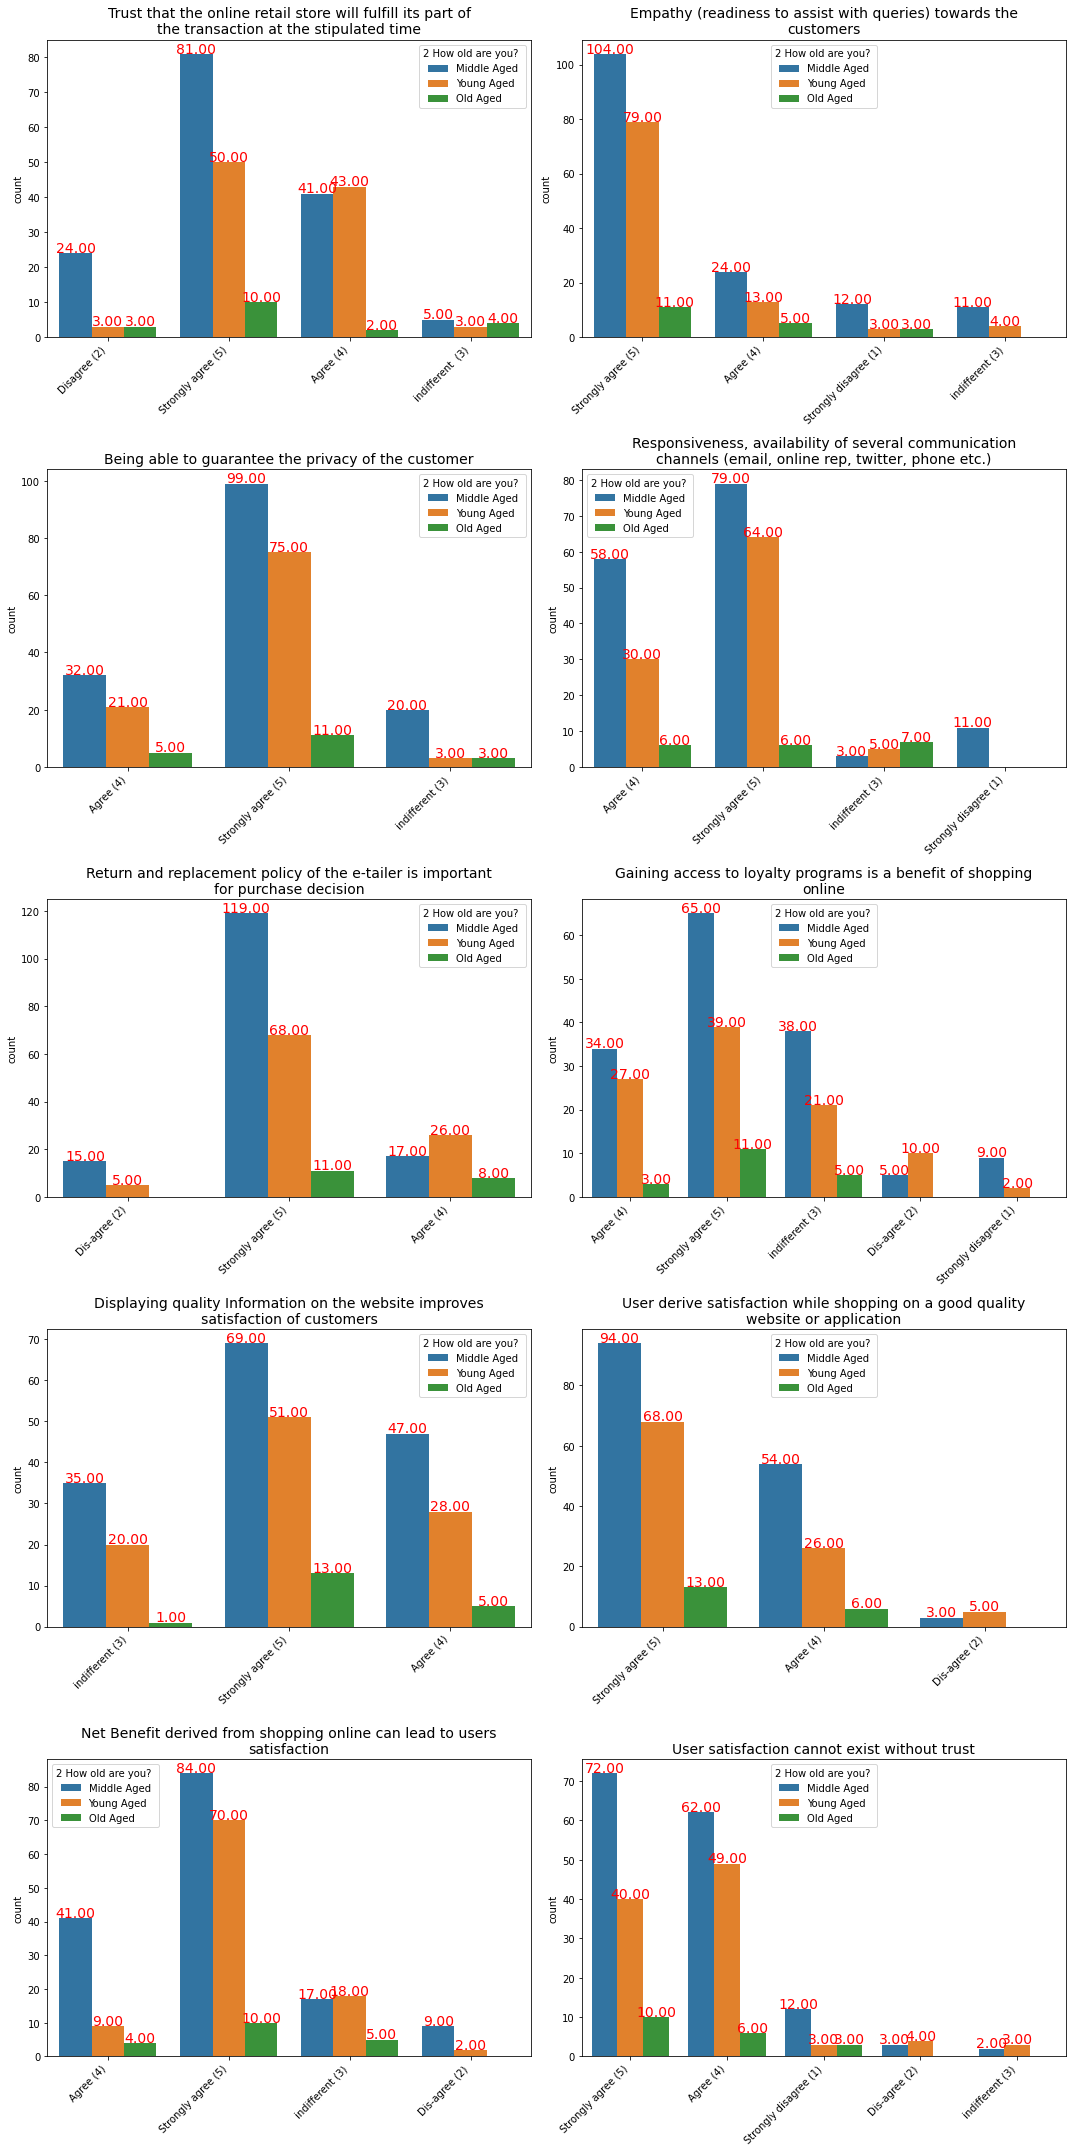

In [100]:
df_temp = df_factors.iloc[:,[1]].join(df_trust_serv)
a = df_temp.columns[0]

# Generalizing the age groups
df_temp['2 How old are you? '].replace('31-40 years', 'Middle Aged', inplace = True)
df_temp['2 How old are you? '].replace('41-50 yaers', 'Middle Aged', inplace = True)
df_temp['2 How old are you? '].replace('21-30 years', 'Young Aged', inplace = True)
df_temp['2 How old are you? '].replace('Less than 20 years', 'Young Aged', inplace = True)
df_temp['2 How old are you? '].replace('51 years and above', 'Old Aged', inplace = True)

plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* The ratio of different age groups are distributed similarly across categories for the different trust/service related factors.

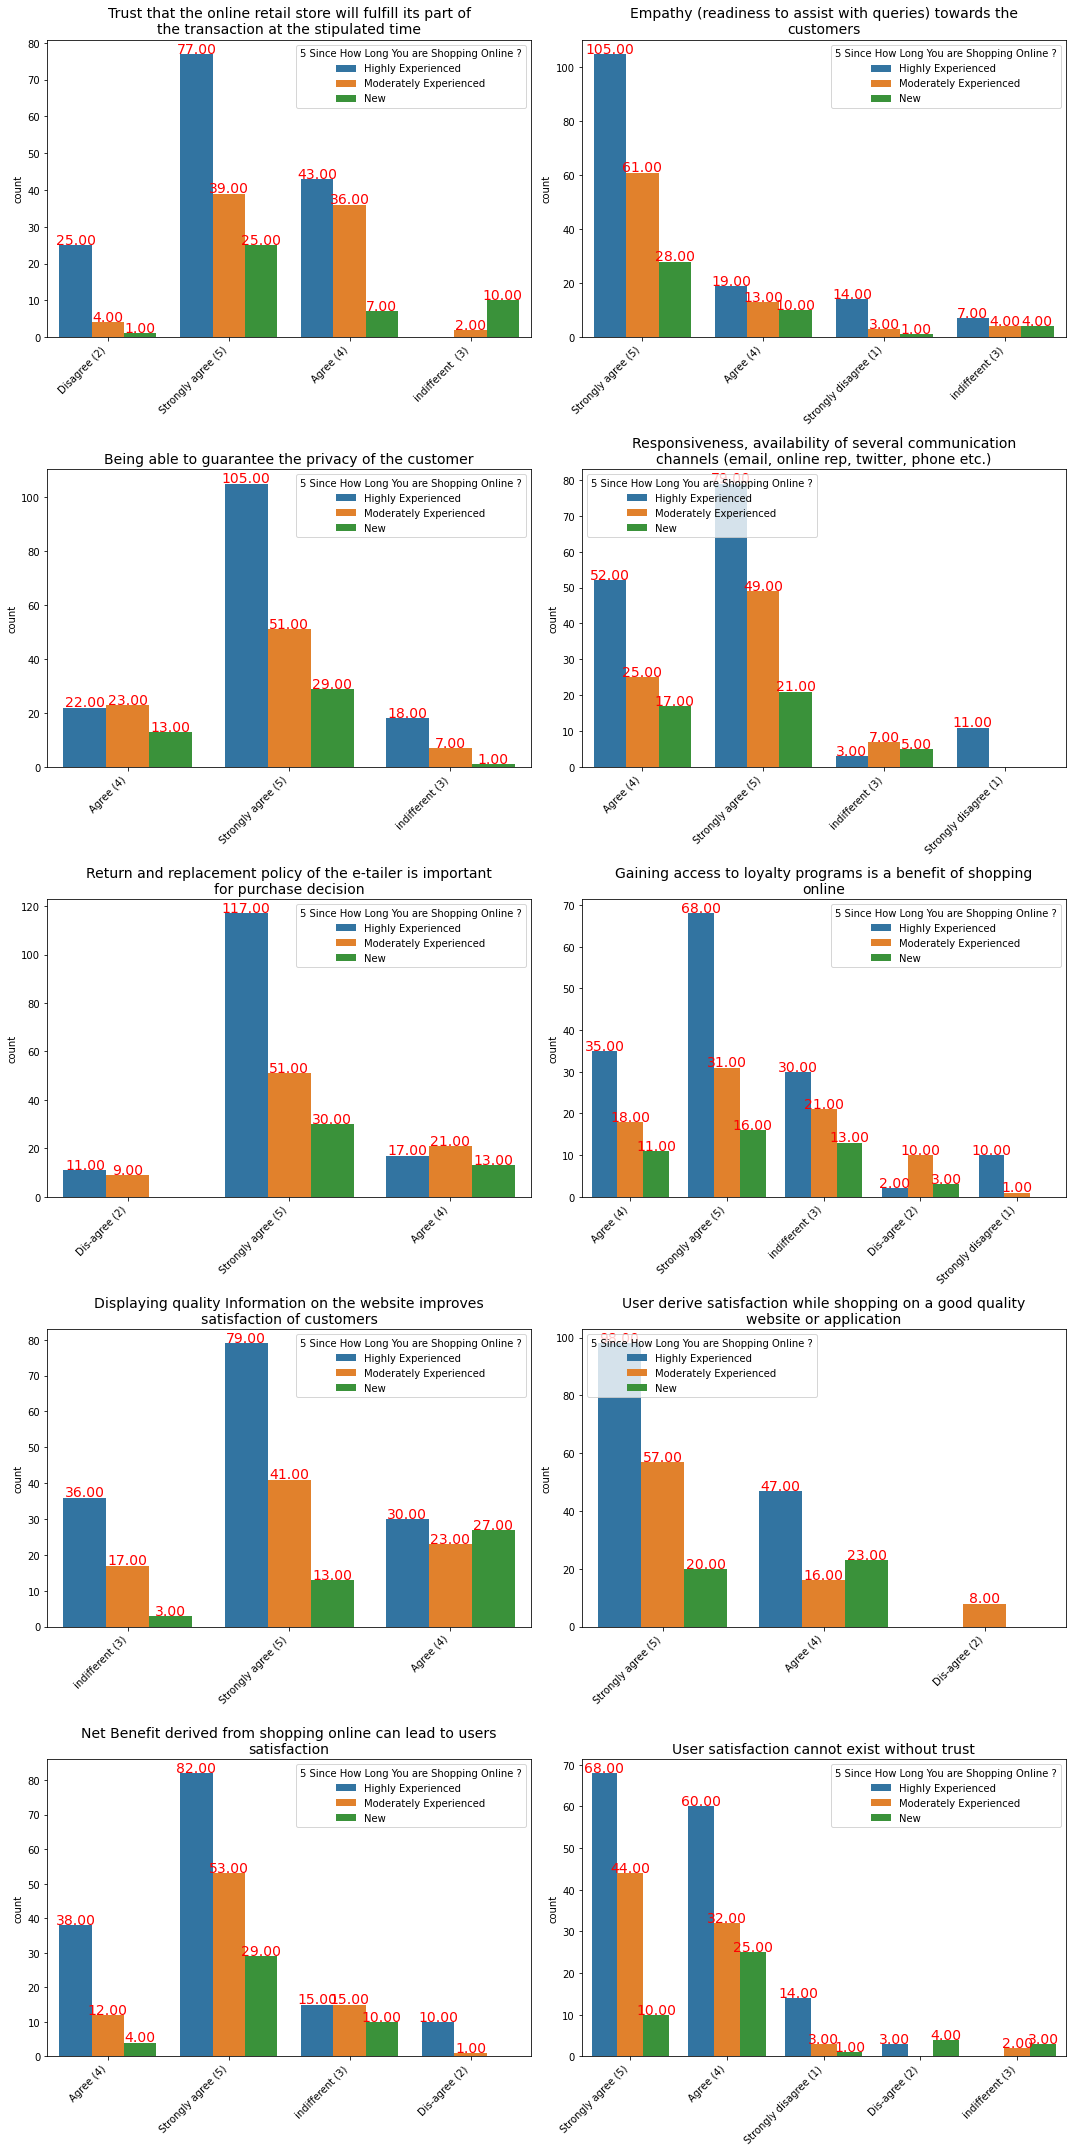

In [101]:
df_temp = df_factors.iloc[:,[3]].join(df_trust_serv)
a = df_temp.columns[0]

df_temp['5 Since How Long You are Shopping Online ?'].replace('Above 4 years', 'Highly Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('3-4 years', 'Highly Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('1-2 years', 'Moderately Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('2-3 years', 'Moderately Experienced', inplace = True)
df_temp['5 Since How Long You are Shopping Online ?'].replace('Less than 1 year', 'New', inplace = True)

plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Moderately experienced customers tend to disagree more than oothers to gaining access to loyalty programs is a benefit of shopping online

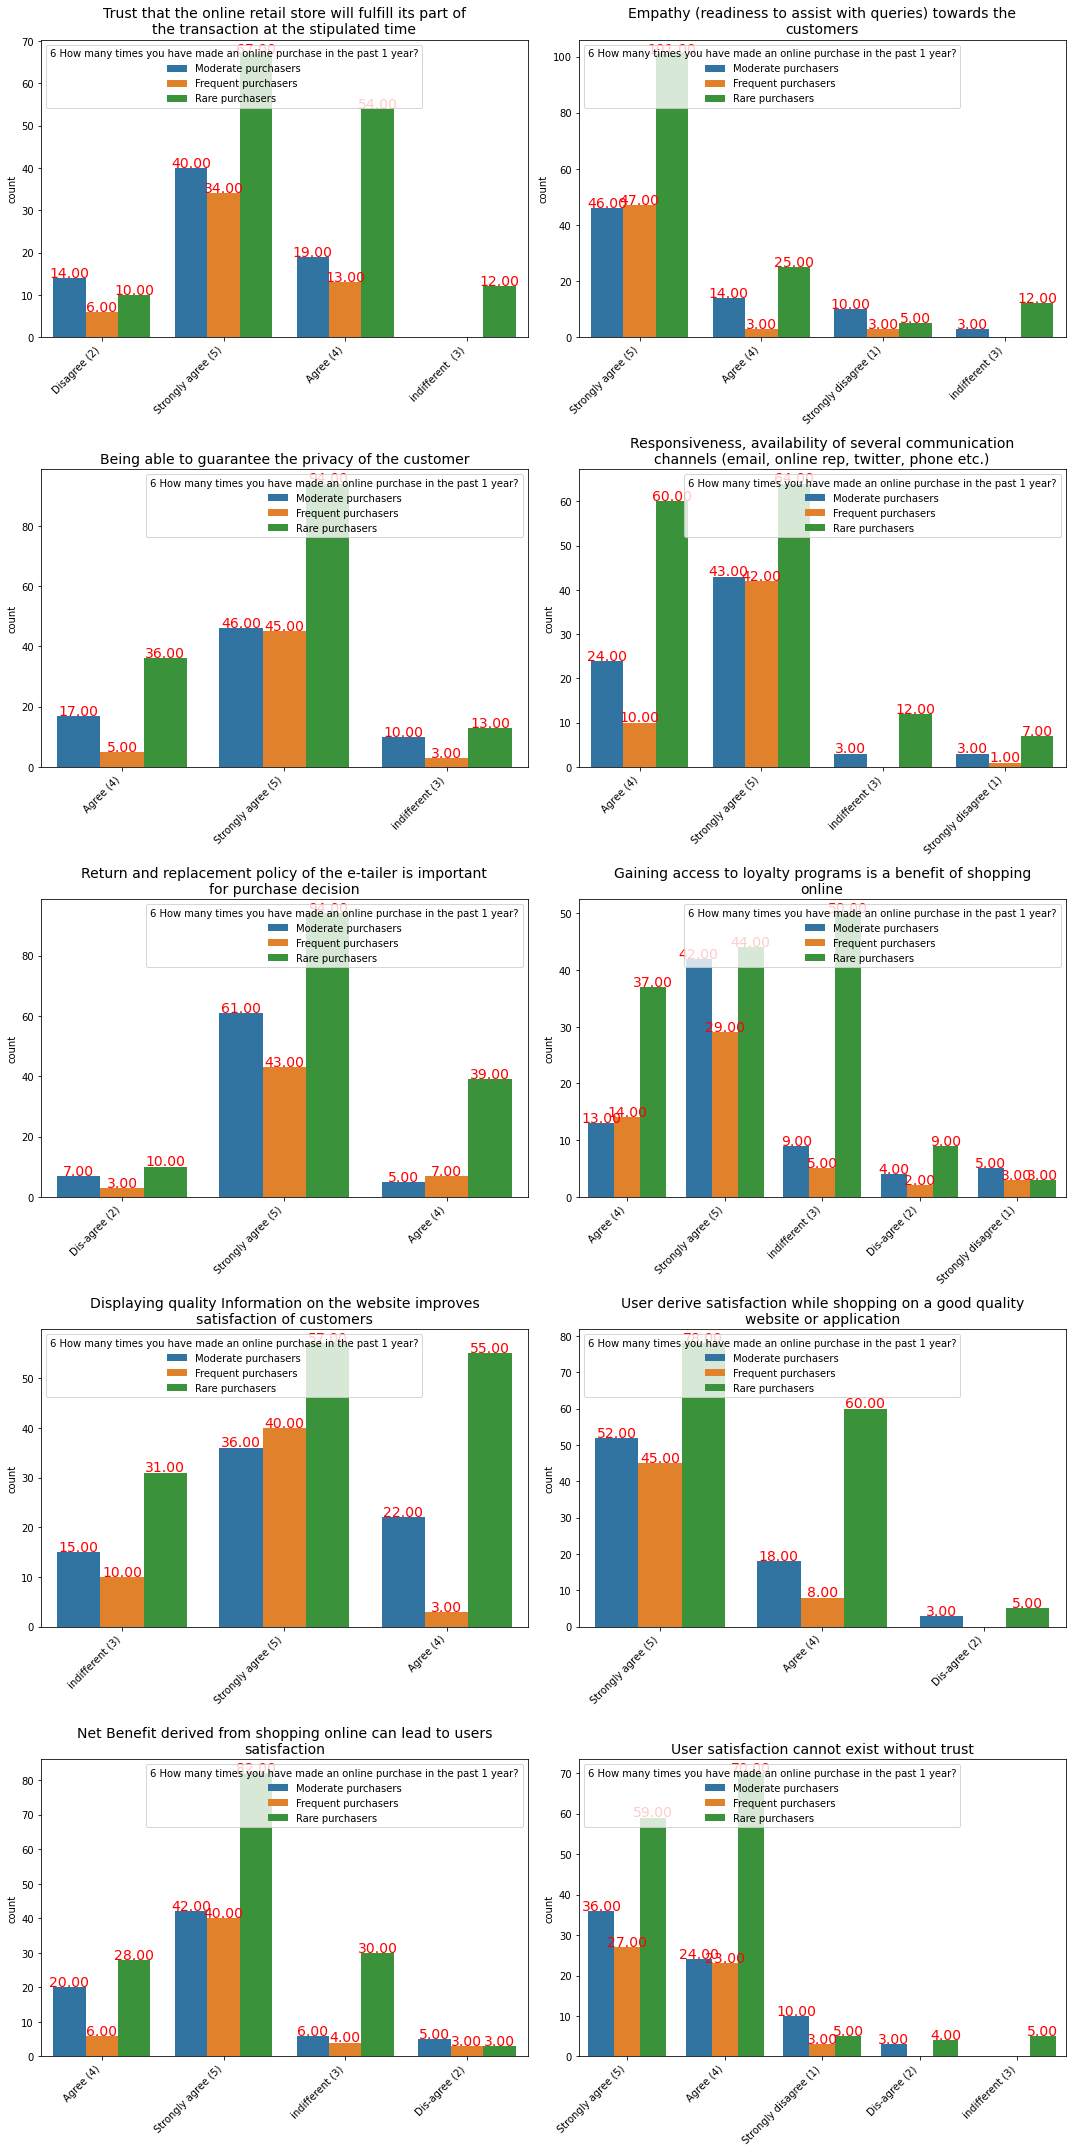

In [102]:
df_temp = df_factors.iloc[:,[4]].join(df_trust_serv)
a = df_temp.columns[0]

df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('Less than 10 times', 'Rare purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('11-20 times', 'Rare purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('21-30 times', 'Moderate purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('31-40 times', 'Moderate purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('42 times and above', 'Frequent purchasers', inplace = True)
df_temp['6 How many times you have made an online purchase in the past 1 year?'].replace('41 times and above', 'Frequent purchasers', inplace = True)

plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* Majority of people who disagree to Trust that the online retail store will fulfill its part of the transaction at the stipulated time are moderate purchasers.
* Majority of people who disagree to Net Benefit derived from shopping online can lead to users satisfaction are moderate purchasers.

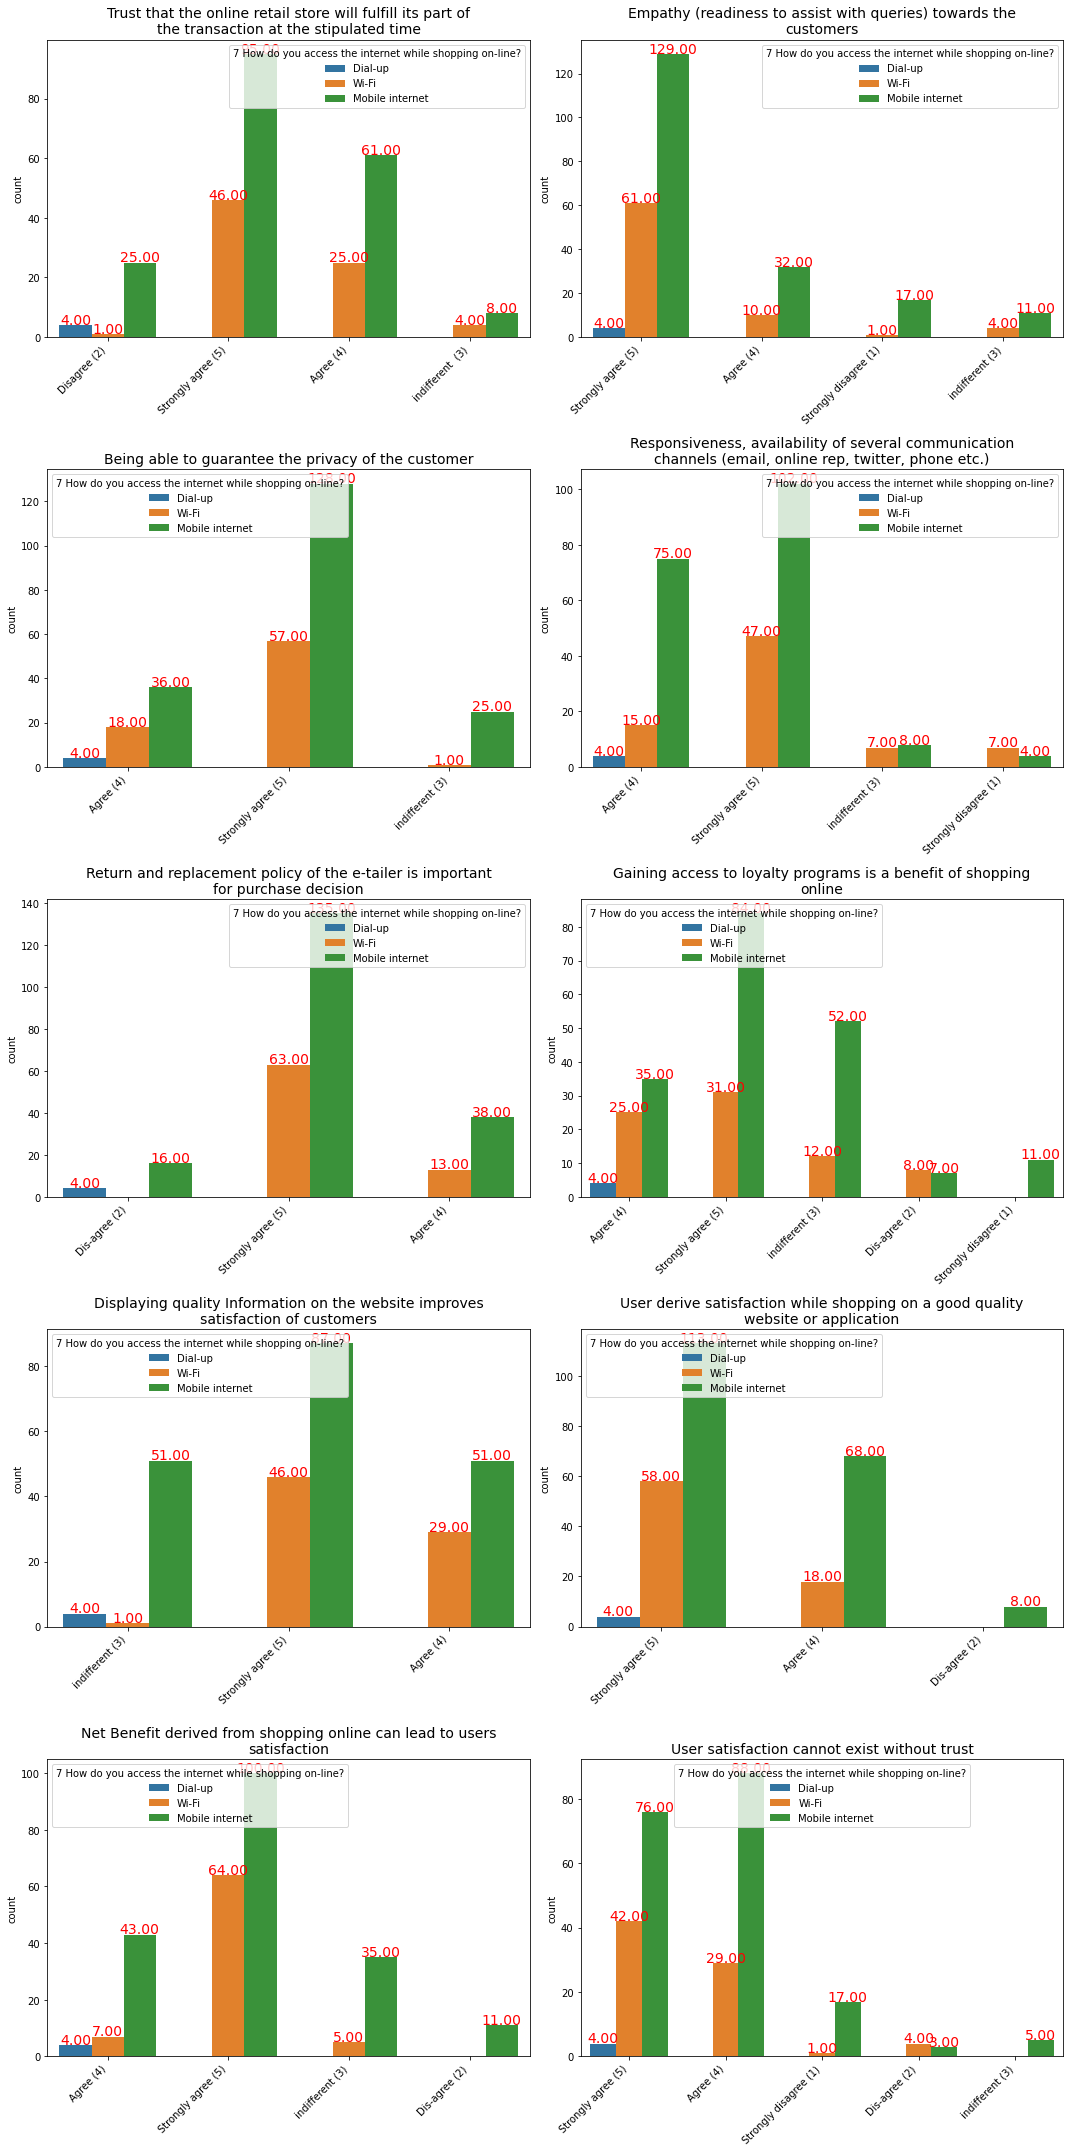

In [103]:
df_temp = df_factors.iloc[:,[5]].join(df_trust_serv)
a = df_temp.columns[0]

plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* The ratio of customers using different modes to access internet are distributed similarly across categories for the different trust/service related factors

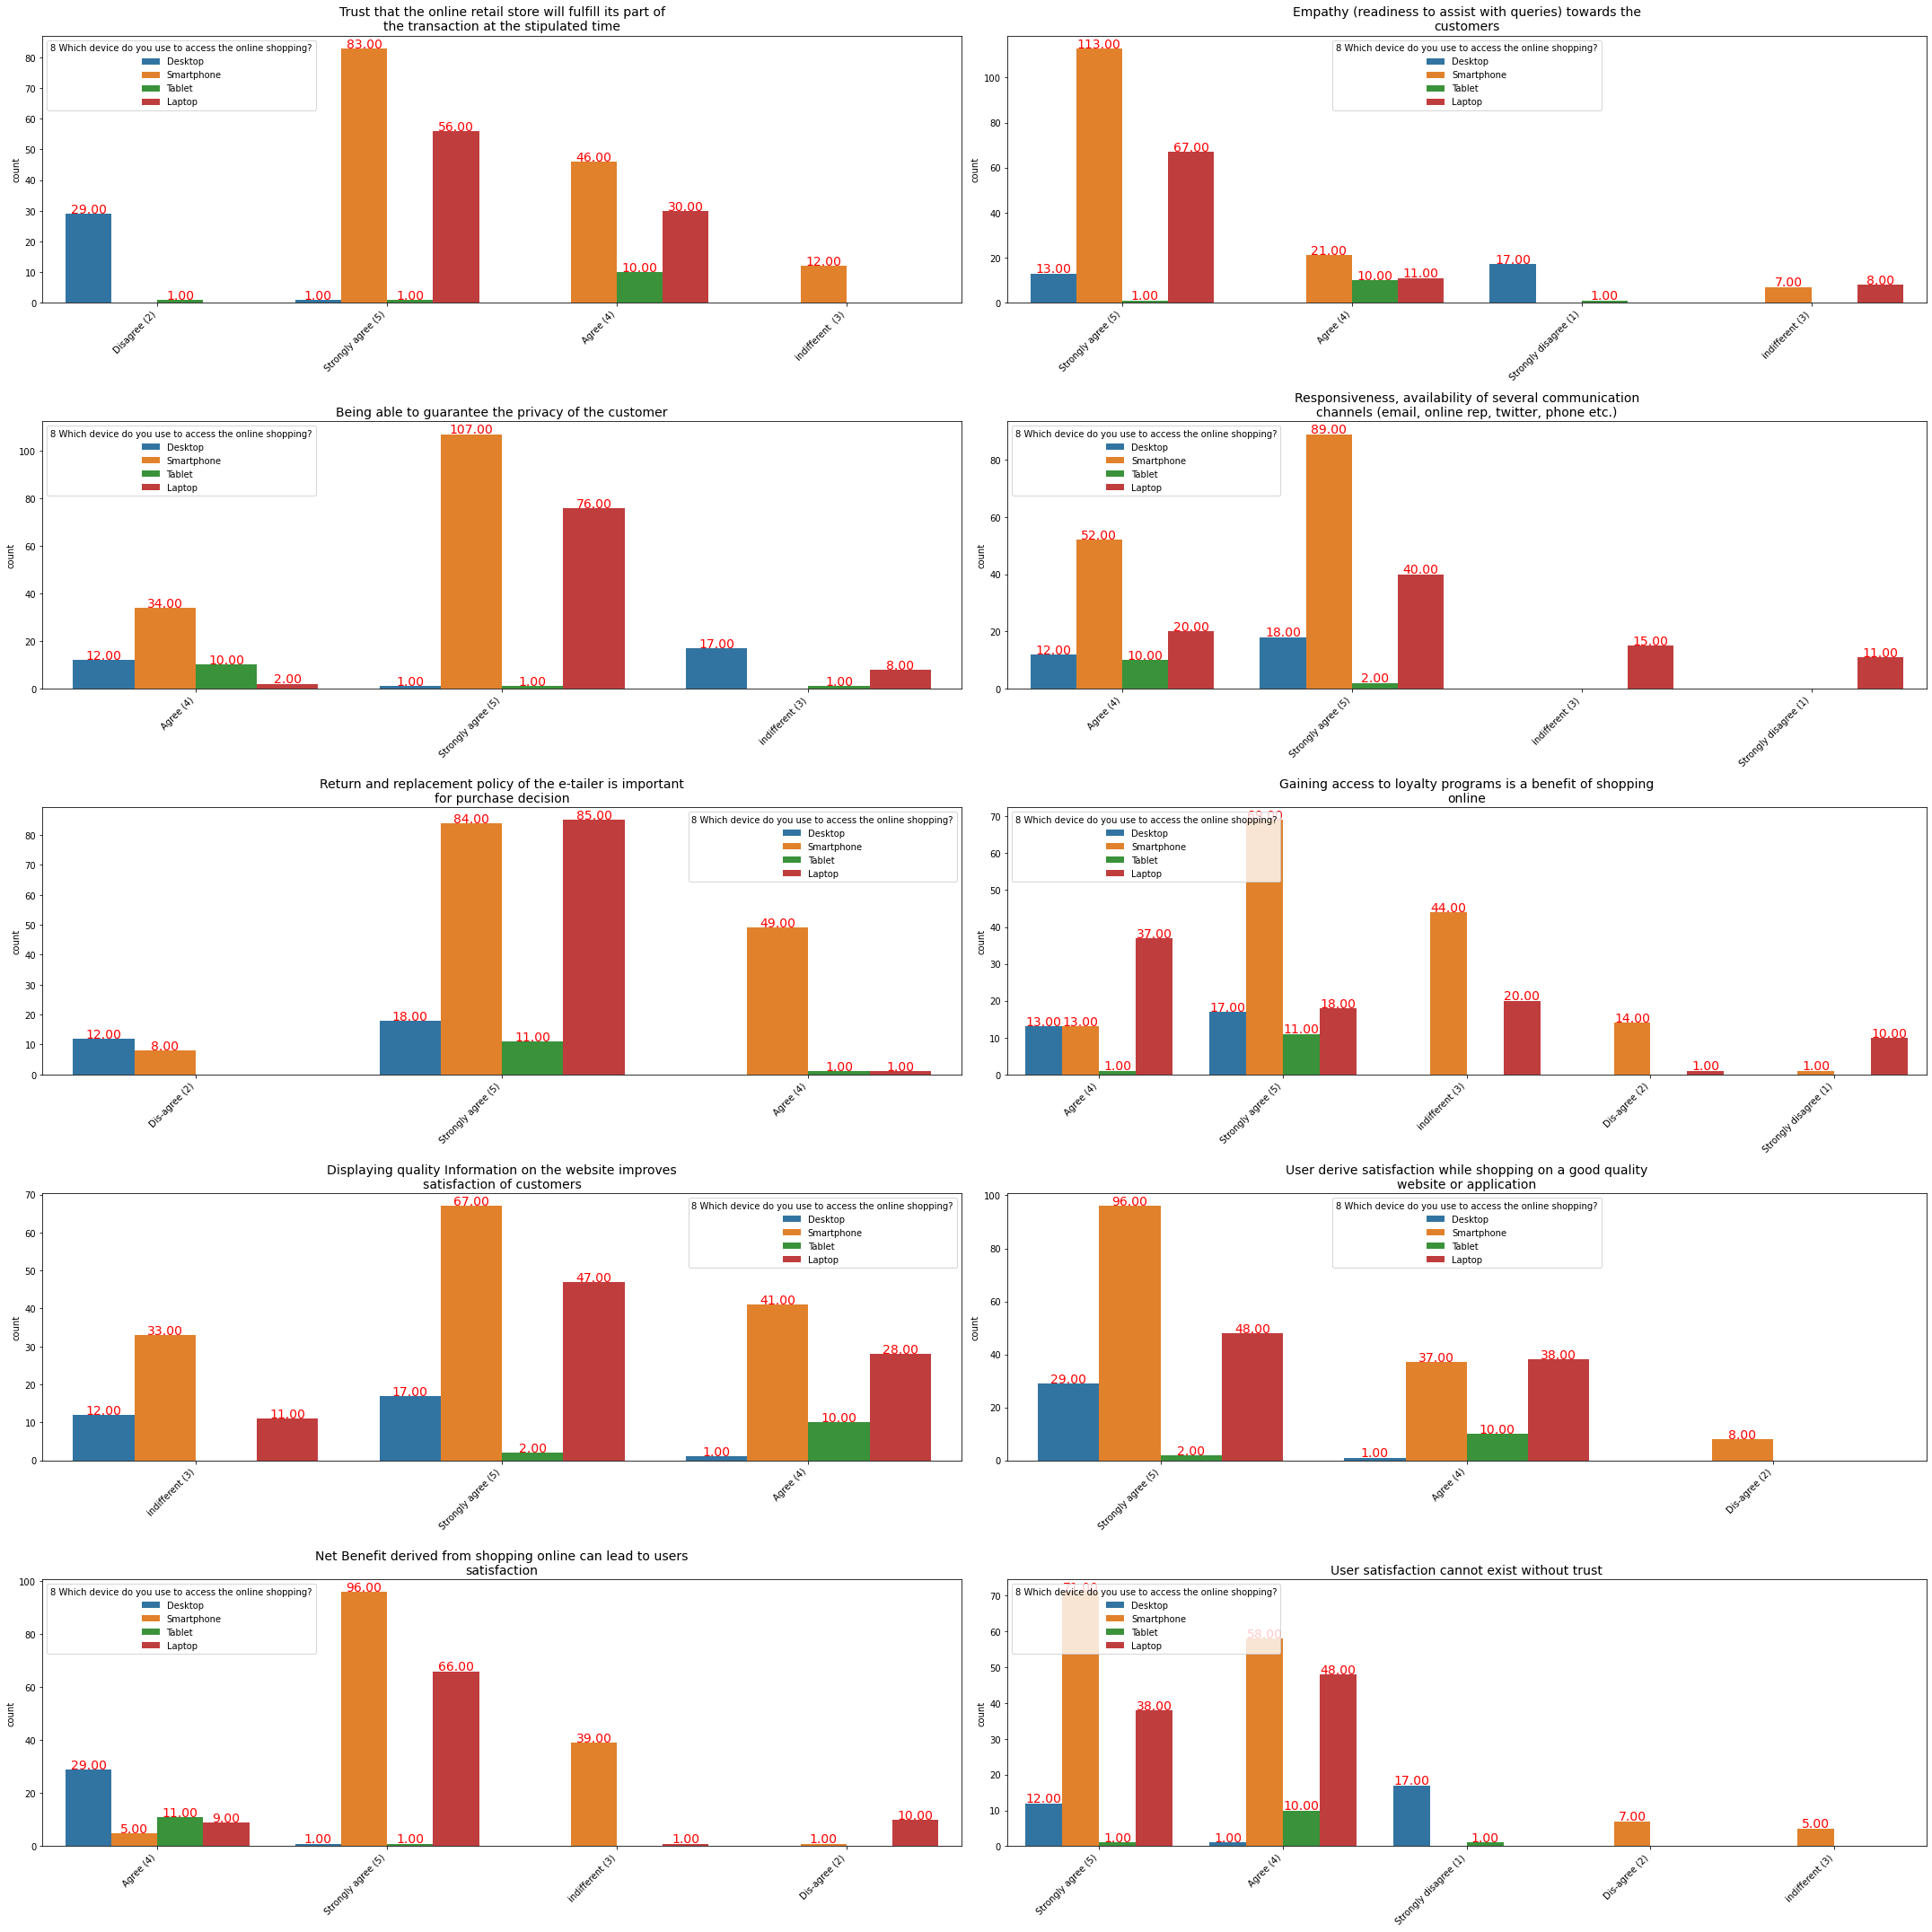

In [105]:
df_temp = df_factors.iloc[:,[6]].join(df_trust_serv)
a = df_temp.columns[0]

plt.figure(figsize=(30,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* More than 95% of desktop users  disagree to Trust that the online retail store will fulfill its part of the transaction at the stipulated time.
* Majority of desktop users disagree to empathy towards customers.
* People who don't agree to Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) are laptop users.
* Majority of desktop users disagree to User satisfaction cannot exist without trust.
* Majority of people who disagree to Return and replacement policy of the e-tailer is important for purchase decision are desktop users.

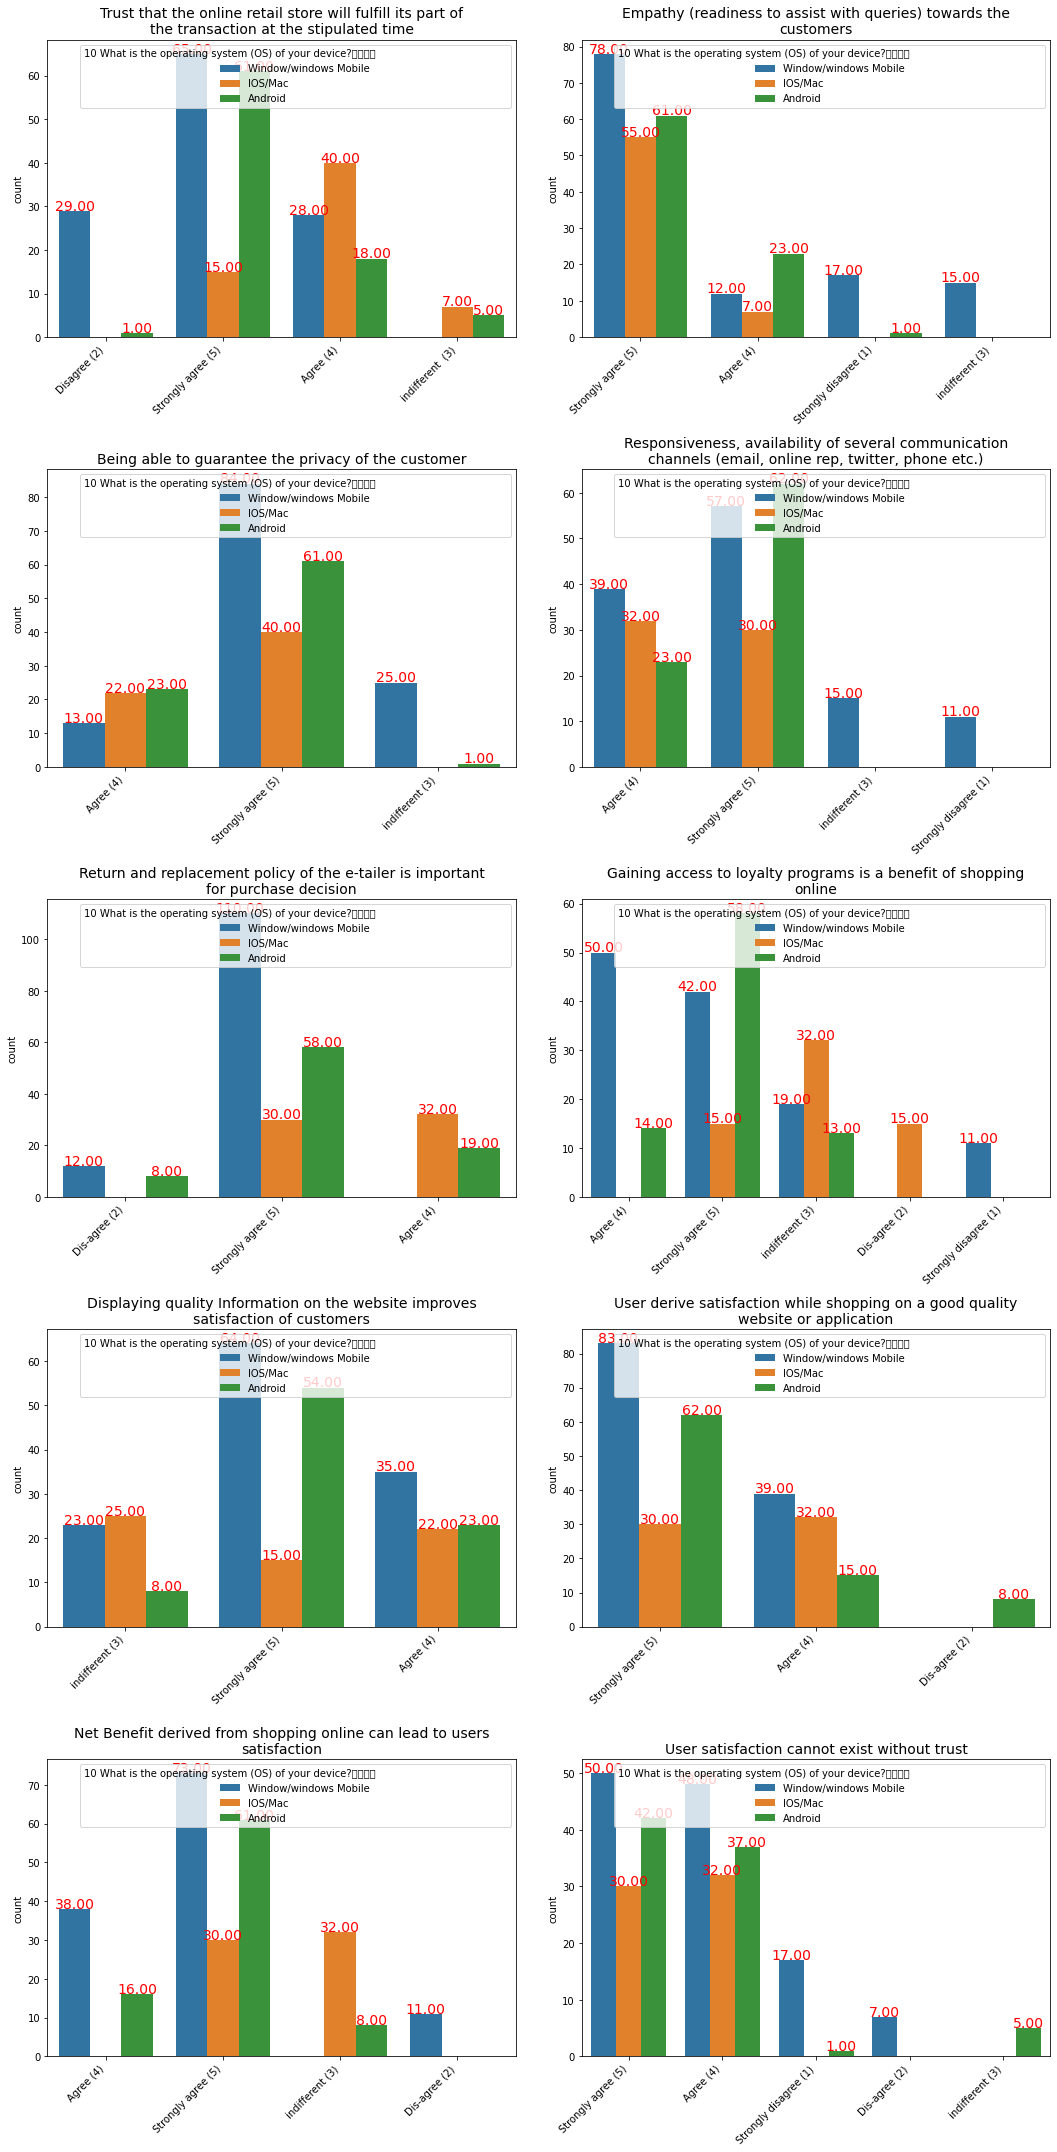

In [108]:
df_temp = df_factors.iloc[:,[8]].join(df_trust_serv)
a = df_temp.columns[0]

plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[a])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* All iOS/Mac Users agree to being able to guarantee the privacy of the customer, Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) and Return and replacement policy of the e-tailer is important for purchase decision.
* Only android users disagree to Users deriving satisfaction while shopping on a good quality website or application
* Majority of people who disagree to Gaining access to loyalty programs is a benefit of shopping online are iOS/Mac users.

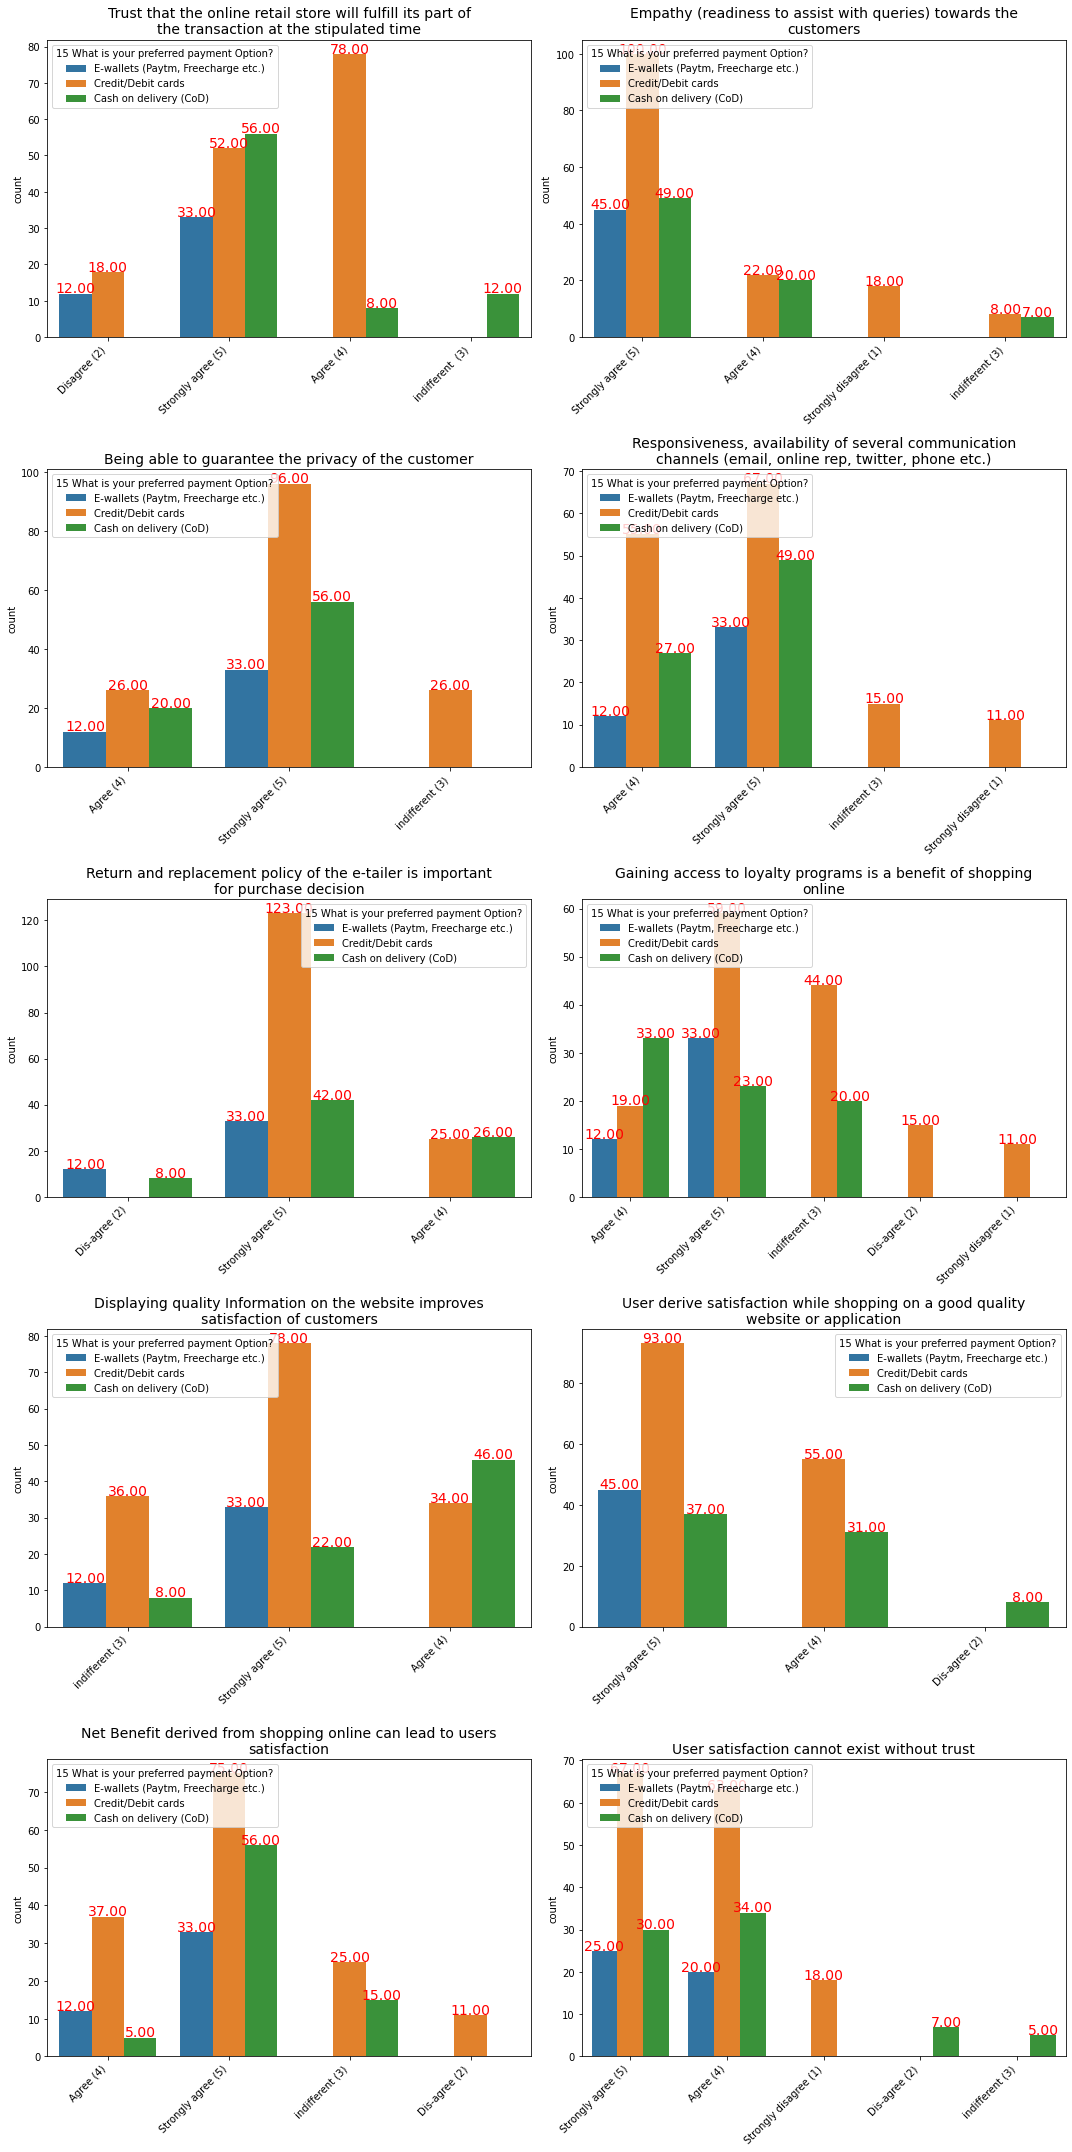

In [115]:
df_temp = df_factors.iloc[:,[11]].join(df_trust_serv)
a = df_temp.columns[0]
df_temp.rename(columns={a:a.strip()},inplace = True)
b = df_temp.columns[0]

plt.figure(figsize=(15,30))

j=1
for i in range(10):
    plt.subplot(5,2,j)
    j=j+1
    ax = sns.countplot(df_temp[t_cols[i]], hue=df_temp[b])
    ax.set_title('\n'.join(wrap(col_c[col.index(t_cols[i])],60)), fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()            

* All credit/dibit card users agree that Return and replacement policy of the e-tailer is important for purchase decision.
* People who disagree to Gaining access to loyalty programs is a benefit of shopping online are credit/dibit card users.
* People who disagree to Net Benefit derived from shopping online can lead to users satisfaction are credit/dibit card users.

## E-COMMERCE SITES PREFERENCES

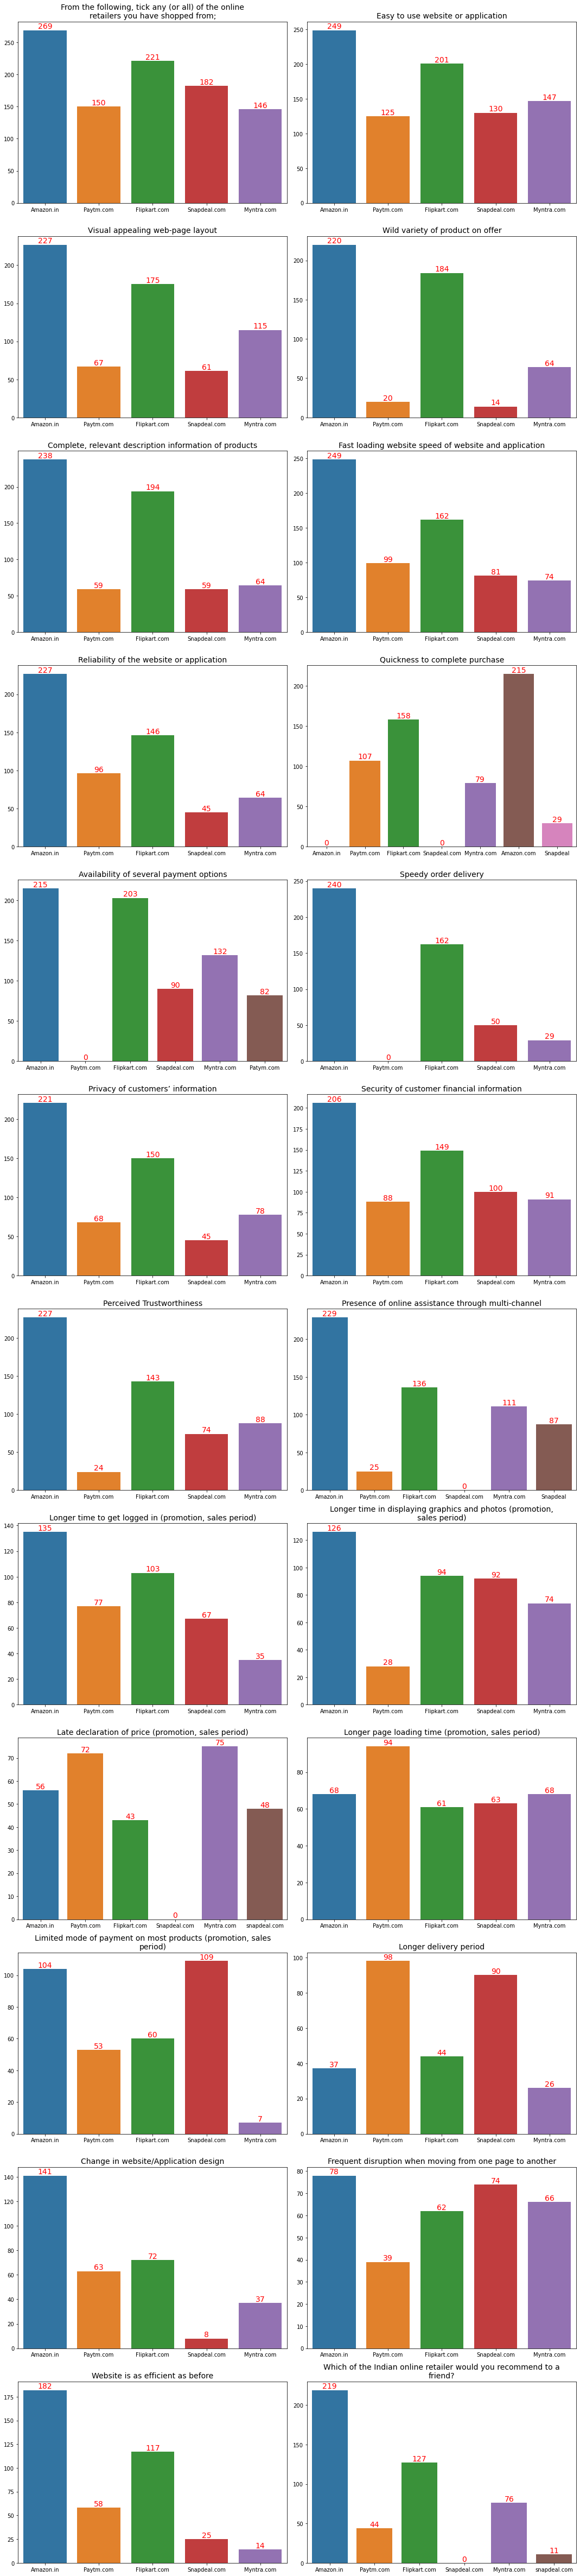

In [137]:
j=1
plt.figure(figsize=(15,66))
for i in d:
    keys = []
    val = []
    for k in d[i]:
        keys.append(k)
        val.append(d[i][k])
        
    plt.subplot(12,2,j)
    j=j+1
    
    ax = sns.barplot(x=keys,y=val)
    ax.set_title('\n'.join(wrap(i.strip(),60)), fontsize=14)
    ax.set_xlabel('')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

plt.tight_layout()            

In [141]:
for i in d:
    max_n =-1
    min_n =1000
    for j in d[i]:
        if(d[i][j]>max_n):
            max_n = d[i][j]
            max_t = j
        if(d[i][j]<min_n and d[i][j]!=0):
            min_n = d[i][j]
            min_t = j
    print(i)
    print("MAX - ", max_t, ":", max_n)
    print("MIN - ", min_t, ":", min_n)
    print()

From the following, tick any (or all) of the online retailers you have shopped from;                                                                           
MAX -  Amazon.in : 269
MIN -  Myntra.com : 146

Easy to use website or application
MAX -  Amazon.in : 249
MIN -  Paytm.com : 125

Visual appealing web-page layout
MAX -  Amazon.in : 227
MIN -  Snapdeal.com : 61

Wild variety of product on offer
MAX -  Amazon.in : 220
MIN -  Snapdeal.com : 14

Complete, relevant description information of products
MAX -  Amazon.in : 238
MIN -  Paytm.com : 59

Fast loading website speed of website and application
MAX -  Amazon.in : 249
MIN -  Myntra.com : 74

Reliability of the website or application
MAX -  Amazon.in : 227
MIN -  Snapdeal.com : 45

Quickness to complete purchase
MAX -  Amazon.com : 215
MIN -  Snapdeal : 29

Availability of several payment options
MAX -  Amazon.in : 215
MIN -  Patym.com : 82

Speedy order delivery 
MAX -  Amazon.in : 240
MIN -  Myntra.com : 29

Privacy of customers

* Amazon is the most preferred e-commerce site by users and it performs well on all good factors like Privacy, Security, Trustworthynesss, etc.
* While Snapdeal, Myntraa and Paytm are not commonly preferred due to their lack of variety, technical problems with their website and longer delivery periods.